In [403]:
!pip install pingouin
!pip install bioinfokit
!pip install dfply
!pip install matplotlib

In [355]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
%matplotlib inline
from bioinfokit.analys import stat
import numpy as np
import random
import scipy
from scipy import stats
from scipy.stats import t
pd.set_option("display.max_rows",None)
import pingouin as pg
from dfply import *
from math import sqrt

from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *

In [98]:
diabetes = pd.read_csv('diabetes (2).csv')
diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             80              0        0  27.1   
13             1      189             60             23      846  30.1   
14             5      166             72             19      175  25.8   
15             7      100              0              0        0  30.0   
16             0      118             84             47      230  45.8   
17             7      107             74              0        0  29.6   
18             1      103             30             38       83  43.3   
19             1      115             70             30       96  34.6   
20             3      126             88             41      235  39.3   
21             8       99             84              0        0  35.4   
22             7      196             90              0        0  39.8   
23             9      119             80             35        0  29.0   
24            11      143             94             33      146  36.6   
25            10      125             70             26      115  31.1   
26             7      147             76              0        0  39.4   
27             1       97             66             15      140  23.2   
28            13      145             82             19      110  22.2   
29             5      117             92              0        0  34.1   
30             5      109             75             26        0  36.0   
31             3      158             76             36      245  31.6   
32             3       88             58             11       54  24.8   
33             6       92             92              0        0  19.9   
34            10      122             78             31        0  27.6   
35             4      103             60             33      192  24.0   
36            11      138             76              0        0  33.2   
37             9      102             76             37        0  32.9   
38             2       90             68             42        0  38.2   
39             4      111             72             47      207  37.1   
40             3      180             64             25       70  34.0   
41             7      133             84              0        0  40.2   
42             7      106             92             18        0  22.7   
43             9      171            110             24      240  45.4   
44             7      159             64              0        0  27.4   
45             0      180             66             39        0  42.0   
46             1      146             56              0        0  29.7   
47             2       71             70             27        0  28.0   
48             7      103             66             32        0  39.1   
49             7      105              0              0        0   0.0   
50             1      103             80             11       82  19.4   
51             1      101             50             15       36  24.2   
52             5       88             66             21       23  24.4   
53       

In [99]:
diabetes.shape

(768, 9)

In [100]:
#Clean Tidy Data
df_diabetes = diabetes.melt(id_vars = ["Outcome"], var_name = ["Features"], value_name = "Count")
df_diabetes

Outcome                  Features    Count
0           1               Pregnancies    6.000
1           0               Pregnancies    1.000
2           1               Pregnancies    8.000
3           0               Pregnancies    1.000
4           1               Pregnancies    0.000
5           0               Pregnancies    5.000
6           1               Pregnancies    3.000
7           0               Pregnancies   10.000
8           1               Pregnancies    2.000
9           1               Pregnancies    8.000
10          0               Pregnancies    4.000
11          1               Pregnancies   10.000
12          0               Pregnancies   10.000
13          1               Pregnancies    1.000
14          1               Pregnancies    5.000
15          1               Pregnancies    7.000
16          1               Pregnancies    0.000
17          1               Pregnancies    7.000
18          0               Pregnancies    1.000
19          1               Pregnancies    1.000
20          0               Pregnancies    3.000
21          0               Pregnancies    8.000
22          1               Pregnancies    7.000
23          1               Pregnancies    9.000
24          1               Pregnancies   11.000
25          1               Pregnancies   10.000
26          1               Pregnancies    7.000
27          0               Pregnancies    1.000
28          0               Pregnancies   13.000
29          0               Pregnancies    5.000
30          0               Pregnancies    5.000
31          1               Pregnancies    3.000
32          0               Pregnancies    3.000
33          0               Pregnancies    6.000
34          0               Pregnancies   10.000
35          0               Pregnancies    4.000
36          0               Pregnancies   11.000
37          1               Pregnancies    9.000
38          1               Pregnancies    2.000
39          1               Pregnancies    4.000
40          0               Pregnancies    3.000
41          0               Pregnancies    7.000
42          0               Pregnancies    7.000
43          1               Pregnancies    9.000
44          0               Pregnancies    7.000
45          1               Pregnancies    0.000
46          0               Pregnancies    1.000
47          0               Pregnancies    2.000
48          1               Pregnancies    7.000
49          0               Pregnancies    7.000
50          0               Pregnancies    1.000
51          0               Pregnancies    1.000
52          0               Pregnancies    5.000
53          1               Pregnancies    8.000
54          0               Pregnancies    7.000
55          0               Pregnancies    1.000
56          1               Pregnancies    7.000
57          0               Pregnancies    0.000
58          0               Pregnancies    0.000
59          0               Pregnancies    0.000
60          0               Pregnancies    2.000
61          1               Pregnancies    8.000
62          0               Pregnancies    5.000
63          0               Pregnancies    2.000
64          1               Pregnancies    7.000
65          0               Pregnancies    5.000
66          1               Pregnancies    0.000
67          0               Pregnancies    2.000
68          0               Pregnancies    1.000
69          0               Pregnancies    4.000
70          1               Pregnancies    2.000
71          0               Pregnancies    5.000
72          1               Pregnancies   13.000
73          0               Pregnancies    4.000
74          0               Pregnancies    1.000
75          0               Pregnancies    1.000
76          0               Pregnancies    7.000
77          0               Pregnancies    5.000
78          1               Pregnancies    0.000
79          0               Pregnancies    2.000
80          0               Pregnanci

In [101]:
#Two-way Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Count ~ C(Outcome) + C(Features) + C(Outcome):C(Features)', data=df_diabetes).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df           F        PR(>F)
C(Outcome)              1.408635e+05     1.0   76.670885  2.577734e-18
C(Features)             9.319276e+06     7.0  724.629482  0.000000e+00
C(Outcome):C(Features)  2.162846e+05     7.0   16.817426  3.809799e-22
Residual                1.125866e+07  6128.0         NaN           NaN

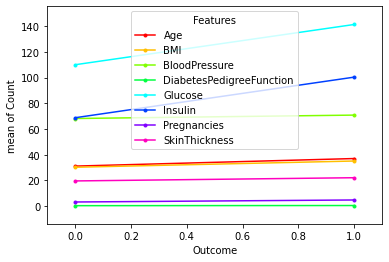

In [102]:
#interaction plot
fig = interaction_plot(x=df_diabetes['Outcome'], trace=df_diabetes['Features'], response=df_diabetes['Count'])
plt.show()

In [103]:
#main effect Outcome
res = stat()
res.tukey_hsd(df=df_diabetes, res_var='Count', xfac_var='Outcome', anova_model='Count~C(Outcome)+C(Features)+C(Outcome):C(Features)')
res.tukey_summary

group1  group2       Diff     Lower      Upper    q-value  p-value
0       1       0  10.045754  7.796693  12.294814  12.383124    0.001

In [104]:
#main effect Features
res = stat()
res.tukey_hsd(df=df_diabetes, res_var='Count', xfac_var='Features', anova_model='Count~C(Outcome)+C(Features)+C(Outcome):C(Features)')
res.tukey_summary

group1                    group2        Diff  \
0                Pregnancies                   Glucose  117.049479   
1                Pregnancies             BloodPressure   65.260417   
2                Pregnancies             SkinThickness   16.691406   
3                Pregnancies                   Insulin   75.954427   
4                Pregnancies                       BMI   28.147526   
5                Pregnancies  DiabetesPedigreeFunction    3.373176   
6                Pregnancies                       Age   29.395833   
7                    Glucose             BloodPressure   51.789062   
8                    Glucose             SkinThickness  100.358073   
9                    Glucose                   Insulin   41.095052   
10                   Glucose                       BMI   88.901953   
11                   Glucose  DiabetesPedigreeFunction  120.422655   
12                   Glucose                       Age   87.653646   
13             BloodPressure             SkinThickness   48.569010   
14             BloodPressure                   Insulin   10.694010   
15             BloodPressure                       BMI   37.112891   
16             BloodPressure  DiabetesPedigreeFunction   68.633592   
17             BloodPressure                       Age   35.864583   
18             SkinThickness                   Insulin   59.263021   
19             SkinThickness                       BMI   11.456120   
20             SkinThickness  DiabetesPedigreeFunction   20.064582   
21             SkinThickness                       Age   12.704427   
22                   Insulin                       BMI   47.806901   
23                   Insulin  DiabetesPedigreeFunction   79.327603   
24                   Insulin                       Age   46.558594   
25                       BMI  DiabetesPedigreeFunction   31.520702   
26                       BMI                       Age    1.248307   
27  DiabetesPedigreeFunction                       Age   32.769009   

         Lower       Upper    q-value   p-value  
0   110.417623  123.681335  75.677370  0.001000  
1    58.628561   71.892273  42.193581  0.001000  
2    10.059550   23.323262  10.791690  0.001000  
3    69.322571   82.586283  49.107705  0.001000  
4    21.515670   34.779382  18.198550  0.001000  
5    -3.258680   10.005032   2.180899  0.757435  
6    22.763977   36.027689  19.005632  0.001000  
7    45.157206   58.420919  33.483789  0.001000  
8    93.726217  106.989929  64.885680  0.001000  
9    34.463196   47.726908  26.569665  0.001000  
10   82.270097   95.533809  57.478820  0.001000  
11  113.790799  127.054511  77.858269  0.001000  
12   81.021790   94.285502  56.671738  0.001000  
13   41.937154   55.200866  31.401891  0.001000  
14    4.062154   17.325866   6.914124  0.001000  
15   30.481035   43.744747  23.995032  0.001000  
16   62.001736   75.265448  44.374480  0.001000  
17   29.232727   42.496439  23.187949  0.001000  
18   52.631165   65.894877  38.316015  0.001000  
19    4.824264   18.087976   7.406859  0.001000  
20   13.432726   26.696438  12.972589  0.001000  
21    6.072571   19.336283   8.213942  0.001000  
22   41.175045   54.438757  30.909155  0.001000  
23   72.695747   85.959459  51.288604  0.001000  
24   39.926738   53.190450  30.102073  0.001000  
25   24.888846   38.152558  20.379448  0.001000  
26   -5.383549    7.880163   0.807083  0.900000  
27   26.137153   39.400865  21.186531  0.001000

In [105]:
#interaction effect between outcomes and features
res.tukey_hsd(df=df_diabetes, res_var='Count', xfac_var=['Outcome','Features'], anova_model='Count ~ C(Outcome) + C(Features) + C(Outcome):C(Features)')
res.tukey_summary.head()

group1              group2        Diff       Lower       Upper  \
0  (1, Pregnancies)        (1, Glucose)  136.391791  123.699866  149.083716   
1  (1, Pregnancies)  (1, BloodPressure)   65.958955   53.267030   78.650880   
2  (1, Pregnancies)  (1, SkinThickness)   17.298507    4.606583   29.990432   
3  (1, Pregnancies)        (1, Insulin)   95.470149   82.778224  108.162074   
4  (1, Pregnancies)            (1, BMI)   30.276866   17.584941   42.968791   

     q-value  p-value  
0  52.092064    0.001  
1  25.191678    0.001  
2   6.606812    0.001  
3  36.462877    0.001  
4  11.563632    0.001

In [106]:
#Ancova
df_diabetes >> group_by(X.Features) >> summarize(n=X['Count'].count(), mean=X['Count'].mean(), std=X['Count'].std())

Features    n        mean         std
0                       Age  768   33.240885   11.760232
1                       BMI  768   31.992578    7.884160
2             BloodPressure  768   69.105469   19.355807
3  DiabetesPedigreeFunction  768    0.471876    0.331329
4                   Glucose  768  120.894531   31.972618
5                   Insulin  768   79.799479  115.244002
6               Pregnancies  768    3.845052    3.369578
7             SkinThickness  768   20.536458   15.952218

In [107]:
df_diabetes >> group_by(X.Features) >> summarize(n=X['Outcome'].count(), mean=X['Outcome'].mean(), std=X['Outcome'].std())

Features    n      mean       std
0                       Age  768  0.348958  0.476951
1                       BMI  768  0.348958  0.476951
2             BloodPressure  768  0.348958  0.476951
3  DiabetesPedigreeFunction  768  0.348958  0.476951
4                   Glucose  768  0.348958  0.476951
5                   Insulin  768  0.348958  0.476951
6               Pregnancies  768  0.348958  0.476951
7             SkinThickness  768  0.348958  0.476951

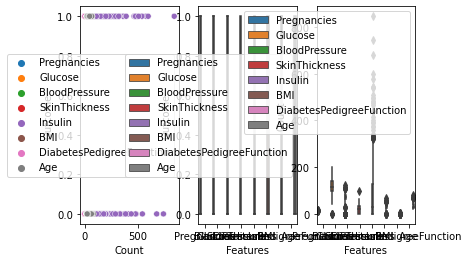

In [108]:
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=df_diabetes, x="Count", y="Outcome", hue=df_diabetes.Features.tolist(), ax=axs[0])
sns.boxplot(data=df_diabetes, x="Features", y="Outcome", hue=df_diabetes.Features.tolist(), ax=axs[1])
sns.boxplot(data=df_diabetes, x="Features", y="Count", hue=df_diabetes.Features.tolist(), ax=axs[2])
plt.show()

In [399]:
from pingouin import ancova
ancova(data=df_diabetes, dv='Count', covar='Outcome', between='Features')

Source            SS    DF           F         p-unc       np2
0  Features  9.319276e+06     7  711.783504  0.000000e+00  0.448167
1   Outcome  1.408635e+05     1   75.311691  5.086194e-18  0.012127
2  Residual  1.147495e+07  6135         NaN           NaN       NaN

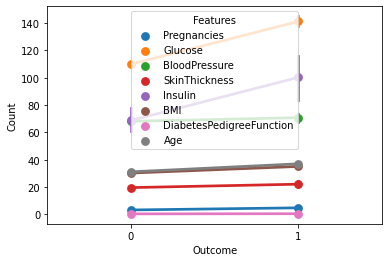

In [417]:
ax = sns.pointplot(x="Outcome", y="Count", hue="Features",
                    data=df_diabetes)

In [110]:
#Two sample t-test
grouped = df_diabetes.groupby(df_diabetes.Features)
df_diabetes_Pregnancies = grouped.get_group("Pregnancies")
df_diabetes_Pregnancies

Outcome     Features  Count
0          1  Pregnancies    6.0
1          0  Pregnancies    1.0
2          1  Pregnancies    8.0
3          0  Pregnancies    1.0
4          1  Pregnancies    0.0
5          0  Pregnancies    5.0
6          1  Pregnancies    3.0
7          0  Pregnancies   10.0
8          1  Pregnancies    2.0
9          1  Pregnancies    8.0
10         0  Pregnancies    4.0
11         1  Pregnancies   10.0
12         0  Pregnancies   10.0
13         1  Pregnancies    1.0
14         1  Pregnancies    5.0
15         1  Pregnancies    7.0
16         1  Pregnancies    0.0
17         1  Pregnancies    7.0
18         0  Pregnancies    1.0
19         1  Pregnancies    1.0
20         0  Pregnancies    3.0
21         0  Pregnancies    8.0
22         1  Pregnancies    7.0
23         1  Pregnancies    9.0
24         1  Pregnancies   11.0
25         1  Pregnancies   10.0
26         1  Pregnancies    7.0
27         0  Pregnancies    1.0
28         0  Pregnancies   13.0
29         0  Pregnancies    5.0
30         0  Pregnancies    5.0
31         1  Pregnancies    3.0
32         0  Pregnancies    3.0
33         0  Pregnancies    6.0
34         0  Pregnancies   10.0
35         0  Pregnancies    4.0
36         0  Pregnancies   11.0
37         1  Pregnancies    9.0
38         1  Pregnancies    2.0
39         1  Pregnancies    4.0
40         0  Pregnancies    3.0
41         0  Pregnancies    7.0
42         0  Pregnancies    7.0
43         1  Pregnancies    9.0
44         0  Pregnancies    7.0
45         1  Pregnancies    0.0
46         0  Pregnancies    1.0
47         0  Pregnancies    2.0
48         1  Pregnancies    7.0
49         0  Pregnancies    7.0
50         0  Pregnancies    1.0
51         0  Pregnancies    1.0
52         0  Pregnancies    5.0
53         1  Pregnancies    8.0
54         0  Pregnancies    7.0
55         0  Pregnancies    1.0
56         1  Pregnancies    7.0
57         0  Pregnancies    0.0
58         0  Pregnancies    0.0
59         0  Pregnancies    0.0
60         0  Pregnancies    2.0
61         1  Pregnancies    8.0
62         0  Pregnancies    5.0
63         0  Pregnancies    2.0
64         1  Pregnancies    7.0
65         0  Pregnancies    5.0
66         1  Pregnancies    0.0
67         0  Pregnancies    2.0
68         0  Pregnancies    1.0
69         0  Pregnancies    4.0
70         1  Pregnancies    2.0
71         0  Pregnancies    5.0
72         1  Pregnancies   13.0
73         0  Pregnancies    4.0
74         0  Pregnancies    1.0
75         0  Pregnancies    1.0
76         0  Pregnancies    7.0
77         0  Pregnancies    5.0
78         1  Pregnancies    0.0
79         0  Pregnancies    2.0
80         0  Pregnancies    3.0
81         0  Pregnancies    2.0
82         0  Pregnancies    7.0
83         0  Pregnancies    0.0
84         1  Pregnancies    5.0
85         0  Pregnancies    2.0
86         0  Pregnancies   13.0
87         0  Pregnancies    2.0
88         1  Pregnancies   15.0
89         0  Pregnancies    1.0
90         0  Pregnancies    1.0
91         0  Pregnancies    4.0
92         0  Pregnancies    7.0
93         1  Pregnancies    4.0
94         0  Pregnancies    2.0
95         0  Pregnancies    6.0
96         0  Pregnancies    2.0
97         0  Pregnancies    1.0
98         0  Pregnancies    6.0
99         1  Pregnancies    1.0
100        1  Pregnancies    1.0
101        0  Pregnancies    1.0
102        0  Pregnancies    0.0
103        0  Pregnancies    1.0
104        0  Pregnancies    2.0
105        0  Pregnancies    1.0
106        0  Pregnancies    1.0
107        0  Pregnancies    4.0
108        0  Pregnancies    3.0
109        1  Pregnancies    0.0
110        1  Pregnancies    3.0
111        1  Pregnancies    8.0
112        0  Pregnancies    1.0
113        0  Pregnancies    4.0
114        1  Pregnancies    7.0
115        1  Pregnancies    4.0
116        1  Pregnancies    5.0
117        0  Pregnancies    5.0
118        0  Pregnancies    4.0
119        0  Pregnancies    4.0
120        1

<AxesSubplot:xlabel='Features', ylabel='Count'>

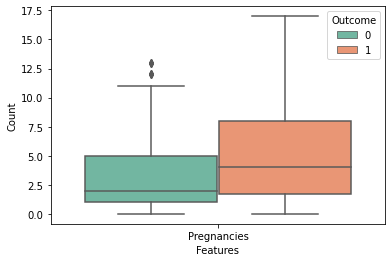

In [111]:
sns.boxplot(x="Features", y="Count", hue="Outcome", data=df_diabetes_Pregnancies, palette="Set2")

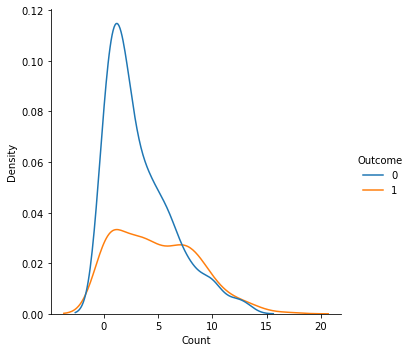

In [112]:
sns.displot(data=df_diabetes_Pregnancies, x="Count", hue="Outcome", kind="kde")

In [113]:
df_diabetes_Pregnancies.groupby('Outcome').describe()

Count                                               
         count      mean       std  min   25%  50%  75%   max
Outcome                                                      
0        500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0
1        268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0

In [114]:
df_a_Pregnancies = df_diabetes_Pregnancies[df_diabetes_Pregnancies.Outcome==1]
df_b_Pregnancies = df_diabetes_Pregnancies[df_diabetes_Pregnancies.Outcome==0]

In [115]:
df_a_Pregnancies

Outcome     Features  Count
0          1  Pregnancies    6.0
2          1  Pregnancies    8.0
4          1  Pregnancies    0.0
6          1  Pregnancies    3.0
8          1  Pregnancies    2.0
9          1  Pregnancies    8.0
11         1  Pregnancies   10.0
13         1  Pregnancies    1.0
14         1  Pregnancies    5.0
15         1  Pregnancies    7.0
16         1  Pregnancies    0.0
17         1  Pregnancies    7.0
19         1  Pregnancies    1.0
22         1  Pregnancies    7.0
23         1  Pregnancies    9.0
24         1  Pregnancies   11.0
25         1  Pregnancies   10.0
26         1  Pregnancies    7.0
31         1  Pregnancies    3.0
37         1  Pregnancies    9.0
38         1  Pregnancies    2.0
39         1  Pregnancies    4.0
43         1  Pregnancies    9.0
45         1  Pregnancies    0.0
48         1  Pregnancies    7.0
53         1  Pregnancies    8.0
56         1  Pregnancies    7.0
61         1  Pregnancies    8.0
64         1  Pregnancies    7.0
66         1  Pregnancies    0.0
70         1  Pregnancies    2.0
72         1  Pregnancies   13.0
78         1  Pregnancies    0.0
84         1  Pregnancies    5.0
88         1  Pregnancies   15.0
93         1  Pregnancies    4.0
99         1  Pregnancies    1.0
100        1  Pregnancies    1.0
109        1  Pregnancies    0.0
110        1  Pregnancies    3.0
111        1  Pregnancies    8.0
114        1  Pregnancies    7.0
115        1  Pregnancies    4.0
116        1  Pregnancies    5.0
120        1  Pregnancies    0.0
124        1  Pregnancies    0.0
125        1  Pregnancies    1.0
128        1  Pregnancies    1.0
129        1  Pregnancies    0.0
130        1  Pregnancies    4.0
131        1  Pregnancies    9.0
132        1  Pregnancies    3.0
143        1  Pregnancies   10.0
152        1  Pregnancies    9.0
154        1  Pregnancies    8.0
155        1  Pregnancies    7.0
159        1  Pregnancies   17.0
164        1  Pregnancies    0.0
165        1  Pregnancies    6.0
170        1  Pregnancies    6.0
171        1  Pregnancies    6.0
175        1  Pregnancies    8.0
177        1  Pregnancies    0.0
179        1  Pregnancies    5.0
185        1  Pregnancies    7.0
186        1  Pregnancies    8.0
187        1  Pregnancies    1.0
188        1  Pregnancies    8.0
189        1  Pregnancies    5.0
192        1  Pregnancies    7.0
193        1  Pregnancies   11.0
195        1  Pregnancies    5.0
197        1  Pregnancies    3.0
198        1  Pregnancies    4.0
199        1  Pregnancies    4.0
206        1  Pregnancies    8.0
207        1  Pregnancies    5.0
209        1  Pregnancies    7.0
213        1  Pregnancies    0.0
214        1  Pregnancies    9.0
215        1  Pregnancies   12.0
216        1  Pregnancies    5.0
218        1  Pregnancies    5.0
219        1  Pregnancies    5.0
220        1  Pregnancies    0.0
221        1  Pregnancies    2.0
227        1  Pregnancies    3.0
230        1  Pregnancies    4.0
231        1  Pregnancies    6.0
235        1  Pregnancies    4.0
236        1  Pregnancies    7.0
237        1  Pregnancies    0.0
238        1  Pregnancies    9.0
242        1  Pregnancies    3.0
243        1  Pregnancies    6.0
245        1  Pregnancies    9.0
254        1  Pregnancies   12.0
255        1  Pregnancies    1.0
259        1  Pregnancies   11.0
261        1  Pregnancies    3.0
264        1  Pregnancies    4.0
266        1  Pregnancies    0.0
269        1  Pregnancies    2.0
270        1  Pregnancies   10.0
276        1  Pregnancies    7.0
280        1  Pregnancies    0.0
283        1  Pregnancies    7.0
284        1  Pregnancies    2.0
287        1  Pregnancies    1.0
291        1  Pregnancies    0.0
292        1  Pregnancies    2.0
293        1  Pregnancies    1.0
296        1  Pregnancies    2.0
298        1  Pregnancies   14.0
300        1  Pregnancies    0.0
301        1  Pregnancies    2.0
303        1  Pregnancies    5.0
306        1  Pregnancies   10.0
308        1  Pregnancies    0.0
309        1  Pregnancies    2.0
312        1

In [226]:
a_Pregnancies = df_a_Pregnancies[['Count']]
a_Pregnancies

Count
0      6.0
2      8.0
4      0.0
6      3.0
8      2.0
9      8.0
11    10.0
13     1.0
14     5.0
15     7.0
16     0.0
17     7.0
19     1.0
22     7.0
23     9.0
24    11.0
25    10.0
26     7.0
31     3.0
37     9.0
38     2.0
39     4.0
43     9.0
45     0.0
48     7.0
53     8.0
56     7.0
61     8.0
64     7.0
66     0.0
70     2.0
72    13.0
78     0.0
84     5.0
88    15.0
93     4.0
99     1.0
100    1.0
109    0.0
110    3.0
111    8.0
114    7.0
115    4.0
116    5.0
120    0.0
124    0.0
125    1.0
128    1.0
129    0.0
130    4.0
131    9.0
132    3.0
143   10.0
152    9.0
154    8.0
155    7.0
159   17.0
164    0.0
165    6.0
170    6.0
171    6.0
175    8.0
177    0.0
179    5.0
185    7.0
186    8.0
187    1.0
188    8.0
189    5.0
192    7.0
193   11.0
195    5.0
197    3.0
198    4.0
199    4.0
206    8.0
207    5.0
209    7.0
213    0.0
214    9.0
215   12.0
216    5.0
218    5.0
219    5.0
220    0.0
221    2.0
227    3.0
230    4.0
231    6.0
235    4.0
236    7.0
237    0.0
238    9.0
242    3.0
243    6.0
245    9.0
254   12.0
255    1.0
259   11.0
261    3.0
264    4.0
266    0.0
269    2.0
270   10.0
276    7.0
280    0.0
283    7.0
284    2.0
287    1.0
291    0.0
292    2.0
293    1.0
296    2.0
298   14.0
300    0.0
301    2.0
303    5.0
306   10.0
308    0.0
309    2.0
312    2.0
314    7.0
317    3.0
319    6.0
321    3.0
322    0.0
323   13.0
326    1.0
328    2.0
332    1.0
337    5.0
338    9.0
339    7.0
349    5.0
355    9.0
356    1.0
357   13.0
359    1.0
360    5.0
363    4.0
366    6.0
369    1.0
370    3.0
375   12.0
378    4.0
386    5.0
387    8.0
388    5.0
391    5.0
394    4.0
397    0.0
399    3.0
400    4.0
402    5.0
404    5.0
406    4.0
408    8.0
409    1.0
414    0.0
415    3.0
417    4.0
419    3.0
424    8.0
425    4.0
427    1.0
429    1.0
435    0.0
440    0.0
443    8.0
444    4.0
445    0.0
448    0.0
451    2.0
455   14.0
458   10.0
468    8.0
476    2.0
480    3.0
484    0.0
485    0.0
493    4.0
498    7.0
502    6.0
506    0.0
510   12.0
515    3.0
516    9.0
523    9.0
535    4.0
539    3.0
540    8.0
541    3.0
542   10.0
545    8.0
546    5.0
560    6.0
561    0.0
569    0.0
577    2.0
579    2.0
580    0.0
584    8.0
586    8.0
588    3.0
590   11.0
592    3.0
595    0.0
598    1.0
603    7.0
604    4.0
606    1.0
611    3.0
612    7.0
614   11.0
618    9.0
619    0.0
630    7.0
635   13.0
638    7.0
642    6.0
646    1.0
647    0.0
648   11.0
655    2.0
659    3.0
661    1.0
662    8.0
663    9.0
664    6.0
666    4.0
667   10.0
675    6.0
676    9.0
678    3.0
681    0.0
683    4.0
689    1.0
691   13.0
693    7.0
695    7.0
696    3.0
701    6.0
702    1.0
706   10.0
708    9.0
709    2.0
712   10.0
715    7.0
716    3.0
719    5.0
722    1.0
730    3.0
731    8.0
732    2.0
739    1.0
740   11.0
743    9.0
746    1.0
748    3.0
749    6.0
750    4.0
753    0.0
754    8.0
755    1.0
757    0.0
759    6.0
761    9.0
766    1.0

In [117]:
df_b_Pregnancies

Outcome     Features  Count
1          0  Pregnancies    1.0
3          0  Pregnancies    1.0
5          0  Pregnancies    5.0
7          0  Pregnancies   10.0
10         0  Pregnancies    4.0
12         0  Pregnancies   10.0
18         0  Pregnancies    1.0
20         0  Pregnancies    3.0
21         0  Pregnancies    8.0
27         0  Pregnancies    1.0
28         0  Pregnancies   13.0
29         0  Pregnancies    5.0
30         0  Pregnancies    5.0
32         0  Pregnancies    3.0
33         0  Pregnancies    6.0
34         0  Pregnancies   10.0
35         0  Pregnancies    4.0
36         0  Pregnancies   11.0
40         0  Pregnancies    3.0
41         0  Pregnancies    7.0
42         0  Pregnancies    7.0
44         0  Pregnancies    7.0
46         0  Pregnancies    1.0
47         0  Pregnancies    2.0
49         0  Pregnancies    7.0
50         0  Pregnancies    1.0
51         0  Pregnancies    1.0
52         0  Pregnancies    5.0
54         0  Pregnancies    7.0
55         0  Pregnancies    1.0
57         0  Pregnancies    0.0
58         0  Pregnancies    0.0
59         0  Pregnancies    0.0
60         0  Pregnancies    2.0
62         0  Pregnancies    5.0
63         0  Pregnancies    2.0
65         0  Pregnancies    5.0
67         0  Pregnancies    2.0
68         0  Pregnancies    1.0
69         0  Pregnancies    4.0
71         0  Pregnancies    5.0
73         0  Pregnancies    4.0
74         0  Pregnancies    1.0
75         0  Pregnancies    1.0
76         0  Pregnancies    7.0
77         0  Pregnancies    5.0
79         0  Pregnancies    2.0
80         0  Pregnancies    3.0
81         0  Pregnancies    2.0
82         0  Pregnancies    7.0
83         0  Pregnancies    0.0
85         0  Pregnancies    2.0
86         0  Pregnancies   13.0
87         0  Pregnancies    2.0
89         0  Pregnancies    1.0
90         0  Pregnancies    1.0
91         0  Pregnancies    4.0
92         0  Pregnancies    7.0
94         0  Pregnancies    2.0
95         0  Pregnancies    6.0
96         0  Pregnancies    2.0
97         0  Pregnancies    1.0
98         0  Pregnancies    6.0
101        0  Pregnancies    1.0
102        0  Pregnancies    0.0
103        0  Pregnancies    1.0
104        0  Pregnancies    2.0
105        0  Pregnancies    1.0
106        0  Pregnancies    1.0
107        0  Pregnancies    4.0
108        0  Pregnancies    3.0
112        0  Pregnancies    1.0
113        0  Pregnancies    4.0
117        0  Pregnancies    5.0
118        0  Pregnancies    4.0
119        0  Pregnancies    4.0
121        0  Pregnancies    6.0
122        0  Pregnancies    2.0
123        0  Pregnancies    5.0
126        0  Pregnancies    3.0
127        0  Pregnancies    1.0
133        0  Pregnancies    8.0
134        0  Pregnancies    2.0
135        0  Pregnancies    2.0
136        0  Pregnancies    0.0
137        0  Pregnancies    0.0
138        0  Pregnancies    0.0
139        0  Pregnancies    5.0
140        0  Pregnancies    3.0
141        0  Pregnancies    5.0
142        0  Pregnancies    2.0
144        0  Pregnancies    4.0
145        0  Pregnancies    0.0
146        0  Pregnancies    9.0
147        0  Pregnancies    2.0
148        0  Pregnancies    5.0
149        0  Pregnancies    2.0
150        0  Pregnancies    1.0
151        0  Pregnancies    4.0
153        0  Pregnancies    1.0
156        0  Pregnancies    2.0
157        0  Pregnancies    1.0
158        0  Pregnancies    2.0
160        0  Pregnancies    4.0
161        0  Pregnancies    7.0
162        0  Pregnancies    0.0
163        0  Pregnancies    2.0
166        0  Pregnancies    3.0
167        0  Pregnancies    4.0
168        0  Pregnancies    4.0
169        0  Pregnancies    3.0
172        0  Pregnancies    2.0
173        0  Pregnancies    1.0
174        0  Pregnancies    2.0
176        0  Pregnancies    6.0
178        0  Pregnancies    5.0
180        0  Pregnancies    6.0
181        0  Pregnancies    0.0
182        0  Pregnancies    1.0
183        0  Pregnancies    5.0
184        0

In [118]:
b_Pregnancies = df_b_Pregnancies[['Count']]
b_Pregnancies

Count
1      1.0
3      1.0
5      5.0
7     10.0
10     4.0
12    10.0
18     1.0
20     3.0
21     8.0
27     1.0
28    13.0
29     5.0
30     5.0
32     3.0
33     6.0
34    10.0
35     4.0
36    11.0
40     3.0
41     7.0
42     7.0
44     7.0
46     1.0
47     2.0
49     7.0
50     1.0
51     1.0
52     5.0
54     7.0
55     1.0
57     0.0
58     0.0
59     0.0
60     2.0
62     5.0
63     2.0
65     5.0
67     2.0
68     1.0
69     4.0
71     5.0
73     4.0
74     1.0
75     1.0
76     7.0
77     5.0
79     2.0
80     3.0
81     2.0
82     7.0
83     0.0
85     2.0
86    13.0
87     2.0
89     1.0
90     1.0
91     4.0
92     7.0
94     2.0
95     6.0
96     2.0
97     1.0
98     6.0
101    1.0
102    0.0
103    1.0
104    2.0
105    1.0
106    1.0
107    4.0
108    3.0
112    1.0
113    4.0
117    5.0
118    4.0
119    4.0
121    6.0
122    2.0
123    5.0
126    3.0
127    1.0
133    8.0
134    2.0
135    2.0
136    0.0
137    0.0
138    0.0
139    5.0
140    3.0
141    5.0
142    2.0
144    4.0
145    0.0
146    9.0
147    2.0
148    5.0
149    2.0
150    1.0
151    4.0
153    1.0
156    2.0
157    1.0
158    2.0
160    4.0
161    7.0
162    0.0
163    2.0
166    3.0
167    4.0
168    4.0
169    3.0
172    2.0
173    1.0
174    2.0
176    6.0
178    5.0
180    6.0
181    0.0
182    1.0
183    5.0
184    4.0
190    3.0
191    9.0
194    8.0
196    1.0
200    0.0
201    1.0
202    0.0
203    2.0
204    6.0
205    5.0
208    1.0
210    2.0
211    0.0
212    7.0
217    6.0
222    7.0
223    7.0
224    1.0
225    1.0
226    0.0
228    4.0
229    0.0
232    1.0
233    4.0
234    3.0
239    0.0
240    1.0
241    4.0
244    2.0
246   10.0
247    0.0
248    9.0
249    1.0
250    9.0
251    2.0
252    2.0
253    0.0
256    3.0
257    2.0
258    1.0
260    3.0
262    4.0
263    3.0
265    5.0
267    2.0
268    0.0
271    2.0
272    3.0
273    1.0
274   13.0
275    2.0
277    0.0
278    5.0
279    2.0
281   10.0
282    7.0
285    7.0
286    5.0
288    4.0
289    5.0
290    0.0
294    0.0
295    6.0
297    0.0
299    8.0
302    5.0
304    3.0
305    2.0
307    0.0
310    6.0
311    0.0
313    3.0
315    2.0
316    3.0
318    3.0
320    4.0
324    2.0
325    1.0
327   10.0
329    6.0
330    8.0
331    2.0
333   12.0
334    1.0
335    0.0
336    0.0
340    1.0
341    1.0
342    1.0
343    5.0
344    8.0
345    8.0
346    1.0
347    3.0
348    3.0
350    4.0
351    4.0
352    3.0
353    1.0
354    3.0
358   12.0
361    5.0
362    5.0
364    4.0
365    5.0
367    0.0
368    3.0
371    0.0
372    0.0
373    2.0
374    2.0
376    0.0
377    1.0
379    0.0
380    1.0
381    0.0
382    1.0
383    1.0
384    1.0
385    1.0
389    3.0
390    1.0
392    1.0
393    4.0
395    2.0
396    3.0
398    3.0
401    6.0
403    9.0
405    2.0
407    0.0
410    6.0
411    1.0
412    1.0
413    1.0
416    1.0
418    1.0
420    1.0
421    2.0
422    0.0
423    2.0
426    0.0
428    0.0
430    2.0
431    3.0
432    1.0
433    2.0
434    1.0
436   12.0
437    5.0
438    1.0
439    6.0
441    2.0
442    4.0
446    1.0
447    0.0
449    0.0
450    1.0
452    0.0
453    2.0
454    2.0
456    1.0
457    5.0
459    9.0
460    9.0
461    1.0
462    8.0
463    5.0
464   10.0
465    0.0
466    0.0
467    0.0
469    6.0
470    1.0
471    0.0
472    0.0
473    7.0
474    4.0
475    0.0
477    7.0
478    8.0
479    4.0
481    0.0
482    4.0
483    0.0
486    1.0
487    0.0
488    4.0
489    8.0
490    2.0
491    2.0
492    4.0
494    3.0
495    6.0
496    5.0
497    2.0
499    6.0
500    2.0
501    3.0
503    7.0
504    3.0
505   10.0
507    1.0
508    2.0
509    8.0
511    0.0
512    9.0
513    2.0
514    3.0
517    7.0
518   13.0
519    6.0
520    2.0
521    3.0
522    6.0
524    3.0
525    3.0
526    1.0
527    3.0
528    0.0
529    0.0
530    2.0
531    0.0
532    1.0
533    6.0
534    1.0
536    0.0
537    0.0
538    0.0
543    4.0
544    1.0
547    4.0
548    1.0
549    4.0
550    1.0
551    3.0
552    6.0
553    1.0
554    1.0
555    7.0
556    1.0
557    8.0
5

In [209]:
tStat, pValue = stats.ttest_ind(a_Pregnancies, b_Pregnancies, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[6.8219256e-09] T-Statistic:[5.90696148]


In [227]:
def Cohen_d(a_Pregnancies, b_Pregnancies):
    diff = a_Pregnancies.mean() - b_Pregnancies.mean()
    n1,n2 = len(a_Pregnancies),len(b_Pregnancies)
    var1 = a_Pregnancies.var()
    var2 = b_Pregnancies.var()
    pooled_var = (n1*var1+n2*var2) / (n1+n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [228]:
Cohen_d(a_Pregnancies,b_Pregnancies)

Count    0.476784
dtype: float64

In [398]:
mean_a_Pregnancies = a_Pregnancies.mean()
mean_b_Pregnancies = b_Pregnancies.mean()
diff_mean = mean_a_Pregnancies - mean_b_Pregnancies
diff_mean

Count    1.567672
dtype: float64

In [274]:
n1=print(len(a_Pregnancies))
n2=print(len(b_Pregnancies))

268
500


In [281]:
alpha = 0.05                                                 
n1, n2 = len(a_Pregnancies), len(b_Pregnancies)                                  
s1, s2 = np.var(a_Pregnancies, ddof=1), np.var(b_Pregnancies, ddof=1)             
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
df = n1 + n2 - 2                                            
t = stats.t.ppf(1 - alpha/2, df)                        

lower = (np.mean(a_Pregnancies) - np.mean(b_Pregnancies)) - t * np.sqrt(1 / len(a_Pregnancies) + 1 / len(b_Pregnancies)) * s
upper = (np.mean(a_Pregnancies) - np.mean(b_Pregnancies)) + t * np.sqrt(1 / len(a_Pregnancies) + 1 / len(b_Pregnancies)) * s
(lower, upper)

(Count    1.079067
 dtype: float64,
 Count    2.056276
 dtype: float64)

In [353]:
from scipy.stats import ttest_ind
ttest_ind(a_Pregnancies,b_Pregnancies)

Ttest_indResult(statistic=array([6.29843055]), pvalue=array([5.0651273e-10]))

In [306]:
effect_size = 0.476784
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 70.03


In [301]:
power_analysis = TTestIndPower()
power = power_analysis.power(effect_size = 0.476784, alpha = 0.05, nobs1 = 70, ratio = 1, alternative = 'two-sided')
print('The power for the hypothesis testing is', round(power, 2))

The power for the hypothesis testing is 0.8


In [309]:
power_analysis = TTestIndPower()
alpha = power_analysis.solve_power(effect_size = 0.476784, power = 0.8, nobs1 = 70, ratio = 1, alternative = 'two-sided')
print('The significance level for the hypothesis testing is', round(alpha, 2))

The significance level for the hypothesis testing is 0.05


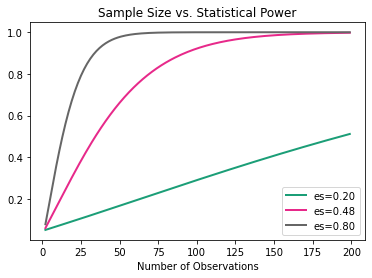

In [413]:
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(2,200),
                          effect_size=np.array([0.2, 0.48, 0.8]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.show()

In [120]:
grouped = df_diabetes.groupby(df_diabetes.Features)
df_diabetes_Glucose = grouped.get_group("Glucose")
df_diabetes_Glucose

Outcome Features  Count
768         1  Glucose  148.0
769         0  Glucose   85.0
770         1  Glucose  183.0
771         0  Glucose   89.0
772         1  Glucose  137.0
773         0  Glucose  116.0
774         1  Glucose   78.0
775         0  Glucose  115.0
776         1  Glucose  197.0
777         1  Glucose  125.0
778         0  Glucose  110.0
779         1  Glucose  168.0
780         0  Glucose  139.0
781         1  Glucose  189.0
782         1  Glucose  166.0
783         1  Glucose  100.0
784         1  Glucose  118.0
785         1  Glucose  107.0
786         0  Glucose  103.0
787         1  Glucose  115.0
788         0  Glucose  126.0
789         0  Glucose   99.0
790         1  Glucose  196.0
791         1  Glucose  119.0
792         1  Glucose  143.0
793         1  Glucose  125.0
794         1  Glucose  147.0
795         0  Glucose   97.0
796         0  Glucose  145.0
797         0  Glucose  117.0
798         0  Glucose  109.0
799         1  Glucose  158.0
800         0  Glucose   88.0
801         0  Glucose   92.0
802         0  Glucose  122.0
803         0  Glucose  103.0
804         0  Glucose  138.0
805         1  Glucose  102.0
806         1  Glucose   90.0
807         1  Glucose  111.0
808         0  Glucose  180.0
809         0  Glucose  133.0
810         0  Glucose  106.0
811         1  Glucose  171.0
812         0  Glucose  159.0
813         1  Glucose  180.0
814         0  Glucose  146.0
815         0  Glucose   71.0
816         1  Glucose  103.0
817         0  Glucose  105.0
818         0  Glucose  103.0
819         0  Glucose  101.0
820         0  Glucose   88.0
821         1  Glucose  176.0
822         0  Glucose  150.0
823         0  Glucose   73.0
824         1  Glucose  187.0
825         0  Glucose  100.0
826         0  Glucose  146.0
827         0  Glucose  105.0
828         0  Glucose   84.0
829         1  Glucose  133.0
830         0  Glucose   44.0
831         0  Glucose  141.0
832         1  Glucose  114.0
833         0  Glucose   99.0
834         1  Glucose  109.0
835         0  Glucose  109.0
836         0  Glucose   95.0
837         0  Glucose  146.0
838         1  Glucose  100.0
839         0  Glucose  139.0
840         1  Glucose  126.0
841         0  Glucose  129.0
842         0  Glucose   79.0
843         0  Glucose    0.0
844         0  Glucose   62.0
845         0  Glucose   95.0
846         1  Glucose  131.0
847         0  Glucose  112.0
848         0  Glucose  113.0
849         0  Glucose   74.0
850         0  Glucose   83.0
851         0  Glucose  101.0
852         1  Glucose  137.0
853         0  Glucose  110.0
854         0  Glucose  106.0
855         0  Glucose  100.0
856         1  Glucose  136.0
857         0  Glucose  107.0
858         0  Glucose   80.0
859         0  Glucose  123.0
860         0  Glucose   81.0
861         1  Glucose  134.0
862         0  Glucose  142.0
863         0  Glucose  144.0
864         0  Glucose   92.0
865         0  Glucose   71.0
866         0  Glucose   93.0
867         1  Glucose  122.0
868         1  Glucose  163.0
869         0  Glucose  151.0
870         0  Glucose  125.0
871         0  Glucose   81.0
872         0  Glucose   85.0
873         0  Glucose  126.0
874         0  Glucose   96.0
875         0  Glucose  144.0
876         0  Glucose   83.0
877         1  Glucose   95.0
878         1  Glucose  171.0
879         1  Glucose  155.0
880         0  Glucose   89.0
881         0  Glucose   76.0
882         1  Glucose  160.0
883         1  Glucose  146.0
884         1  Glucose  124.0
885         0  Glucose   78.0
886         0  Glucose   97.0
887         0  Glucose   99.0
888         1  Glucose  162.0
889         0  Glucose  111.0
890         0  Glucose  107.0
891         0  Glucose  132.0
892         1  Glucose  113.0
893         1  Glucose   88.0
894         0  Glucose  120.0
895         0  Glucose  118.0
896         1  Glucose  117.0
897         1  Glucose  105.0
898         1  Glucose  173.0
899         1  Glucose  122.0
900         1  G

<AxesSubplot:xlabel='Features', ylabel='Count'>

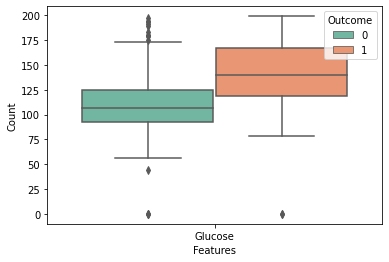

In [121]:
sns.boxplot(x="Features", y="Count", hue="Outcome", data=df_diabetes_Glucose, palette="Set2")

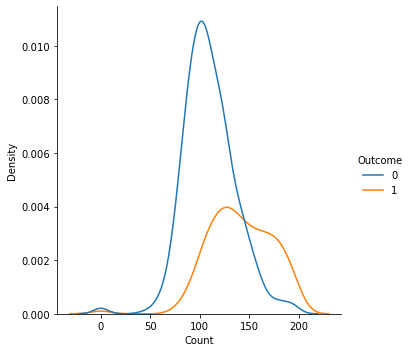

In [122]:
sns.displot(data=df_diabetes_Glucose, x="Count", hue="Outcome", kind="kde")

In [123]:
df_diabetes_Glucose.groupby('Outcome').describe()

Count                                                        
         count        mean        std  min    25%    50%    75%    max
Outcome                                                               
0        500.0  109.980000  26.141200  0.0   93.0  107.0  125.0  197.0
1        268.0  141.257463  31.939622  0.0  119.0  140.0  167.0  199.0

In [124]:
df_a_Glucose = df_diabetes_Glucose[df_diabetes_Glucose.Outcome==1]
df_b_Glucose = df_diabetes_Glucose[df_diabetes_Glucose.Outcome==0]

In [125]:
df_a_Glucose

Outcome Features  Count
768         1  Glucose  148.0
770         1  Glucose  183.0
772         1  Glucose  137.0
774         1  Glucose   78.0
776         1  Glucose  197.0
777         1  Glucose  125.0
779         1  Glucose  168.0
781         1  Glucose  189.0
782         1  Glucose  166.0
783         1  Glucose  100.0
784         1  Glucose  118.0
785         1  Glucose  107.0
787         1  Glucose  115.0
790         1  Glucose  196.0
791         1  Glucose  119.0
792         1  Glucose  143.0
793         1  Glucose  125.0
794         1  Glucose  147.0
799         1  Glucose  158.0
805         1  Glucose  102.0
806         1  Glucose   90.0
807         1  Glucose  111.0
811         1  Glucose  171.0
813         1  Glucose  180.0
816         1  Glucose  103.0
821         1  Glucose  176.0
824         1  Glucose  187.0
829         1  Glucose  133.0
832         1  Glucose  114.0
834         1  Glucose  109.0
838         1  Glucose  100.0
840         1  Glucose  126.0
846         1  Glucose  131.0
852         1  Glucose  137.0
856         1  Glucose  136.0
861         1  Glucose  134.0
867         1  Glucose  122.0
868         1  Glucose  163.0
877         1  Glucose   95.0
878         1  Glucose  171.0
879         1  Glucose  155.0
882         1  Glucose  160.0
883         1  Glucose  146.0
884         1  Glucose  124.0
888         1  Glucose  162.0
892         1  Glucose  113.0
893         1  Glucose   88.0
896         1  Glucose  117.0
897         1  Glucose  105.0
898         1  Glucose  173.0
899         1  Glucose  122.0
900         1  Glucose  170.0
911         1  Glucose  108.0
920         1  Glucose  156.0
922         1  Glucose  188.0
923         1  Glucose  152.0
927         1  Glucose  163.0
932         1  Glucose  131.0
933         1  Glucose  104.0
938         1  Glucose  102.0
939         1  Glucose  134.0
943         1  Glucose  179.0
945         1  Glucose  129.0
947         1  Glucose  130.0
953         1  Glucose  194.0
954         1  Glucose  181.0
955         1  Glucose  128.0
956         1  Glucose  109.0
957         1  Glucose  139.0
960         1  Glucose  159.0
961         1  Glucose  135.0
963         1  Glucose  158.0
965         1  Glucose  107.0
966         1  Glucose  109.0
967         1  Glucose  148.0
974         1  Glucose  196.0
975         1  Glucose  162.0
977         1  Glucose  184.0
981         1  Glucose  140.0
982         1  Glucose  112.0
983         1  Glucose  151.0
984         1  Glucose  109.0
986         1  Glucose   85.0
987         1  Glucose  112.0
988         1  Glucose  177.0
989         1  Glucose  158.0
995         1  Glucose  162.0
998         1  Glucose  142.0
999         1  Glucose  134.0
1003        1  Glucose  171.0
1004        1  Glucose  181.0
1005        1  Glucose  179.0
1006        1  Glucose  164.0
1010        1  Glucose  139.0
1011        1  Glucose  119.0
1013        1  Glucose  184.0
1022        1  Glucose   92.0
1023        1  Glucose  113.0
1027        1  Glucose  155.0
1029        1  Glucose  141.0
1032        1  Glucose  123.0
1034        1  Glucose  138.0
1037        1  Glucose  146.0
1038        1  Glucose  101.0
1044        1  Glucose  106.0
1048        1  Glucose  146.0
1051        1  Glucose  161.0
1052        1  Glucose  108.0
1055        1  Glucose  119.0
1059        1  Glucose  107.0
1060        1  Glucose  128.0
1061        1  Glucose  128.0
1064        1  Glucose  146.0
1066        1  Glucose  100.0
1068        1  Glucose  167.0
1069        1  Glucose  144.0
1071        1  Glucose  115.0
1074        1  Glucose  161.0
1076        1  Glucose  128.0
1077        1  Glucose  124.0
1080        1  Glucose  155.0
1082        1  Glucose  109.0
1085        1  Glucose  182.0
1087        1  Glucose  194.0
1089        1  Glucose  112.0
1090        1  Glucose  124.0
1091        1  Glucose  152.0
1094        1  Glucose  122.0
1096        1  Glucose  102.0
1100        1  Glucose  180.0
1105        1  Glucose  115.0
1106        1  Glucose  152.0
1107        1  G

In [126]:
a_Glucose = df_a_Glucose[['Count']]
a_Glucose

Count
768   148.0
770   183.0
772   137.0
774    78.0
776   197.0
777   125.0
779   168.0
781   189.0
782   166.0
783   100.0
784   118.0
785   107.0
787   115.0
790   196.0
791   119.0
792   143.0
793   125.0
794   147.0
799   158.0
805   102.0
806    90.0
807   111.0
811   171.0
813   180.0
816   103.0
821   176.0
824   187.0
829   133.0
832   114.0
834   109.0
838   100.0
840   126.0
846   131.0
852   137.0
856   136.0
861   134.0
867   122.0
868   163.0
877    95.0
878   171.0
879   155.0
882   160.0
883   146.0
884   124.0
888   162.0
892   113.0
893    88.0
896   117.0
897   105.0
898   173.0
899   122.0
900   170.0
911   108.0
920   156.0
922   188.0
923   152.0
927   163.0
932   131.0
933   104.0
938   102.0
939   134.0
943   179.0
945   129.0
947   130.0
953   194.0
954   181.0
955   128.0
956   109.0
957   139.0
960   159.0
961   135.0
963   158.0
965   107.0
966   109.0
967   148.0
974   196.0
975   162.0
977   184.0
981   140.0
982   112.0
983   151.0
984   109.0
986    85.0
987   112.0
988   177.0
989   158.0
995   162.0
998   142.0
999   134.0
1003  171.0
1004  181.0
1005  179.0
1006  164.0
1010  139.0
1011  119.0
1013  184.0
1022   92.0
1023  113.0
1027  155.0
1029  141.0
1032  123.0
1034  138.0
1037  146.0
1038  101.0
1044  106.0
1048  146.0
1051  161.0
1052  108.0
1055  119.0
1059  107.0
1060  128.0
1061  128.0
1064  146.0
1066  100.0
1068  167.0
1069  144.0
1071  115.0
1074  161.0
1076  128.0
1077  124.0
1080  155.0
1082  109.0
1085  182.0
1087  194.0
1089  112.0
1090  124.0
1091  152.0
1094  122.0
1096  102.0
1100  180.0
1105  115.0
1106  152.0
1107  178.0
1117    0.0
1123  165.0
1124  125.0
1125  129.0
1127  196.0
1128  189.0
1131  146.0
1134  124.0
1137  133.0
1138  173.0
1143  140.0
1146  156.0
1154  116.0
1155  105.0
1156  144.0
1159  166.0
1162  158.0
1165  131.0
1167  193.0
1168   95.0
1170  136.0
1172  168.0
1174  115.0
1176  197.0
1177  172.0
1182  138.0
1183  173.0
1185  144.0
1187  129.0
1192  151.0
1193  184.0
1195  181.0
1197   95.0
1203  141.0
1208  189.0
1211  108.0
1212  117.0
1213  180.0
1216  104.0
1219  134.0
1223  175.0
1226  148.0
1236  120.0
1244  105.0
1248  158.0
1252  145.0
1253  135.0
1261  125.0
1266  195.0
1270    0.0
1274  180.0
1278   84.0
1283  163.0
1284  145.0
1291  130.0
1303  132.0
1307  129.0
1308  100.0
1309  128.0
1310   90.0
1313  186.0
1314  187.0
1328  125.0
1329  198.0
1337  121.0
1345  118.0
1347  197.0
1348  151.0
1352  124.0
1354  143.0
1356  176.0
1358  111.0
1360  132.0
1363  188.0
1366  173.0
1371  150.0
1372  183.0
1374  181.0
1379  174.0
1380  168.0
1382  138.0
1386  112.0
1387  119.0
1398  114.0
1403  104.0
1406   97.0
1410  147.0
1414  167.0
1415  179.0
1416  136.0
1423  155.0
1427   80.0
1429  199.0
1430  167.0
1431  145.0
1432  115.0
1434  145.0
1435  111.0
1443  195.0
1444  156.0
1446  121.0
1449  162.0
1451  125.0
1457  144.0
1459  158.0
1461  129.0
1463  142.0
1464  169.0
1469  125.0
1470  168.0
1474  115.0
1476  164.0
1477   93.0
1480  129.0
1483  187.0
1484  173.0
1487   97.0
1490  149.0
1498  130.0
1499  120.0
1500  174.0
1507  102.0
1508  120.0
1511  140.0
1514  147.0
1516  187.0
1517  162.0
1518  136.0
1521  181.0
1522  154.0
1523  128.0
1525  123.0
1527  190.0
1529  170.0
1534  126.0

In [127]:
df_b_Glucose

Outcome Features  Count
769         0  Glucose   85.0
771         0  Glucose   89.0
773         0  Glucose  116.0
775         0  Glucose  115.0
778         0  Glucose  110.0
780         0  Glucose  139.0
786         0  Glucose  103.0
788         0  Glucose  126.0
789         0  Glucose   99.0
795         0  Glucose   97.0
796         0  Glucose  145.0
797         0  Glucose  117.0
798         0  Glucose  109.0
800         0  Glucose   88.0
801         0  Glucose   92.0
802         0  Glucose  122.0
803         0  Glucose  103.0
804         0  Glucose  138.0
808         0  Glucose  180.0
809         0  Glucose  133.0
810         0  Glucose  106.0
812         0  Glucose  159.0
814         0  Glucose  146.0
815         0  Glucose   71.0
817         0  Glucose  105.0
818         0  Glucose  103.0
819         0  Glucose  101.0
820         0  Glucose   88.0
822         0  Glucose  150.0
823         0  Glucose   73.0
825         0  Glucose  100.0
826         0  Glucose  146.0
827         0  Glucose  105.0
828         0  Glucose   84.0
830         0  Glucose   44.0
831         0  Glucose  141.0
833         0  Glucose   99.0
835         0  Glucose  109.0
836         0  Glucose   95.0
837         0  Glucose  146.0
839         0  Glucose  139.0
841         0  Glucose  129.0
842         0  Glucose   79.0
843         0  Glucose    0.0
844         0  Glucose   62.0
845         0  Glucose   95.0
847         0  Glucose  112.0
848         0  Glucose  113.0
849         0  Glucose   74.0
850         0  Glucose   83.0
851         0  Glucose  101.0
853         0  Glucose  110.0
854         0  Glucose  106.0
855         0  Glucose  100.0
857         0  Glucose  107.0
858         0  Glucose   80.0
859         0  Glucose  123.0
860         0  Glucose   81.0
862         0  Glucose  142.0
863         0  Glucose  144.0
864         0  Glucose   92.0
865         0  Glucose   71.0
866         0  Glucose   93.0
869         0  Glucose  151.0
870         0  Glucose  125.0
871         0  Glucose   81.0
872         0  Glucose   85.0
873         0  Glucose  126.0
874         0  Glucose   96.0
875         0  Glucose  144.0
876         0  Glucose   83.0
880         0  Glucose   89.0
881         0  Glucose   76.0
885         0  Glucose   78.0
886         0  Glucose   97.0
887         0  Glucose   99.0
889         0  Glucose  111.0
890         0  Glucose  107.0
891         0  Glucose  132.0
894         0  Glucose  120.0
895         0  Glucose  118.0
901         0  Glucose   84.0
902         0  Glucose   96.0
903         0  Glucose  125.0
904         0  Glucose  100.0
905         0  Glucose   93.0
906         0  Glucose  129.0
907         0  Glucose  105.0
908         0  Glucose  128.0
909         0  Glucose  106.0
910         0  Glucose  108.0
912         0  Glucose  154.0
913         0  Glucose  102.0
914         0  Glucose   57.0
915         0  Glucose  106.0
916         0  Glucose  147.0
917         0  Glucose   90.0
918         0  Glucose  136.0
919         0  Glucose  114.0
921         0  Glucose  153.0
924         0  Glucose   99.0
925         0  Glucose  109.0
926         0  Glucose   88.0
928         0  Glucose  151.0
929         0  Glucose  102.0
930         0  Glucose  114.0
931         0  Glucose  100.0
934         0  Glucose  148.0
935         0  Glucose  120.0
936         0  Glucose  110.0
937         0  Glucose  111.0
940         0  Glucose   87.0
941         0  Glucose   79.0
942         0  Glucose   75.0
944         0  Glucose   85.0
946         0  Glucose  143.0
948         0  Glucose   87.0
949         0  Glucose  119.0
950         0  Glucose    0.0
951         0  Glucose   73.0
952         0  Glucose  141.0
958         0  Glucose  111.0
959         0  Glucose  123.0
962         0  Glucose   85.0
964         0  Glucose  105.0
968         0  Glucose  113.0
969         0  Glucose  138.0
970         0  Glucose  108.0
971         0  Glucose   99.0
972         0  Glucose  103.0
973         0  Glucose  111.0
976         0  Glucose   96.0
978         0  G

In [128]:
b_Glucose = df_b_Glucose[['Count']]
b_Glucose

Count
769    85.0
771    89.0
773   116.0
775   115.0
778   110.0
780   139.0
786   103.0
788   126.0
789    99.0
795    97.0
796   145.0
797   117.0
798   109.0
800    88.0
801    92.0
802   122.0
803   103.0
804   138.0
808   180.0
809   133.0
810   106.0
812   159.0
814   146.0
815    71.0
817   105.0
818   103.0
819   101.0
820    88.0
822   150.0
823    73.0
825   100.0
826   146.0
827   105.0
828    84.0
830    44.0
831   141.0
833    99.0
835   109.0
836    95.0
837   146.0
839   139.0
841   129.0
842    79.0
843     0.0
844    62.0
845    95.0
847   112.0
848   113.0
849    74.0
850    83.0
851   101.0
853   110.0
854   106.0
855   100.0
857   107.0
858    80.0
859   123.0
860    81.0
862   142.0
863   144.0
864    92.0
865    71.0
866    93.0
869   151.0
870   125.0
871    81.0
872    85.0
873   126.0
874    96.0
875   144.0
876    83.0
880    89.0
881    76.0
885    78.0
886    97.0
887    99.0
889   111.0
890   107.0
891   132.0
894   120.0
895   118.0
901    84.0
902    96.0
903   125.0
904   100.0
905    93.0
906   129.0
907   105.0
908   128.0
909   106.0
910   108.0
912   154.0
913   102.0
914    57.0
915   106.0
916   147.0
917    90.0
918   136.0
919   114.0
921   153.0
924    99.0
925   109.0
926    88.0
928   151.0
929   102.0
930   114.0
931   100.0
934   148.0
935   120.0
936   110.0
937   111.0
940    87.0
941    79.0
942    75.0
944    85.0
946   143.0
948    87.0
949   119.0
950     0.0
951    73.0
952   141.0
958   111.0
959   123.0
962    85.0
964   105.0
968   113.0
969   138.0
970   108.0
971    99.0
972   103.0
973   111.0
976    96.0
978    81.0
979   147.0
980   179.0
985   125.0
990   119.0
991   142.0
992   100.0
993    87.0
994   101.0
996   197.0
997   117.0
1000   79.0
1001  122.0
1002   74.0
1007  104.0
1008   91.0
1009   91.0
1012  146.0
1014  122.0
1015  165.0
1016  124.0
1017  111.0
1018  106.0
1019  129.0
1020   90.0
1021   86.0
1024  111.0
1025  114.0
1026  193.0
1028  191.0
1030   95.0
1031  142.0
1033   96.0
1035  128.0
1036  102.0
1039  108.0
1040  122.0
1041   71.0
1042  106.0
1043  100.0
1045  104.0
1046  114.0
1047  108.0
1049  129.0
1050  133.0
1053  136.0
1054  155.0
1056   96.0
1057  108.0
1058   78.0
1062  161.0
1063  151.0
1065  126.0
1067  112.0
1070   77.0
1072  150.0
1073  120.0
1075  137.0
1078   80.0
1079  106.0
1081  113.0
1083  112.0
1084   99.0
1086  115.0
1088  129.0
1092  112.0
1093  157.0
1095  179.0
1097  105.0
1098  118.0
1099   87.0
1101  106.0
1102   95.0
1103  165.0
1104  117.0
1108  130.0
1109   95.0
1110    0.0
1111  122.0
1112   95.0
1113  126.0
1114  139.0
1115  116.0
1116   99.0
1118   92.0
1119  137.0
1120   61.0
1121   90.0
1122   90.0
1126   88.0
1129  158.0
1130  103.0
1132  147.0
1133   99.0
1135  101.0
1136   81.0
1139  118.0
1140   84.0
1141  105.0
1142  122.0
1144   98.0
1145   87.0
1147   93.0
1148  107.0
1149  105.0
1150  109.0
1151   90.0
1152  125.0
1153  119.0
1157  100.0
1158  100.0
1160  131.0
1161  116.0
1163  127.0
1164   96.0
1166   82.0
1169  137.0
1171   72.0
1173  123.0
1175  101.0
1178  102.0
1179  112.0
1180  143.0
1181  143.0
1184   97.0
1186   83.0
1188  119.0
1189   94.0
1190  102.0
1191  115.0
1194   94.0
1196  135.0
1198   99.0
1199   89.0
1200   80.0
1201  139.0
1202   90.0
1204  140.0
1205  147.0
1206   97.0
1207  107.0
1209   83.0
1210  117.0
1214  100.0
1215   95.0
1217  120.0
1218   82.0
1220   91.0
1221  119.0
1222  100.0
1224  135.0
1225   86.0
1227  134.0
1228  120.0
1229   71.0
1230   74.0
1231   88.0
1232  115.0
1233  124.0
1234   74.0
1235   97.0
1237  154.0
1238  144.0
1239  137.0
1240  119.0
1241  136.0
1242  114.0
1243  137.0
1245  114.0
1246  126.0
1247  132.0
1249  123.0
1250   85.0
1251   84.0
1254  139.0
1255  173.0
1256   99.0
1257  194.0
1258   83.0
1259   89.0
1260   99.0
1262   80.0
1263  166.0
1264  110.0
1265   81.0
1267  154.0
1268  117.0
1269   84.0
1271   94.0
1272   96.0
1273   75.0
1275  130.0
1276   84.0
1277  120.0
1279  139.0
1280   91.0
1281   91.0
1282   99.0
1285  125.0
1286   76.0
1287  129.

In [210]:
tStat, pValue = stats.ttest_ind(a_Glucose, b_Glucose, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[2.64416135e-36] T-Statistic:[13.75153707]


In [229]:
def Cohen_d(a_Glucose, b_Glucose):
    diff = a_Glucose.mean() - b_Glucose.mean()
    n1,n2 = len(a_Glucose),len(b_Glucose)
    var1 = a_Glucose.var()
    var2 = b_Glucose.var()
    pooled_var = (n1*var1+n2*var2) / (n1+n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [230]:
Cohen_d(a_Glucose,b_Glucose)

Count    1.105215
dtype: float64

In [391]:
mean_a_Glucose = a_Glucose.mean()
mean_b_Glucose = b_Glucose.mean()
diff_mean = mean_a_Glucose - mean_b_Glucose
diff_mean

Count    31.277463
dtype: float64

In [282]:
alpha = 0.05                                                 
n1, n2 = len(a_Glucose), len(b_Glucose)                                  
s1, s2 = np.var(a_Glucose, ddof=1), np.var(b_Glucose, ddof=1)             
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
df = n1 + n2 - 2                                            
t = stats.t.ppf(1 - alpha/2, df)                        

lower = (np.mean(a_Glucose) - np.mean(b_Glucose)) - t * np.sqrt(1 / len(a_Glucose) + 1 / len(b_Glucose)) * s
upper = (np.mean(a_Glucose) - np.mean(b_Glucose)) + t * np.sqrt(1 / len(a_Glucose) + 1 / len(b_Glucose)) * s
(lower, upper)

(Count    27.07202
 dtype: float64,
 Count    35.482905
 dtype: float64)

In [294]:
effect_size = 1.105215
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 13.88


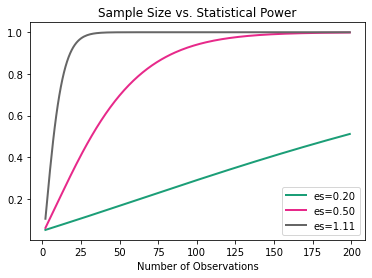

In [418]:
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(2, 200),
                          effect_size=np.array([0.2, 0.5, 1.11]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.show()

In [130]:
grouped = df_diabetes.groupby(df_diabetes.Features)
df_diabetes_BloodPressure = grouped.get_group("BloodPressure")
df_diabetes_BloodPressure

Outcome       Features  Count
1536        1  BloodPressure   72.0
1537        0  BloodPressure   66.0
1538        1  BloodPressure   64.0
1539        0  BloodPressure   66.0
1540        1  BloodPressure   40.0
1541        0  BloodPressure   74.0
1542        1  BloodPressure   50.0
1543        0  BloodPressure    0.0
1544        1  BloodPressure   70.0
1545        1  BloodPressure   96.0
1546        0  BloodPressure   92.0
1547        1  BloodPressure   74.0
1548        0  BloodPressure   80.0
1549        1  BloodPressure   60.0
1550        1  BloodPressure   72.0
1551        1  BloodPressure    0.0
1552        1  BloodPressure   84.0
1553        1  BloodPressure   74.0
1554        0  BloodPressure   30.0
1555        1  BloodPressure   70.0
1556        0  BloodPressure   88.0
1557        0  BloodPressure   84.0
1558        1  BloodPressure   90.0
1559        1  BloodPressure   80.0
1560        1  BloodPressure   94.0
1561        1  BloodPressure   70.0
1562        1  BloodPressure   76.0
1563        0  BloodPressure   66.0
1564        0  BloodPressure   82.0
1565        0  BloodPressure   92.0
1566        0  BloodPressure   75.0
1567        1  BloodPressure   76.0
1568        0  BloodPressure   58.0
1569        0  BloodPressure   92.0
1570        0  BloodPressure   78.0
1571        0  BloodPressure   60.0
1572        0  BloodPressure   76.0
1573        1  BloodPressure   76.0
1574        1  BloodPressure   68.0
1575        1  BloodPressure   72.0
1576        0  BloodPressure   64.0
1577        0  BloodPressure   84.0
1578        0  BloodPressure   92.0
1579        1  BloodPressure  110.0
1580        0  BloodPressure   64.0
1581        1  BloodPressure   66.0
1582        0  BloodPressure   56.0
1583        0  BloodPressure   70.0
1584        1  BloodPressure   66.0
1585        0  BloodPressure    0.0
1586        0  BloodPressure   80.0
1587        0  BloodPressure   50.0
1588        0  BloodPressure   66.0
1589        1  BloodPressure   90.0
1590        0  BloodPressure   66.0
1591        0  BloodPressure   50.0
1592        1  BloodPressure   68.0
1593        0  BloodPressure   88.0
1594        0  BloodPressure   82.0
1595        0  BloodPressure   64.0
1596        0  BloodPressure    0.0
1597        1  BloodPressure   72.0
1598        0  BloodPressure   62.0
1599        0  BloodPressure   58.0
1600        1  BloodPressure   66.0
1601        0  BloodPressure   74.0
1602        1  BloodPressure   88.0
1603        0  BloodPressure   92.0
1604        0  BloodPressure   66.0
1605        0  BloodPressure   85.0
1606        1  BloodPressure   66.0
1607        0  BloodPressure   64.0
1608        1  BloodPressure   90.0
1609        0  BloodPressure   86.0
1610        0  BloodPressure   75.0
1611        0  BloodPressure   48.0
1612        0  BloodPressure   78.0
1613        0  BloodPressure   72.0
1614        1  BloodPressure    0.0
1615        0  BloodPressure   66.0
1616        0  BloodPressure   44.0
1617        0  BloodPressure    0.0
1618        0  BloodPressure   78.0
1619        0  BloodPressure   65.0
1620        1  BloodPressure  108.0
1621        0  BloodPressure   74.0
1622        0  BloodPressure   72.0
1623        0  BloodPressure   68.0
1624        1  BloodPressure   70.0
1625        0  BloodPressure   68.0
1626        0  BloodPressure   55.0
1627        0  BloodPressure   80.0
1628        0  BloodPressure   78.0
1629        1  BloodPressure   72.0
1630        0  BloodPressure   82.0
1631        0  BloodPressure   72.0
1632        0  BloodPressure   62.0
1633        0  BloodPressure   48.0
1634        0  BloodPressure   50.0
1635        1  BloodPressure   90.0
1636        1  BloodPressure   72.0
1637        0  BloodPressure   60.0
1638        0  BloodPressure   96.0
1639        0  BloodPressure   72.0
1640        0  BloodPressure   65.0
1641        0  BloodPressure   56.0
1642        0  BloodPressure  122.0
1643        0  BloodPressure   58.0
1644        0  BloodPressure   58.0
1645        1  BloodPressure   85.0
1646      

<AxesSubplot:xlabel='Features', ylabel='Count'>

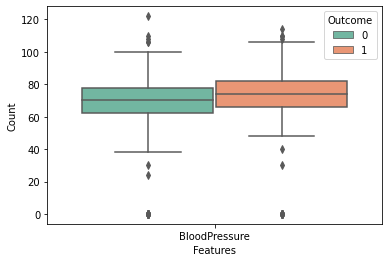

In [131]:
sns.boxplot(x="Features", y="Count", hue="Outcome", data=df_diabetes_BloodPressure, palette="Set2")

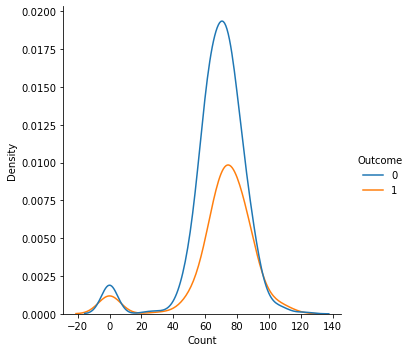

In [132]:
sns.displot(data=df_diabetes_BloodPressure, x="Count", hue="Outcome", kind="kde")

In [133]:
df_diabetes_BloodPressure.groupby('Outcome').describe()

Count                                                    
         count       mean        std  min   25%   50%   75%    max
Outcome                                                           
0        500.0  68.184000  18.063075  0.0  62.0  70.0  78.0  122.0
1        268.0  70.824627  21.491812  0.0  66.0  74.0  82.0  114.0

In [134]:
df_a_BloodPressure = df_diabetes_BloodPressure[df_diabetes_BloodPressure.Outcome==1]
df_b_BloodPressure = df_diabetes_BloodPressure[df_diabetes_BloodPressure.Outcome==0]

In [135]:
df_a_BloodPressure

Outcome       Features  Count
1536        1  BloodPressure   72.0
1538        1  BloodPressure   64.0
1540        1  BloodPressure   40.0
1542        1  BloodPressure   50.0
1544        1  BloodPressure   70.0
1545        1  BloodPressure   96.0
1547        1  BloodPressure   74.0
1549        1  BloodPressure   60.0
1550        1  BloodPressure   72.0
1551        1  BloodPressure    0.0
1552        1  BloodPressure   84.0
1553        1  BloodPressure   74.0
1555        1  BloodPressure   70.0
1558        1  BloodPressure   90.0
1559        1  BloodPressure   80.0
1560        1  BloodPressure   94.0
1561        1  BloodPressure   70.0
1562        1  BloodPressure   76.0
1567        1  BloodPressure   76.0
1573        1  BloodPressure   76.0
1574        1  BloodPressure   68.0
1575        1  BloodPressure   72.0
1579        1  BloodPressure  110.0
1581        1  BloodPressure   66.0
1584        1  BloodPressure   66.0
1589        1  BloodPressure   90.0
1592        1  BloodPressure   68.0
1597        1  BloodPressure   72.0
1600        1  BloodPressure   66.0
1602        1  BloodPressure   88.0
1606        1  BloodPressure   66.0
1608        1  BloodPressure   90.0
1614        1  BloodPressure    0.0
1620        1  BloodPressure  108.0
1624        1  BloodPressure   70.0
1629        1  BloodPressure   72.0
1635        1  BloodPressure   90.0
1636        1  BloodPressure   72.0
1645        1  BloodPressure   85.0
1646        1  BloodPressure   72.0
1647        1  BloodPressure   62.0
1650        1  BloodPressure   54.0
1651        1  BloodPressure   92.0
1652        1  BloodPressure   74.0
1656        1  BloodPressure   76.0
1660        1  BloodPressure   76.0
1661        1  BloodPressure   30.0
1664        1  BloodPressure   88.0
1665        1  BloodPressure   84.0
1666        1  BloodPressure   70.0
1667        1  BloodPressure   56.0
1668        1  BloodPressure   64.0
1679        1  BloodPressure   66.0
1688        1  BloodPressure   86.0
1690        1  BloodPressure   78.0
1691        1  BloodPressure   88.0
1695        1  BloodPressure   72.0
1700        1  BloodPressure   88.0
1701        1  BloodPressure   74.0
1706        1  BloodPressure   82.0
1707        1  BloodPressure   70.0
1711        1  BloodPressure   72.0
1713        1  BloodPressure  110.0
1715        1  BloodPressure   82.0
1721        1  BloodPressure   68.0
1722        1  BloodPressure   68.0
1723        1  BloodPressure   98.0
1724        1  BloodPressure   76.0
1725        1  BloodPressure   80.0
1728        1  BloodPressure   66.0
1729        1  BloodPressure    0.0
1731        1  BloodPressure   84.0
1733        1  BloodPressure   62.0
1734        1  BloodPressure   64.0
1735        1  BloodPressure   60.0
1742        1  BloodPressure   76.0
1743        1  BloodPressure  104.0
1745        1  BloodPressure   84.0
1749        1  BloodPressure   65.0
1750        1  BloodPressure   82.0
1751        1  BloodPressure   70.0
1752        1  BloodPressure   62.0
1754        1  BloodPressure   74.0
1755        1  BloodPressure   66.0
1756        1  BloodPressure   60.0
1757        1  BloodPressure   90.0
1763        1  BloodPressure   52.0
1766        1  BloodPressure   86.0
1767        1  BloodPressure   80.0
1771        1  BloodPressure   72.0
1772        1  BloodPressure   84.0
1773        1  BloodPressure   90.0
1774        1  BloodPressure   84.0
1778        1  BloodPressure   54.0
1779        1  BloodPressure   50.0
1781        1  BloodPressure   85.0
1790        1  BloodPressure   62.0
1791        1  BloodPressure   64.0
1795        1  BloodPressure   76.0
1797        1  BloodPressure    0.0
1800        1  BloodPressure   62.0
1802        1  BloodPressure    0.0
1805        1  BloodPressure    0.0
1806        1  BloodPressure   86.0
1812        1  BloodPressure   60.0
1816        1  BloodPressure   70.0
1819        1  BloodPressure   86.0
1820        1  BloodPressure   80.0
1823        1  BloodPressure   86.0
1827        1  BloodPressure   62.0
1828      

In [136]:
a_BloodPressure = df_a_BloodPressure[['Count']]
a_BloodPressure

Count
1536   72.0
1538   64.0
1540   40.0
1542   50.0
1544   70.0
1545   96.0
1547   74.0
1549   60.0
1550   72.0
1551    0.0
1552   84.0
1553   74.0
1555   70.0
1558   90.0
1559   80.0
1560   94.0
1561   70.0
1562   76.0
1567   76.0
1573   76.0
1574   68.0
1575   72.0
1579  110.0
1581   66.0
1584   66.0
1589   90.0
1592   68.0
1597   72.0
1600   66.0
1602   88.0
1606   66.0
1608   90.0
1614    0.0
1620  108.0
1624   70.0
1629   72.0
1635   90.0
1636   72.0
1645   85.0
1646   72.0
1647   62.0
1650   54.0
1651   92.0
1652   74.0
1656   76.0
1660   76.0
1661   30.0
1664   88.0
1665   84.0
1666   70.0
1667   56.0
1668   64.0
1679   66.0
1688   86.0
1690   78.0
1691   88.0
1695   72.0
1700   88.0
1701   74.0
1706   82.0
1707   70.0
1711   72.0
1713  110.0
1715   82.0
1721   68.0
1722   68.0
1723   98.0
1724   76.0
1725   80.0
1728   66.0
1729    0.0
1731   84.0
1733   62.0
1734   64.0
1735   60.0
1742   76.0
1743  104.0
1745   84.0
1749   65.0
1750   82.0
1751   70.0
1752   62.0
1754   74.0
1755   66.0
1756   60.0
1757   90.0
1763   52.0
1766   86.0
1767   80.0
1771   72.0
1772   84.0
1773   90.0
1774   84.0
1778   54.0
1779   50.0
1781   85.0
1790   62.0
1791   64.0
1795   76.0
1797    0.0
1800   62.0
1802    0.0
1805    0.0
1806   86.0
1812   60.0
1816   70.0
1819   86.0
1820   80.0
1823   86.0
1827   62.0
1828   78.0
1829   48.0
1832   70.0
1834   78.0
1836    0.0
1837   58.0
1839   98.0
1842   68.0
1844   68.0
1845   68.0
1848   74.0
1850   80.0
1853   74.0
1855   78.0
1857   74.0
1858   70.0
1859   90.0
1862   64.0
1864   86.0
1868    0.0
1873   76.0
1874   78.0
1875   84.0
1885   80.0
1891   88.0
1892   50.0
1893    0.0
1895   76.0
1896   64.0
1899   78.0
1902   72.0
1905  102.0
1906   82.0
1911   82.0
1914   75.0
1922   74.0
1923  100.0
1924   82.0
1927   76.0
1930   78.0
1933   66.0
1935   70.0
1936   64.0
1938   84.0
1940   64.0
1942   72.0
1944   74.0
1945   68.0
1950   60.0
1951   84.0
1953   82.0
1955   64.0
1960   78.0
1961   78.0
1963   64.0
1965   82.0
1971    0.0
1976  104.0
1979   70.0
1980   62.0
1981   78.0
1984   64.0
1987   70.0
1991   62.0
1994   84.0
2004    0.0
2012   80.0
2016   70.0
2020    0.0
2021   68.0
2029   70.0
2034   70.0
2038   68.0
2042   90.0
2046   72.0
2051   70.0
2052   88.0
2059   70.0
2071    0.0
2075   92.0
2076   74.0
2077   72.0
2078   85.0
2081   90.0
2082   76.0
2096   76.0
2097   66.0
2105   66.0
2113   80.0
2115   70.0
2116   90.0
2120   76.0
2122   66.0
2124   86.0
2126   84.0
2128   80.0
2131   82.0
2134   74.0
2139   78.0
2140    0.0
2142   78.0
2147   58.0
2148   88.0
2150   74.0
2154   82.0
2155    0.0
2166   64.0
2171   72.0
2174   76.0
2178   80.0
2182   74.0
2183   50.0
2184   84.0
2191   52.0
2195   82.0
2197   76.0
2198  106.0
2199   80.0
2200   60.0
2202   82.0
2203   70.0
2211   70.0
2212   86.0
2214   52.0
2217   76.0
2219   80.0
2225   82.0
2227  114.0
2229   68.0
2231   90.0
2232   74.0
2237   78.0
2238   88.0
2242    0.0
2244   78.0
2245   64.0
2248   62.0
2251   50.0
2252   78.0
2255   76.0
2258   68.0
2266   78.0
2267   86.0
2268   88.0
2275   74.0
2276   80.0
2279   94.0
2282   94.0
2284   70.0
2285   62.0
2286   70.0
2289   88.0
2290   78.0
2291   88.0
2293   72.0
2295   92.0
2297   74.0
2302   60.0

In [137]:
df_b_BloodPressure

Outcome       Features  Count
1537        0  BloodPressure   66.0
1539        0  BloodPressure   66.0
1541        0  BloodPressure   74.0
1543        0  BloodPressure    0.0
1546        0  BloodPressure   92.0
1548        0  BloodPressure   80.0
1554        0  BloodPressure   30.0
1556        0  BloodPressure   88.0
1557        0  BloodPressure   84.0
1563        0  BloodPressure   66.0
1564        0  BloodPressure   82.0
1565        0  BloodPressure   92.0
1566        0  BloodPressure   75.0
1568        0  BloodPressure   58.0
1569        0  BloodPressure   92.0
1570        0  BloodPressure   78.0
1571        0  BloodPressure   60.0
1572        0  BloodPressure   76.0
1576        0  BloodPressure   64.0
1577        0  BloodPressure   84.0
1578        0  BloodPressure   92.0
1580        0  BloodPressure   64.0
1582        0  BloodPressure   56.0
1583        0  BloodPressure   70.0
1585        0  BloodPressure    0.0
1586        0  BloodPressure   80.0
1587        0  BloodPressure   50.0
1588        0  BloodPressure   66.0
1590        0  BloodPressure   66.0
1591        0  BloodPressure   50.0
1593        0  BloodPressure   88.0
1594        0  BloodPressure   82.0
1595        0  BloodPressure   64.0
1596        0  BloodPressure    0.0
1598        0  BloodPressure   62.0
1599        0  BloodPressure   58.0
1601        0  BloodPressure   74.0
1603        0  BloodPressure   92.0
1604        0  BloodPressure   66.0
1605        0  BloodPressure   85.0
1607        0  BloodPressure   64.0
1609        0  BloodPressure   86.0
1610        0  BloodPressure   75.0
1611        0  BloodPressure   48.0
1612        0  BloodPressure   78.0
1613        0  BloodPressure   72.0
1615        0  BloodPressure   66.0
1616        0  BloodPressure   44.0
1617        0  BloodPressure    0.0
1618        0  BloodPressure   78.0
1619        0  BloodPressure   65.0
1621        0  BloodPressure   74.0
1622        0  BloodPressure   72.0
1623        0  BloodPressure   68.0
1625        0  BloodPressure   68.0
1626        0  BloodPressure   55.0
1627        0  BloodPressure   80.0
1628        0  BloodPressure   78.0
1630        0  BloodPressure   82.0
1631        0  BloodPressure   72.0
1632        0  BloodPressure   62.0
1633        0  BloodPressure   48.0
1634        0  BloodPressure   50.0
1637        0  BloodPressure   60.0
1638        0  BloodPressure   96.0
1639        0  BloodPressure   72.0
1640        0  BloodPressure   65.0
1641        0  BloodPressure   56.0
1642        0  BloodPressure  122.0
1643        0  BloodPressure   58.0
1644        0  BloodPressure   58.0
1648        0  BloodPressure   76.0
1649        0  BloodPressure   62.0
1653        0  BloodPressure   48.0
1654        0  BloodPressure   60.0
1655        0  BloodPressure   76.0
1657        0  BloodPressure   64.0
1658        0  BloodPressure   74.0
1659        0  BloodPressure   80.0
1662        0  BloodPressure   70.0
1663        0  BloodPressure   58.0
1669        0  BloodPressure   74.0
1670        0  BloodPressure   68.0
1671        0  BloodPressure   60.0
1672        0  BloodPressure   70.0
1673        0  BloodPressure   60.0
1674        0  BloodPressure   80.0
1675        0  BloodPressure   72.0
1676        0  BloodPressure   78.0
1677        0  BloodPressure   82.0
1678        0  BloodPressure   52.0
1680        0  BloodPressure   62.0
1681        0  BloodPressure   75.0
1682        0  BloodPressure   80.0
1683        0  BloodPressure   64.0
1684        0  BloodPressure   78.0
1685        0  BloodPressure   70.0
1686        0  BloodPressure   74.0
1687        0  BloodPressure   65.0
1689        0  BloodPressure   82.0
1692        0  BloodPressure   52.0
1693        0  BloodPressure   56.0
1694        0  BloodPressure   74.0
1696        0  BloodPressure   90.0
1697        0  BloodPressure   74.0
1698        0  BloodPressure   80.0
1699        0  BloodPressure   64.0
1702        0  BloodPressure   66.0
1703        0  BloodPressure   68.0
1704        0  BloodPressure   66.0
1705      

In [138]:
b_BloodPressure = df_b_BloodPressure[['Count']]
b_BloodPressure

Count
1537   66.0
1539   66.0
1541   74.0
1543    0.0
1546   92.0
1548   80.0
1554   30.0
1556   88.0
1557   84.0
1563   66.0
1564   82.0
1565   92.0
1566   75.0
1568   58.0
1569   92.0
1570   78.0
1571   60.0
1572   76.0
1576   64.0
1577   84.0
1578   92.0
1580   64.0
1582   56.0
1583   70.0
1585    0.0
1586   80.0
1587   50.0
1588   66.0
1590   66.0
1591   50.0
1593   88.0
1594   82.0
1595   64.0
1596    0.0
1598   62.0
1599   58.0
1601   74.0
1603   92.0
1604   66.0
1605   85.0
1607   64.0
1609   86.0
1610   75.0
1611   48.0
1612   78.0
1613   72.0
1615   66.0
1616   44.0
1617    0.0
1618   78.0
1619   65.0
1621   74.0
1622   72.0
1623   68.0
1625   68.0
1626   55.0
1627   80.0
1628   78.0
1630   82.0
1631   72.0
1632   62.0
1633   48.0
1634   50.0
1637   60.0
1638   96.0
1639   72.0
1640   65.0
1641   56.0
1642  122.0
1643   58.0
1644   58.0
1648   76.0
1649   62.0
1653   48.0
1654   60.0
1655   76.0
1657   64.0
1658   74.0
1659   80.0
1662   70.0
1663   58.0
1669   74.0
1670   68.0
1671   60.0
1672   70.0
1673   60.0
1674   80.0
1675   72.0
1676   78.0
1677   82.0
1678   52.0
1680   62.0
1681   75.0
1682   80.0
1683   64.0
1684   78.0
1685   70.0
1686   74.0
1687   65.0
1689   82.0
1692   52.0
1693   56.0
1694   74.0
1696   90.0
1697   74.0
1698   80.0
1699   64.0
1702   66.0
1703   68.0
1704   66.0
1705   90.0
1708    0.0
1709   60.0
1710   64.0
1712   78.0
1714   78.0
1716   80.0
1717   64.0
1718   74.0
1719   60.0
1720   74.0
1726   62.0
1727   70.0
1730   55.0
1732   58.0
1736   80.0
1737   82.0
1738   68.0
1739   70.0
1740   72.0
1741   72.0
1744   64.0
1746   60.0
1747   85.0
1748   95.0
1753   68.0
1758    0.0
1759   60.0
1760   66.0
1761   78.0
1762   76.0
1764   70.0
1765   80.0
1768   80.0
1769   68.0
1770   68.0
1775   76.0
1776   64.0
1777   70.0
1780   76.0
1782   68.0
1783   90.0
1784   70.0
1785   86.0
1786   52.0
1787   84.0
1788   80.0
1789   68.0
1792   56.0
1793   68.0
1794   50.0
1796   68.0
1798   70.0
1799   80.0
1801   74.0
1803   64.0
1804   52.0
1807   62.0
1808   78.0
1809   78.0
1810   70.0
1811   70.0
1813   64.0
1814   74.0
1815   62.0
1817   76.0
1818   88.0
1821   74.0
1822   84.0
1824   56.0
1825   72.0
1826   88.0
1830   50.0
1831   62.0
1833   84.0
1835   72.0
1838   82.0
1840   76.0
1841   76.0
1843   68.0
1846   66.0
1847   70.0
1849   50.0
1851   68.0
1852   80.0
1854   66.0
1856   60.0
1860   75.0
1861   72.0
1863   70.0
1865   70.0
1866   72.0
1867   58.0
1869   80.0
1870   60.0
1871   76.0
1872    0.0
1876   70.0
1877   74.0
1878   68.0
1879   86.0
1880   72.0
1881   88.0
1882   46.0
1883    0.0
1884   62.0
1886   80.0
1887   84.0
1888   82.0
1889   62.0
1890   78.0
1894   74.0
1897   70.0
1898  108.0
1900   74.0
1901   54.0
1903   64.0
1904   86.0
1907   64.0
1908   64.0
1909   58.0
1910   52.0
1912   82.0
1913   60.0
1915  100.0
1916   72.0
1917   68.0
1918   60.0
1919   62.0
1920   70.0
1921   54.0
1925   68.0
1926   66.0
1928   64.0
1929   72.0
1931   58.0
1932   56.0
1934   70.0
1937   61.0
1939   78.0
1941   48.0
1943   62.0
1946   90.0
1947   72.0
1948   84.0
1949   74.0
1952   68.0
1954   68.0
1956   88.0
1957   68.0
1958   64.0
1959   64.0
1962    0.0
1964   94.0
1966    0.0
1967   74.0
1968   74.0
1969   75.0
1970   68.0
1972   85.0
1973   75.0
1974   70.0
1975   88.0
1977   66.0
1978   64.0
1982   72.0
1983   80.0
1985   74.0
1986   64.0
1988   68.0
1989    0.0
1990   54.0
1992   54.0
1993   68.0
1995   74.0
1996   72.0
1997   62.0
1998   70.0
1999   78.0
2000   98.0
2001   56.0
2002   52.0
2003   64.0
2005   78.0
2006   82.0
2007   70.0
2008   66.0
2009   90.0
2010   64.0
2011   84.0
2013   76.0
2014   74.0
2015   86.0
2017   88.0
2018   58.0
2019   82.0
2022   62.0
2023   78.0
2024   72.0
2025   80.0
2026   65.0
2027   90.0
2028   68.0
2030    0.0
2031   74.0
2032   68.0
2033   72.0
2035   74.0
2036   90.0
2037   72.0
2039   64.0
2040   78.0
2041   82.0
2043   60.0
2044   50.0
2045   78.0
2047   62.0
2048   68.0
2049   62.0
2050   54.0
2053   86.0
2054   60.0
2055   90.

In [211]:
tStat, pValue = stats.ttest_ind(a_BloodPressure, b_BloodPressure, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[0.08735425] T-Statistic:[1.71308659]


In [231]:
def Cohen_d(a_BloodPressure, b_BloodPressure):
    diff = a_BloodPressure.mean() - b_BloodPressure.mean()
    n1,n2 = len(a_BloodPressure),len(b_BloodPressure)
    var1 = a_BloodPressure.var()
    var2 = b_BloodPressure.var()
    pooled_var = (n1*var1+n2*var2) / (n1+n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [232]:
Cohen_d(a_BloodPressure,b_BloodPressure)

Count    0.136616
dtype: float64

In [392]:
mean_a_BloodPressure = a_BloodPressure.mean()
mean_b_BloodPressure = b_BloodPressure.mean()
diff_mean = mean_a_BloodPressure - mean_b_BloodPressure
diff_mean

Count    2.640627
dtype: float64

In [283]:
alpha = 0.05                                                 
n1, n2 = len(a_BloodPressure), len(b_BloodPressure)                                  
s1, s2 = np.var(a_BloodPressure, ddof=1), np.var(b_BloodPressure, ddof=1)             
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
df = n1 + n2 - 2                                            
t = stats.t.ppf(1 - alpha/2, df)                        

lower = (np.mean(a_BloodPressure) - np.mean(b_BloodPressure)) - t * np.sqrt(1 / len(a_BloodPressure) + 1 / len(b_BloodPressure)) * s
upper = (np.mean(a_BloodPressure) - np.mean(b_BloodPressure)) + t * np.sqrt(1 / len(a_BloodPressure) + 1 / len(b_BloodPressure)) * s
(lower, upper)

(Count   -0.231716
 dtype: float64,
 Count    5.51297
 dtype: float64)

In [295]:
effect_size = 0.136616
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 842.03


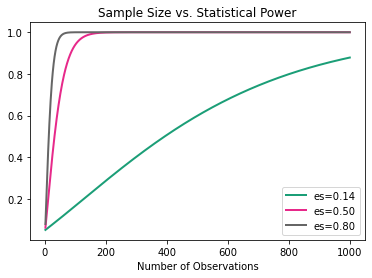

In [412]:
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(2, 1000),
                          effect_size=np.array([0.14, 0.5, 0.8]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.show()

In [140]:
grouped = df_diabetes.groupby(df_diabetes.Features)
df_diabetes_SkinThickness = grouped.get_group("SkinThickness")
df_diabetes_SkinThickness

Outcome       Features  Count
2304        1  SkinThickness   35.0
2305        0  SkinThickness   29.0
2306        1  SkinThickness    0.0
2307        0  SkinThickness   23.0
2308        1  SkinThickness   35.0
2309        0  SkinThickness    0.0
2310        1  SkinThickness   32.0
2311        0  SkinThickness    0.0
2312        1  SkinThickness   45.0
2313        1  SkinThickness    0.0
2314        0  SkinThickness    0.0
2315        1  SkinThickness    0.0
2316        0  SkinThickness    0.0
2317        1  SkinThickness   23.0
2318        1  SkinThickness   19.0
2319        1  SkinThickness    0.0
2320        1  SkinThickness   47.0
2321        1  SkinThickness    0.0
2322        0  SkinThickness   38.0
2323        1  SkinThickness   30.0
2324        0  SkinThickness   41.0
2325        0  SkinThickness    0.0
2326        1  SkinThickness    0.0
2327        1  SkinThickness   35.0
2328        1  SkinThickness   33.0
2329        1  SkinThickness   26.0
2330        1  SkinThickness    0.0
2331        0  SkinThickness   15.0
2332        0  SkinThickness   19.0
2333        0  SkinThickness    0.0
2334        0  SkinThickness   26.0
2335        1  SkinThickness   36.0
2336        0  SkinThickness   11.0
2337        0  SkinThickness    0.0
2338        0  SkinThickness   31.0
2339        0  SkinThickness   33.0
2340        0  SkinThickness    0.0
2341        1  SkinThickness   37.0
2342        1  SkinThickness   42.0
2343        1  SkinThickness   47.0
2344        0  SkinThickness   25.0
2345        0  SkinThickness    0.0
2346        0  SkinThickness   18.0
2347        1  SkinThickness   24.0
2348        0  SkinThickness    0.0
2349        1  SkinThickness   39.0
2350        0  SkinThickness    0.0
2351        0  SkinThickness   27.0
2352        1  SkinThickness   32.0
2353        0  SkinThickness    0.0
2354        0  SkinThickness   11.0
2355        0  SkinThickness   15.0
2356        0  SkinThickness   21.0
2357        1  SkinThickness   34.0
2358        0  SkinThickness   42.0
2359        0  SkinThickness   10.0
2360        1  SkinThickness   39.0
2361        0  SkinThickness   60.0
2362        0  SkinThickness    0.0
2363        0  SkinThickness   41.0
2364        0  SkinThickness    0.0
2365        1  SkinThickness    0.0
2366        0  SkinThickness    0.0
2367        0  SkinThickness   34.0
2368        1  SkinThickness    0.0
2369        0  SkinThickness   27.0
2370        1  SkinThickness   30.0
2371        0  SkinThickness    0.0
2372        0  SkinThickness   13.0
2373        0  SkinThickness   27.0
2374        1  SkinThickness   20.0
2375        0  SkinThickness   35.0
2376        1  SkinThickness    0.0
2377        0  SkinThickness   20.0
2378        0  SkinThickness   30.0
2379        0  SkinThickness   20.0
2380        0  SkinThickness    0.0
2381        0  SkinThickness   33.0
2382        1  SkinThickness    0.0
2383        0  SkinThickness   22.0
2384        0  SkinThickness   13.0
2385        0  SkinThickness    0.0
2386        0  SkinThickness   26.0
2387        0  SkinThickness   28.0
2388        1  SkinThickness    0.0
2389        0  SkinThickness   29.0
2390        0  SkinThickness   54.0
2391        0  SkinThickness   25.0
2392        1  SkinThickness   32.0
2393        0  SkinThickness   19.0
2394        0  SkinThickness    0.0
2395        0  SkinThickness   15.0
2396        0  SkinThickness   40.0
2397        1  SkinThickness    0.0
2398        0  SkinThickness   18.0
2399        0  SkinThickness   27.0
2400        0  SkinThickness   28.0
2401        0  SkinThickness   18.0
2402        0  SkinThickness   30.0
2403        1  SkinThickness   51.0
2404        1  SkinThickness    0.0
2405        0  SkinThickness    0.0
2406        0  SkinThickness    0.0
2407        0  SkinThickness   18.0
2408        0  SkinThickness    0.0
2409        0  SkinThickness   29.0
2410        0  SkinThickness    0.0
2411        0  SkinThickness   28.0
2412        0  SkinThickness   31.0
2413        1  SkinThickness   25.0
2414      

<AxesSubplot:xlabel='Features', ylabel='Count'>

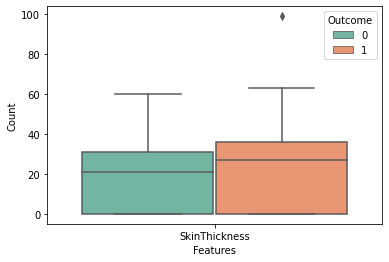

In [141]:
sns.boxplot(x="Features", y="Count", hue="Outcome", data=df_diabetes_SkinThickness, palette="Set2")

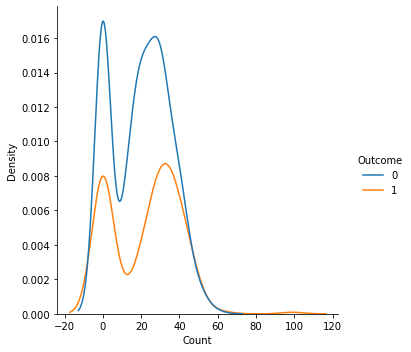

In [142]:
sns.displot(data=df_diabetes_SkinThickness, x="Count", hue="Outcome", kind="kde")

In [143]:
df_diabetes_SkinThickness.groupby('Outcome').describe()

Count                                                  
         count       mean        std  min  25%   50%   75%   max
Outcome                                                         
0        500.0  19.664000  14.889947  0.0  0.0  21.0  31.0  60.0
1        268.0  22.164179  17.679711  0.0  0.0  27.0  36.0  99.0

In [144]:
df_a_SkinThickness = df_diabetes_SkinThickness[df_diabetes_SkinThickness.Outcome==1]
df_b_SkinThickness = df_diabetes_SkinThickness[df_diabetes_SkinThickness.Outcome==0]

In [145]:
df_a_SkinThickness

Outcome       Features  Count
2304        1  SkinThickness   35.0
2306        1  SkinThickness    0.0
2308        1  SkinThickness   35.0
2310        1  SkinThickness   32.0
2312        1  SkinThickness   45.0
2313        1  SkinThickness    0.0
2315        1  SkinThickness    0.0
2317        1  SkinThickness   23.0
2318        1  SkinThickness   19.0
2319        1  SkinThickness    0.0
2320        1  SkinThickness   47.0
2321        1  SkinThickness    0.0
2323        1  SkinThickness   30.0
2326        1  SkinThickness    0.0
2327        1  SkinThickness   35.0
2328        1  SkinThickness   33.0
2329        1  SkinThickness   26.0
2330        1  SkinThickness    0.0
2335        1  SkinThickness   36.0
2341        1  SkinThickness   37.0
2342        1  SkinThickness   42.0
2343        1  SkinThickness   47.0
2347        1  SkinThickness   24.0
2349        1  SkinThickness   39.0
2352        1  SkinThickness   32.0
2357        1  SkinThickness   34.0
2360        1  SkinThickness   39.0
2365        1  SkinThickness    0.0
2368        1  SkinThickness    0.0
2370        1  SkinThickness   30.0
2374        1  SkinThickness   20.0
2376        1  SkinThickness    0.0
2382        1  SkinThickness    0.0
2388        1  SkinThickness    0.0
2392        1  SkinThickness   32.0
2397        1  SkinThickness    0.0
2403        1  SkinThickness   51.0
2404        1  SkinThickness    0.0
2413        1  SkinThickness   25.0
2414        1  SkinThickness   33.0
2415        1  SkinThickness   26.0
2418        1  SkinThickness   32.0
2419        1  SkinThickness    0.0
2420        1  SkinThickness    0.0
2424        1  SkinThickness   56.0
2428        1  SkinThickness    0.0
2429        1  SkinThickness   42.0
2432        1  SkinThickness   24.0
2433        1  SkinThickness    0.0
2434        1  SkinThickness   14.0
2435        1  SkinThickness    0.0
2436        1  SkinThickness   37.0
2447        1  SkinThickness    0.0
2456        1  SkinThickness   28.0
2458        1  SkinThickness    0.0
2459        1  SkinThickness   44.0
2463        1  SkinThickness   41.0
2468        1  SkinThickness    0.0
2469        1  SkinThickness   18.0
2474        1  SkinThickness    0.0
2475        1  SkinThickness   23.0
2479        1  SkinThickness   42.0
2481        1  SkinThickness   46.0
2483        1  SkinThickness    0.0
2489        1  SkinThickness   28.0
2490        1  SkinThickness   36.0
2491        1  SkinThickness   41.0
2492        1  SkinThickness   39.0
2493        1  SkinThickness   35.0
2496        1  SkinThickness    0.0
2497        1  SkinThickness    0.0
2499        1  SkinThickness   41.0
2501        1  SkinThickness   13.0
2502        1  SkinThickness   44.0
2503        1  SkinThickness   27.0
2510        1  SkinThickness   29.0
2511        1  SkinThickness    0.0
2513        1  SkinThickness   33.0
2517        1  SkinThickness   26.0
2518        1  SkinThickness   32.0
2519        1  SkinThickness   40.0
2520        1  SkinThickness   41.0
2522        1  SkinThickness   22.0
2523        1  SkinThickness    0.0
2524        1  SkinThickness   29.0
2525        1  SkinThickness    0.0
2531        1  SkinThickness   38.0
2534        1  SkinThickness    0.0
2535        1  SkinThickness   37.0
2539        1  SkinThickness    0.0
2540        1  SkinThickness   21.0
2541        1  SkinThickness   27.0
2542        1  SkinThickness   21.0
2546        1  SkinThickness    0.0
2547        1  SkinThickness   22.0
2549        1  SkinThickness   15.0
2558        1  SkinThickness    7.0
2559        1  SkinThickness   35.0
2563        1  SkinThickness   28.0
2565        1  SkinThickness    0.0
2568        1  SkinThickness    0.0
2570        1  SkinThickness    0.0
2573        1  SkinThickness    0.0
2574        1  SkinThickness   37.0
2580        1  SkinThickness   24.0
2584        1  SkinThickness    0.0
2587        1  SkinThickness    0.0
2588        1  SkinThickness    0.0
2591        1  SkinThickness   39.0
2595        1  SkinThickness   30.0
2596      

In [146]:
a_SkinThickness = df_a_SkinThickness[['Count']]
a_SkinThickness

Count
2304   35.0
2306    0.0
2308   35.0
2310   32.0
2312   45.0
2313    0.0
2315    0.0
2317   23.0
2318   19.0
2319    0.0
2320   47.0
2321    0.0
2323   30.0
2326    0.0
2327   35.0
2328   33.0
2329   26.0
2330    0.0
2335   36.0
2341   37.0
2342   42.0
2343   47.0
2347   24.0
2349   39.0
2352   32.0
2357   34.0
2360   39.0
2365    0.0
2368    0.0
2370   30.0
2374   20.0
2376    0.0
2382    0.0
2388    0.0
2392   32.0
2397    0.0
2403   51.0
2404    0.0
2413   25.0
2414   33.0
2415   26.0
2418   32.0
2419    0.0
2420    0.0
2424   56.0
2428    0.0
2429   42.0
2432   24.0
2433    0.0
2434   14.0
2435    0.0
2436   37.0
2447    0.0
2456   28.0
2458    0.0
2459   44.0
2463   41.0
2468    0.0
2469   18.0
2474    0.0
2475   23.0
2479   42.0
2481   46.0
2483    0.0
2489   28.0
2490   36.0
2491   41.0
2492   39.0
2493   35.0
2496    0.0
2497    0.0
2499   41.0
2501   13.0
2502   44.0
2503   27.0
2510   29.0
2511    0.0
2513   33.0
2517   26.0
2518   32.0
2519   40.0
2520   41.0
2522   22.0
2523    0.0
2524   29.0
2525    0.0
2531   38.0
2534    0.0
2535   37.0
2539    0.0
2540   21.0
2541   27.0
2542   21.0
2546    0.0
2547   22.0
2549   15.0
2558    7.0
2559   35.0
2563   28.0
2565    0.0
2568    0.0
2570    0.0
2573    0.0
2574   37.0
2580   24.0
2584    0.0
2587    0.0
2588    0.0
2591   39.0
2595   30.0
2596   37.0
2597   45.0
2600   38.0
2602   25.0
2604    0.0
2605   33.0
2607    0.0
2610   23.0
2612   19.0
2613   28.0
2616   17.0
2618   31.0
2621    0.0
2623    0.0
2625   30.0
2626   20.0
2627   33.0
2630   32.0
2632   36.0
2636    0.0
2641    0.0
2642   34.0
2643    0.0
2653   32.0
2659    0.0
2660   40.0
2661   30.0
2663   36.0
2664   33.0
2667    0.0
2670    0.0
2673   28.0
2674   48.0
2679   43.0
2682    0.0
2690   29.0
2691   36.0
2692   26.0
2695    0.0
2698    0.0
2701   40.0
2703   31.0
2704    0.0
2706   41.0
2708    0.0
2710    0.0
2712    0.0
2713   49.0
2718   35.0
2719   33.0
2721   32.0
2723   29.0
2728   32.0
2729   39.0
2731   30.0
2733   25.0
2739    0.0
2744   25.0
2747    0.0
2748   12.0
2749   63.0
2752   37.0
2755    0.0
2759   30.0
2762   48.0
2772    0.0
2780   45.0
2784   30.0
2788    0.0
2789   42.0
2797   18.0
2802   33.0
2806   41.0
2810   26.0
2814   31.0
2819   18.0
2820   34.0
2827    0.0
2839    0.0
2843   49.0
2844   40.0
2845   25.0
2846   32.0
2849   35.0
2850   27.0
2864    0.0
2865   32.0
2873   30.0
2881    0.0
2883   99.0
2884   46.0
2888   24.0
2890    0.0
2892   27.0
2894   40.0
2896    0.0
2899   14.0
2902    0.0
2907   29.0
2908    0.0
2910   42.0
2915   22.0
2916   42.0
2918   26.0
2922   24.0
2923    0.0
2934    0.0
2939    0.0
2942   32.0
2946    0.0
2950   17.0
2951   36.0
2952   35.0
2959   27.0
2963   31.0
2965   43.0
2966   46.0
2967   46.0
2968   39.0
2970   18.0
2971   27.0
2979    0.0
2980    0.0
2982    0.0
2985   36.0
2987    0.0
2993   46.0
2995    0.0
2997   49.0
2999   24.0
3000   19.0
3005   31.0
3006   29.0
3010    0.0
3012    0.0
3013   32.0
3016   36.0
3019   33.0
3020   39.0
3023   27.0
3026   29.0
3034   23.0
3035    0.0
3036   37.0
3043    0.0
3044   37.0
3047    0.0
3050   41.0
3052   22.0
3053    0.0
3054    0.0
3057   44.0
3058   32.0
3059   39.0
3061    0.0
3063    0.0
3065   31.0
3070    0.0

In [147]:
df_b_SkinThickness

Outcome       Features  Count
2305        0  SkinThickness   29.0
2307        0  SkinThickness   23.0
2309        0  SkinThickness    0.0
2311        0  SkinThickness    0.0
2314        0  SkinThickness    0.0
2316        0  SkinThickness    0.0
2322        0  SkinThickness   38.0
2324        0  SkinThickness   41.0
2325        0  SkinThickness    0.0
2331        0  SkinThickness   15.0
2332        0  SkinThickness   19.0
2333        0  SkinThickness    0.0
2334        0  SkinThickness   26.0
2336        0  SkinThickness   11.0
2337        0  SkinThickness    0.0
2338        0  SkinThickness   31.0
2339        0  SkinThickness   33.0
2340        0  SkinThickness    0.0
2344        0  SkinThickness   25.0
2345        0  SkinThickness    0.0
2346        0  SkinThickness   18.0
2348        0  SkinThickness    0.0
2350        0  SkinThickness    0.0
2351        0  SkinThickness   27.0
2353        0  SkinThickness    0.0
2354        0  SkinThickness   11.0
2355        0  SkinThickness   15.0
2356        0  SkinThickness   21.0
2358        0  SkinThickness   42.0
2359        0  SkinThickness   10.0
2361        0  SkinThickness   60.0
2362        0  SkinThickness    0.0
2363        0  SkinThickness   41.0
2364        0  SkinThickness    0.0
2366        0  SkinThickness    0.0
2367        0  SkinThickness   34.0
2369        0  SkinThickness   27.0
2371        0  SkinThickness    0.0
2372        0  SkinThickness   13.0
2373        0  SkinThickness   27.0
2375        0  SkinThickness   35.0
2377        0  SkinThickness   20.0
2378        0  SkinThickness   30.0
2379        0  SkinThickness   20.0
2380        0  SkinThickness    0.0
2381        0  SkinThickness   33.0
2383        0  SkinThickness   22.0
2384        0  SkinThickness   13.0
2385        0  SkinThickness    0.0
2386        0  SkinThickness   26.0
2387        0  SkinThickness   28.0
2389        0  SkinThickness   29.0
2390        0  SkinThickness   54.0
2391        0  SkinThickness   25.0
2393        0  SkinThickness   19.0
2394        0  SkinThickness    0.0
2395        0  SkinThickness   15.0
2396        0  SkinThickness   40.0
2398        0  SkinThickness   18.0
2399        0  SkinThickness   27.0
2400        0  SkinThickness   28.0
2401        0  SkinThickness   18.0
2402        0  SkinThickness   30.0
2405        0  SkinThickness    0.0
2406        0  SkinThickness    0.0
2407        0  SkinThickness   18.0
2408        0  SkinThickness    0.0
2409        0  SkinThickness   29.0
2410        0  SkinThickness    0.0
2411        0  SkinThickness   28.0
2412        0  SkinThickness   31.0
2416        0  SkinThickness   34.0
2417        0  SkinThickness    0.0
2421        0  SkinThickness    0.0
2422        0  SkinThickness   23.0
2423        0  SkinThickness   15.0
2425        0  SkinThickness   39.0
2426        0  SkinThickness   30.0
2427        0  SkinThickness    0.0
2430        0  SkinThickness   30.0
2431        0  SkinThickness   36.0
2437        0  SkinThickness   31.0
2438        0  SkinThickness   13.0
2439        0  SkinThickness   20.0
2440        0  SkinThickness   26.0
2441        0  SkinThickness   25.0
2442        0  SkinThickness    0.0
2443        0  SkinThickness   29.0
2444        0  SkinThickness    0.0
2445        0  SkinThickness   30.0
2446        0  SkinThickness   26.0
2448        0  SkinThickness   31.0
2449        0  SkinThickness   23.0
2450        0  SkinThickness   37.0
2451        0  SkinThickness   35.0
2452        0  SkinThickness    0.0
2453        0  SkinThickness   17.0
2454        0  SkinThickness   50.0
2455        0  SkinThickness    0.0
2457        0  SkinThickness   42.0
2460        0  SkinThickness   15.0
2461        0  SkinThickness   21.0
2462        0  SkinThickness   19.0
2464        0  SkinThickness   38.0
2465        0  SkinThickness   40.0
2466        0  SkinThickness   34.0
2467        0  SkinThickness   23.0
2470        0  SkinThickness   25.0
2471        0  SkinThickness    0.0
2472        0  SkinThickness    0.0
2473      

In [148]:
b_SkinThickness = df_b_SkinThickness[['Count']]
b_SkinThickness

Count
2305   29.0
2307   23.0
2309    0.0
2311    0.0
2314    0.0
2316    0.0
2322   38.0
2324   41.0
2325    0.0
2331   15.0
2332   19.0
2333    0.0
2334   26.0
2336   11.0
2337    0.0
2338   31.0
2339   33.0
2340    0.0
2344   25.0
2345    0.0
2346   18.0
2348    0.0
2350    0.0
2351   27.0
2353    0.0
2354   11.0
2355   15.0
2356   21.0
2358   42.0
2359   10.0
2361   60.0
2362    0.0
2363   41.0
2364    0.0
2366    0.0
2367   34.0
2369   27.0
2371    0.0
2372   13.0
2373   27.0
2375   35.0
2377   20.0
2378   30.0
2379   20.0
2380    0.0
2381   33.0
2383   22.0
2384   13.0
2385    0.0
2386   26.0
2387   28.0
2389   29.0
2390   54.0
2391   25.0
2393   19.0
2394    0.0
2395   15.0
2396   40.0
2398   18.0
2399   27.0
2400   28.0
2401   18.0
2402   30.0
2405    0.0
2406    0.0
2407   18.0
2408    0.0
2409   29.0
2410    0.0
2411   28.0
2412   31.0
2416   34.0
2417    0.0
2421    0.0
2422   23.0
2423   15.0
2425   39.0
2426   30.0
2427    0.0
2430   30.0
2431   36.0
2437   31.0
2438   13.0
2439   20.0
2440   26.0
2441   25.0
2442    0.0
2443   29.0
2444    0.0
2445   30.0
2446   26.0
2448   31.0
2449   23.0
2450   37.0
2451   35.0
2452    0.0
2453   17.0
2454   50.0
2455    0.0
2457   42.0
2460   15.0
2461   21.0
2462   19.0
2464   38.0
2465   40.0
2466   34.0
2467   23.0
2470   25.0
2471    0.0
2472    0.0
2473   12.0
2476   23.0
2477   42.0
2478   24.0
2480    0.0
2482    0.0
2484    0.0
2485   18.0
2486   20.0
2487    0.0
2488    0.0
2494    0.0
2495   44.0
2498   20.0
2500    0.0
2504   16.0
2505    0.0
2506   20.0
2507   16.0
2508   32.0
2509   28.0
2512   27.0
2514   22.0
2515   54.0
2516   31.0
2521   30.0
2526    0.0
2527   33.0
2528   15.0
2529   27.0
2530    0.0
2532   39.0
2533   31.0
2536   25.0
2537    0.0
2538   28.0
2543    0.0
2544   24.0
2545   32.0
2548   35.0
2550    0.0
2551   33.0
2552   33.0
2553   19.0
2554    0.0
2555    0.0
2556   14.0
2557   32.0
2560   39.0
2561   22.0
2562   16.0
2564   15.0
2566   32.0
2567   15.0
2569   18.0
2571   42.0
2572    0.0
2575   32.0
2576    0.0
2577   50.0
2578    0.0
2579   52.0
2581   23.0
2582    0.0
2583   10.0
2585   28.0
2586   15.0
2589   26.0
2590   44.0
2592   17.0
2593   43.0
2594   29.0
2598    0.0
2599   31.0
2601   29.0
2603    0.0
2606   41.0
2608    0.0
2609   37.0
2611   14.0
2614   30.0
2615   37.0
2617   10.0
2619   22.0
2620   11.0
2622   39.0
2624   12.0
2628   32.0
2629   21.0
2631    0.0
2633   32.0
2634   19.0
2635   16.0
2637    0.0
2638   18.0
2639   43.0
2640    0.0
2644   13.0
2645   21.0
2646   35.0
2647    0.0
2648    0.0
2649   36.0
2650   19.0
2651    0.0
2652   19.0
2654    0.0
2655    0.0
2656   28.0
2657   12.0
2658    0.0
2662   40.0
2665    0.0
2666   37.0
2668   25.0
2669   28.0
2671   17.0
2672   16.0
2675   23.0
2676   22.0
2677   40.0
2678   43.0
2680   15.0
2681   37.0
2683   39.0
2684   30.0
2685   22.0
2686    8.0
2687   18.0
2688   24.0
2689   13.0
2693   23.0
2694   29.0
2696   14.0
2697   12.0
2699   24.0
2700   34.0
2702    0.0
2705    0.0
2707   25.0
2709   32.0
2711    0.0
2714   39.0
2715   30.0
2716   23.0
2717   22.0
2720   21.0
2722    0.0
2724   41.0
2725   18.0
2726   46.0
2727   22.0
2730    0.0
2732   46.0
2734    0.0
2735   16.0
2736   11.0
2737    0.0
2738    8.0
2740   33.0
2741    0.0
2742   15.0
2743    0.0
2745   23.0
2746   27.0
2750   12.0
2751   45.0
2753   18.0
2754   13.0
2756   32.0
2757    0.0
2758   28.0
2760    0.0
2761   28.0
2763   33.0
2764   22.0
2765    0.0
2766   40.0
2767   30.0
2768    0.0
2769   13.0
2770   10.0
2771   36.0
2773   41.0
2774   40.0
2775   38.0
2776   27.0
2777    0.0
2778    0.0
2779   27.0
2781   17.0
2782   38.0
2783   31.0
2785   37.0
2786   22.0
2787   31.0
2790   41.0
2791   32.0
2792   17.0
2793    0.0
2794   28.0
2795   30.0
2796   38.0
2798    0.0
2799    0.0
2800    0.0
2801   15.0
2803   32.0
2804   19.0
2805   32.0
2807   25.0
2808   39.0
2809    0.0
2811   23.0
2812   23.0
2813    0.0
2815   17.0
2816    0.0
2817    0.0
2818   19.0
2821    0.0
2822    0.0
2823    7.

In [212]:
tStat, pValue = stats.ttest_ind(a_SkinThickness, b_SkinThickness, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[0.04935586] T-Statistic:[1.97057922]


In [233]:
def Cohen_d(a_SkinThickness, b_SkinThickness):
    diff = a_SkinThickness.mean() - b_SkinThickness.mean()
    n1,n2 = len(a_SkinThickness),len(b_SkinThickness)
    var1 = a_SkinThickness.var()
    var2 = b_SkinThickness.var()
    pooled_var = (n1*var1+n2*var2) / (n1+n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [234]:
Cohen_d(a_SkinThickness,b_SkinThickness)

Count    0.157055
dtype: float64

In [393]:
mean_a_SkinThickness = a_SkinThickness.mean()
mean_b_SkinThickness = b_SkinThickness.mean()
diff_mean = mean_a_SkinThickness - mean_b_SkinThickness
diff_mean

Count    2.500179
dtype: float64

In [284]:
alpha = 0.05                                                 
n1, n2 = len(a_SkinThickness), len(b_SkinThickness)                                  
s1, s2 = np.var(a_SkinThickness, ddof=1), np.var(b_SkinThickness, ddof=1)             
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
df = n1 + n2 - 2                                            
t = stats.t.ppf(1 - alpha/2, df)                        

lower = (np.mean(a_SkinThickness) - np.mean(b_SkinThickness)) - t * np.sqrt(1 / len(a_SkinThickness) + 1 / len(b_SkinThickness)) * s
upper = (np.mean(a_SkinThickness) - np.mean(b_SkinThickness)) + t * np.sqrt(1 / len(a_SkinThickness) + 1 / len(b_SkinThickness)) * s
(lower, upper)

(Count    0.134528
 dtype: float64,
 Count    4.86583
 dtype: float64)

In [296]:
effect_size = 0.157055
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 637.37


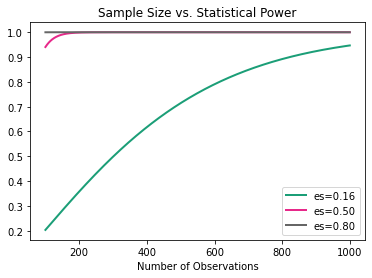

In [414]:
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(100, 1000),
                          effect_size=np.array([0.16, 0.5, 0.8]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.show()

### grouped = df_diabetes.groupby(df_diabetes.Features)
df_diabetes_Insulin = grouped.get_group("Insulin")
df_diabetes_Insulin

<AxesSubplot:xlabel='Features', ylabel='Count'>

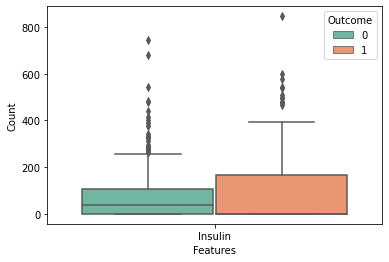

In [151]:
sns.boxplot(x="Features", y="Count", hue="Outcome", data=df_diabetes_Insulin, palette="Set2")

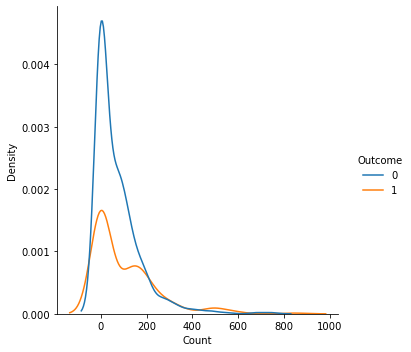

In [152]:
sns.displot(data=df_diabetes_Insulin, x="Count", hue="Outcome", kind="kde")

In [153]:
df_diabetes_Insulin.groupby('Outcome').describe()

Count                                                       
         count        mean         std  min  25%   50%     75%    max
Outcome                                                              
0        500.0   68.792000   98.865289  0.0  0.0  39.0  105.00  744.0
1        268.0  100.335821  138.689125  0.0  0.0   0.0  167.25  846.0

In [154]:
df_a_Insulin = df_diabetes_Insulin[df_diabetes_Insulin.Outcome==1]
df_b_Insulin = df_diabetes_Insulin[df_diabetes_Insulin.Outcome==0]

In [155]:
df_a_Insulin

Outcome Features  Count
3072        1  Insulin    0.0
3074        1  Insulin    0.0
3076        1  Insulin  168.0
3078        1  Insulin   88.0
3080        1  Insulin  543.0
3081        1  Insulin    0.0
3083        1  Insulin    0.0
3085        1  Insulin  846.0
3086        1  Insulin  175.0
3087        1  Insulin    0.0
3088        1  Insulin  230.0
3089        1  Insulin    0.0
3091        1  Insulin   96.0
3094        1  Insulin    0.0
3095        1  Insulin    0.0
3096        1  Insulin  146.0
3097        1  Insulin  115.0
3098        1  Insulin    0.0
3103        1  Insulin  245.0
3109        1  Insulin    0.0
3110        1  Insulin    0.0
3111        1  Insulin  207.0
3115        1  Insulin  240.0
3117        1  Insulin    0.0
3120        1  Insulin    0.0
3125        1  Insulin  300.0
3128        1  Insulin  304.0
3133        1  Insulin    0.0
3136        1  Insulin    0.0
3138        1  Insulin    0.0
3142        1  Insulin   90.0
3144        1  Insulin    0.0
3150        1  Insulin    0.0
3156        1  Insulin    0.0
3160        1  Insulin  110.0
3165        1  Insulin    0.0
3171        1  Insulin  220.0
3172        1  Insulin    0.0
3181        1  Insulin   36.0
3182        1  Insulin  135.0
3183        1  Insulin  495.0
3186        1  Insulin  175.0
3187        1  Insulin    0.0
3188        1  Insulin    0.0
3192        1  Insulin  100.0
3196        1  Insulin    0.0
3197        1  Insulin   99.0
3200        1  Insulin  145.0
3201        1  Insulin    0.0
3202        1  Insulin  168.0
3203        1  Insulin    0.0
3204        1  Insulin  225.0
3215        1  Insulin    0.0
3224        1  Insulin  155.0
3226        1  Insulin    0.0
3227        1  Insulin    0.0
3231        1  Insulin  114.0
3236        1  Insulin    0.0
3237        1  Insulin  156.0
3242        1  Insulin    0.0
3243        1  Insulin  130.0
3247        1  Insulin  130.0
3249        1  Insulin  130.0
3251        1  Insulin    0.0
3257        1  Insulin    0.0
3258        1  Insulin  495.0
3259        1  Insulin   58.0
3260        1  Insulin  114.0
3261        1  Insulin  160.0
3264        1  Insulin    0.0
3265        1  Insulin    0.0
3267        1  Insulin  210.0
3269        1  Insulin   48.0
3270        1  Insulin   99.0
3271        1  Insulin  318.0
3278        1  Insulin  280.0
3279        1  Insulin    0.0
3281        1  Insulin    0.0
3285        1  Insulin  130.0
3286        1  Insulin  175.0
3287        1  Insulin  271.0
3288        1  Insulin  129.0
3290        1  Insulin    0.0
3291        1  Insulin    0.0
3292        1  Insulin  478.0
3293        1  Insulin    0.0
3299        1  Insulin    0.0
3302        1  Insulin    0.0
3303        1  Insulin  370.0
3307        1  Insulin    0.0
3308        1  Insulin  192.0
3309        1  Insulin    0.0
3310        1  Insulin    0.0
3314        1  Insulin    0.0
3315        1  Insulin  176.0
3317        1  Insulin    0.0
3326        1  Insulin  258.0
3327        1  Insulin    0.0
3331        1  Insulin  150.0
3333        1  Insulin    0.0
3336        1  Insulin    0.0
3338        1  Insulin    0.0
3341        1  Insulin    0.0
3342        1  Insulin    0.0
3348        1  Insulin    0.0
3352        1  Insulin    0.0
3355        1  Insulin    0.0
3356        1  Insulin    0.0
3359        1  Insulin  220.0
3363        1  Insulin   74.0
3364        1  Insulin  182.0
3365        1  Insulin  194.0
3368        1  Insulin  360.0
3370        1  Insulin  184.0
3372        1  Insulin    0.0
3373        1  Insulin  135.0
3375        1  Insulin    0.0
3378        1  Insulin  132.0
3380        1  Insulin  180.0
3381        1  Insulin  205.0
3384        1  Insulin   96.0
3386        1  Insulin    0.0
3389        1  Insulin    0.0
3391        1  Insulin    0.0
3393        1  Insulin    0.0
3394        1  Insulin    0.0
3395        1  Insulin   29.0
3398        1  Insulin  156.0
3400        1  Insulin  120.0
3404        1  Insulin    0.0
3409        1  Insulin    0.0
3410        1  Insulin  171.0
3411        1  I

In [156]:
a_Insulin = df_a_Insulin[['Count']]
a_Insulin

Count
3072    0.0
3074    0.0
3076  168.0
3078   88.0
3080  543.0
3081    0.0
3083    0.0
3085  846.0
3086  175.0
3087    0.0
3088  230.0
3089    0.0
3091   96.0
3094    0.0
3095    0.0
3096  146.0
3097  115.0
3098    0.0
3103  245.0
3109    0.0
3110    0.0
3111  207.0
3115  240.0
3117    0.0
3120    0.0
3125  300.0
3128  304.0
3133    0.0
3136    0.0
3138    0.0
3142   90.0
3144    0.0
3150    0.0
3156    0.0
3160  110.0
3165    0.0
3171  220.0
3172    0.0
3181   36.0
3182  135.0
3183  495.0
3186  175.0
3187    0.0
3188    0.0
3192  100.0
3196    0.0
3197   99.0
3200  145.0
3201    0.0
3202  168.0
3203    0.0
3204  225.0
3215    0.0
3224  155.0
3226    0.0
3227    0.0
3231  114.0
3236    0.0
3237  156.0
3242    0.0
3243  130.0
3247  130.0
3249  130.0
3251    0.0
3257    0.0
3258  495.0
3259   58.0
3260  114.0
3261  160.0
3264    0.0
3265    0.0
3267  210.0
3269   48.0
3270   99.0
3271  318.0
3278  280.0
3279    0.0
3281    0.0
3285  130.0
3286  175.0
3287  271.0
3288  129.0
3290    0.0
3291    0.0
3292  478.0
3293    0.0
3299    0.0
3302    0.0
3303  370.0
3307    0.0
3308  192.0
3309    0.0
3310    0.0
3314    0.0
3315  176.0
3317    0.0
3326  258.0
3327    0.0
3331  150.0
3333    0.0
3336    0.0
3338    0.0
3341    0.0
3342    0.0
3348    0.0
3352    0.0
3355    0.0
3356    0.0
3359  220.0
3363   74.0
3364  182.0
3365  194.0
3368  360.0
3370  184.0
3372    0.0
3373  135.0
3375    0.0
3378  132.0
3380  180.0
3381  205.0
3384   96.0
3386    0.0
3389    0.0
3391    0.0
3393    0.0
3394    0.0
3395   29.0
3398  156.0
3400  120.0
3404    0.0
3409    0.0
3410  171.0
3411    0.0
3421    0.0
3427    0.0
3428  167.0
3429    0.0
3431  249.0
3432  325.0
3435    0.0
3438    0.0
3441  140.0
3442  465.0
3447  325.0
3450    0.0
3458    0.0
3459    0.0
3460  285.0
3463    0.0
3466    0.0
3469    0.0
3471    0.0
3472    0.0
3474   88.0
3476    0.0
3478    0.0
3480    0.0
3481  579.0
3486  167.0
3487  474.0
3489    0.0
3491  115.0
3496  210.0
3497  277.0
3499  180.0
3501  180.0
3507    0.0
3512    0.0
3515    0.0
3516    0.0
3517   14.0
3520   64.0
3523    0.0
3527    0.0
3530  237.0
3540    0.0
3548  191.0
3552  328.0
3556    0.0
3557  250.0
3565  122.0
3570  145.0
3574    0.0
3578   90.0
3582    0.0
3587  105.0
3588  165.0
3595    0.0
3607    0.0
3611  155.0
3612  215.0
3613  190.0
3614    0.0
3617  225.0
3618  207.0
3632    0.0
3633  274.0
3641  165.0
3649    0.0
3651    0.0
3652    0.0
3656  600.0
3658    0.0
3660  156.0
3662    0.0
3664    0.0
3667  185.0
3670    0.0
3675  126.0
3676    0.0
3678  293.0
3683  194.0
3684  321.0
3686  144.0
3690    0.0
3691    0.0
3702    0.0
3707    0.0
3710   91.0
3714    0.0
3718  144.0
3719  159.0
3720  130.0
3727  540.0
3731   70.0
3733    0.0
3734  231.0
3735  130.0
3736    0.0
3738    0.0
3739    0.0
3747    0.0
3748    0.0
3750    0.0
3753    0.0
3755    0.0
3761  180.0
3763    0.0
3765  125.0
3767  480.0
3768  125.0
3773    0.0
3774    0.0
3778    0.0
3780    0.0
3781  160.0
3784    0.0
3787  392.0
3788  185.0
3791    0.0
3794  127.0
3802   79.0
3803    0.0
3804  120.0
3811    0.0
3812  150.0
3815    0.0
3818    0.0
3820  200.0
3821    0.0
3822    0.0
3825  510.0
3826    0.0
3827  110.0
3829    0.0
3831    0.0
3833    0.0
3838    0.0

In [157]:
df_b_Insulin

Outcome Features  Count
3073        0  Insulin    0.0
3075        0  Insulin   94.0
3077        0  Insulin    0.0
3079        0  Insulin    0.0
3082        0  Insulin    0.0
3084        0  Insulin    0.0
3090        0  Insulin   83.0
3092        0  Insulin  235.0
3093        0  Insulin    0.0
3099        0  Insulin  140.0
3100        0  Insulin  110.0
3101        0  Insulin    0.0
3102        0  Insulin    0.0
3104        0  Insulin   54.0
3105        0  Insulin    0.0
3106        0  Insulin    0.0
3107        0  Insulin  192.0
3108        0  Insulin    0.0
3112        0  Insulin   70.0
3113        0  Insulin    0.0
3114        0  Insulin    0.0
3116        0  Insulin    0.0
3118        0  Insulin    0.0
3119        0  Insulin    0.0
3121        0  Insulin    0.0
3122        0  Insulin   82.0
3123        0  Insulin   36.0
3124        0  Insulin   23.0
3126        0  Insulin  342.0
3127        0  Insulin    0.0
3129        0  Insulin  110.0
3130        0  Insulin    0.0
3131        0  Insulin  142.0
3132        0  Insulin    0.0
3134        0  Insulin    0.0
3135        0  Insulin  128.0
3137        0  Insulin    0.0
3139        0  Insulin    0.0
3140        0  Insulin   38.0
3141        0  Insulin  100.0
3143        0  Insulin  140.0
3145        0  Insulin  270.0
3146        0  Insulin    0.0
3147        0  Insulin    0.0
3148        0  Insulin    0.0
3149        0  Insulin    0.0
3151        0  Insulin    0.0
3152        0  Insulin    0.0
3153        0  Insulin    0.0
3154        0  Insulin   71.0
3155        0  Insulin    0.0
3157        0  Insulin  125.0
3158        0  Insulin    0.0
3159        0  Insulin   71.0
3161        0  Insulin    0.0
3162        0  Insulin    0.0
3163        0  Insulin  176.0
3164        0  Insulin   48.0
3166        0  Insulin   64.0
3167        0  Insulin  228.0
3168        0  Insulin    0.0
3169        0  Insulin   76.0
3170        0  Insulin   64.0
3173        0  Insulin    0.0
3174        0  Insulin    0.0
3175        0  Insulin   40.0
3176        0  Insulin    0.0
3177        0  Insulin  152.0
3178        0  Insulin    0.0
3179        0  Insulin  140.0
3180        0  Insulin   18.0
3184        0  Insulin   37.0
3185        0  Insulin    0.0
3189        0  Insulin    0.0
3190        0  Insulin    0.0
3191        0  Insulin   51.0
3193        0  Insulin    0.0
3194        0  Insulin  100.0
3195        0  Insulin    0.0
3198        0  Insulin  135.0
3199        0  Insulin   94.0
3205        0  Insulin    0.0
3206        0  Insulin   49.0
3207        0  Insulin  140.0
3208        0  Insulin   50.0
3209        0  Insulin   92.0
3210        0  Insulin    0.0
3211        0  Insulin  325.0
3212        0  Insulin    0.0
3213        0  Insulin    0.0
3214        0  Insulin   63.0
3216        0  Insulin  284.0
3217        0  Insulin    0.0
3218        0  Insulin    0.0
3219        0  Insulin  119.0
3220        0  Insulin    0.0
3221        0  Insulin    0.0
3222        0  Insulin  204.0
3223        0  Insulin    0.0
3225        0  Insulin  485.0
3228        0  Insulin   94.0
3229        0  Insulin  135.0
3230        0  Insulin   53.0
3232        0  Insulin    0.0
3233        0  Insulin  105.0
3234        0  Insulin  285.0
3235        0  Insulin    0.0
3238        0  Insulin    0.0
3239        0  Insulin    0.0
3240        0  Insulin    0.0
3241        0  Insulin   78.0
3244        0  Insulin    0.0
3245        0  Insulin   48.0
3246        0  Insulin   55.0
3248        0  Insulin    0.0
3250        0  Insulin    0.0
3252        0  Insulin    0.0
3253        0  Insulin   92.0
3254        0  Insulin   23.0
3255        0  Insulin    0.0
3256        0  Insulin    0.0
3262        0  Insulin    0.0
3263        0  Insulin   94.0
3266        0  Insulin    0.0
3268        0  Insulin    0.0
3272        0  Insulin    0.0
3273        0  Insulin    0.0
3274        0  Insulin    0.0
3275        0  Insulin   44.0
3276        0  Insulin  190.0
3277        0  Insulin    0.0
3280        0  Insulin   87.0
3282        0  I

In [158]:
b_Insulin = df_b_Insulin[['Count']]
b_Insulin

Count
3073    0.0
3075   94.0
3077    0.0
3079    0.0
3082    0.0
3084    0.0
3090   83.0
3092  235.0
3093    0.0
3099  140.0
3100  110.0
3101    0.0
3102    0.0
3104   54.0
3105    0.0
3106    0.0
3107  192.0
3108    0.0
3112   70.0
3113    0.0
3114    0.0
3116    0.0
3118    0.0
3119    0.0
3121    0.0
3122   82.0
3123   36.0
3124   23.0
3126  342.0
3127    0.0
3129  110.0
3130    0.0
3131  142.0
3132    0.0
3134    0.0
3135  128.0
3137    0.0
3139    0.0
3140   38.0
3141  100.0
3143  140.0
3145  270.0
3146    0.0
3147    0.0
3148    0.0
3149    0.0
3151    0.0
3152    0.0
3153    0.0
3154   71.0
3155    0.0
3157  125.0
3158    0.0
3159   71.0
3161    0.0
3162    0.0
3163  176.0
3164   48.0
3166   64.0
3167  228.0
3168    0.0
3169   76.0
3170   64.0
3173    0.0
3174    0.0
3175   40.0
3176    0.0
3177  152.0
3178    0.0
3179  140.0
3180   18.0
3184   37.0
3185    0.0
3189    0.0
3190    0.0
3191   51.0
3193    0.0
3194  100.0
3195    0.0
3198  135.0
3199   94.0
3205    0.0
3206   49.0
3207  140.0
3208   50.0
3209   92.0
3210    0.0
3211  325.0
3212    0.0
3213    0.0
3214   63.0
3216  284.0
3217    0.0
3218    0.0
3219  119.0
3220    0.0
3221    0.0
3222  204.0
3223    0.0
3225  485.0
3228   94.0
3229  135.0
3230   53.0
3232    0.0
3233  105.0
3234  285.0
3235    0.0
3238    0.0
3239    0.0
3240    0.0
3241   78.0
3244    0.0
3245   48.0
3246   55.0
3248    0.0
3250    0.0
3252    0.0
3253   92.0
3254   23.0
3255    0.0
3256    0.0
3262    0.0
3263   94.0
3266    0.0
3268    0.0
3272    0.0
3273    0.0
3274    0.0
3275   44.0
3276  190.0
3277    0.0
3280   87.0
3282    0.0
3283    0.0
3284    0.0
3289  120.0
3294    0.0
3295  190.0
3296   56.0
3297   32.0
3298    0.0
3300  744.0
3301   53.0
3304   37.0
3305    0.0
3306   45.0
3311    0.0
3312    0.0
3313   88.0
3316  194.0
3318    0.0
3319  680.0
3320  402.0
3321    0.0
3322    0.0
3323    0.0
3324   55.0
3325    0.0
3328    0.0
3329    0.0
3330  375.0
3332  130.0
3334    0.0
3335    0.0
3337   67.0
3339    0.0
3340    0.0
3343   56.0
3344    0.0
3345   45.0
3346    0.0
3347   57.0
3349  116.0
3350    0.0
3351  278.0
3353  122.0
3354  155.0
3357  135.0
3358  545.0
3360   49.0
3361   75.0
3362   40.0
3366    0.0
3367  120.0
3369  215.0
3371    0.0
3374   42.0
3376    0.0
3377  105.0
3379  148.0
3382    0.0
3383  148.0
3385   85.0
3387   94.0
3388   64.0
3390  140.0
3392  231.0
3396    0.0
3397  168.0
3399    0.0
3401   68.0
3402    0.0
3403   52.0
3405    0.0
3406   58.0
3407  255.0
3408    0.0
3412  105.0
3413   73.0
3414    0.0
3415    0.0
3416    0.0
3417  108.0
3418   83.0
3419    0.0
3420   74.0
3422    0.0
3423    0.0
3424    0.0
3425   43.0
3426    0.0
3430   54.0
3433    0.0
3434    0.0
3436  293.0
3437   83.0
3439    0.0
3440   66.0
3443   89.0
3444   66.0
3445   94.0
3446  158.0
3448   84.0
3449   75.0
3451   72.0
3452   82.0
3453    0.0
3454  182.0
3455   59.0
3456  110.0
3457   50.0
3461   81.0
3462  196.0
3464  415.0
3465   87.0
3467  275.0
3468  115.0
3470    0.0
3473    0.0
3475    0.0
3477  165.0
3479    0.0
3482    0.0
3483  176.0
3484  310.0
3485   61.0
3488    0.0
3490    0.0
3492  170.0
3493   76.0
3494   78.0
3495    0.0
3498    0.0
3500  145.0
3502    0.0
3503   85.0
3504   60.0
3505    0.0
3506    0.0
3508    0.0
3509    0.0
3510    0.0
3511    0.0
3513   50.0
3514  120.0
3518   70.0
3519   92.0
3521   63.0
3522   95.0
3524  210.0
3525    0.0
3526  105.0
3528    0.0
3529   71.0
3531   60.0
3532   56.0
3533    0.0
3534   49.0
3535    0.0
3536    0.0
3537  105.0
3538   36.0
3539  100.0
3541  140.0
3542    0.0
3543    0.0
3544    0.0
3545    0.0
3546    0.0
3547    0.0
3549  110.0
3550   75.0
3551    0.0
3553    0.0
3554   49.0
3555  125.0
3558  480.0
3559  265.0
3560    0.0
3561    0.0
3562   66.0
3563    0.0
3564    0.0
3566    0.0
3567    0.0
3568    0.0
3569   76.0
3571  193.0
3572   71.0
3573    0.0
3575   79.0
3576    0.0
3577    0.0
3579  170.0
3580   76.0
3581    0.0
3583  210.0
3584    0.0
3585    0.0
3586   86.0
3589    0.0
3590    0.0
3591  326.

In [213]:
tStat, pValue = stats.ttest_ind(a_Insulin, b_Insulin, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[0.00104693] T-Statistic:[3.30089477]


In [235]:
def Cohen_d(a_Insulin, b_Insulin):
    diff = a_Insulin.mean() - b_Insulin.mean()
    n1,n2 = len(a_Insulin),len(b_Insulin)
    var1 = a_Insulin.var()
    var2 = b_Insulin.var()
    pooled_var = (n1*var1+n2*var2) / (n1+n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [236]:
Cohen_d(a_Insulin,b_Insulin)

Count    0.275857
dtype: float64

In [394]:
mean_a_Insulin = a_Insulin.mean()
mean_b_Insulin = b_Insulin.mean()
diff_mean = mean_a_Insulin - mean_b_Insulin
diff_mean

Count    31.543821
dtype: float64

In [285]:
alpha = 0.05                                                 
n1, n2 = len(a_Insulin), len(b_Insulin)                                  
s1, s2 = np.var(a_Insulin, ddof=1), np.var(b_Insulin, ddof=1)             
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
df = n1 + n2 - 2                                            
t = stats.t.ppf(1 - alpha/2, df)                        

lower = (np.mean(a_Insulin) - np.mean(b_Insulin)) - t * np.sqrt(1 / len(a_Insulin) + 1 / len(b_Insulin)) * s
upper = (np.mean(a_Insulin) - np.mean(b_Insulin)) + t * np.sqrt(1 / len(a_Insulin) + 1 / len(b_Insulin)) * s
(lower, upper)

(Count    14.55231
 dtype: float64,
 Count    48.535332
 dtype: float64)

In [297]:
effect_size = 0.275857
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 207.25


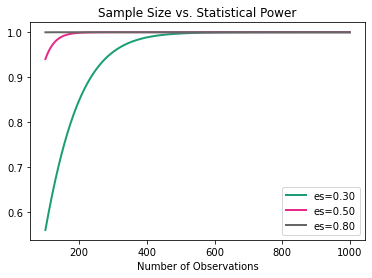

In [419]:
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(100, 1000),
                          effect_size=np.array([0.3, 0.5, 0.8]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.show()

In [160]:
grouped = df_diabetes.groupby(df_diabetes.Features)
df_diabetes_BMI = grouped.get_group("BMI")
df_diabetes_BMI

Outcome Features  Count
3840        1      BMI   33.6
3841        0      BMI   26.6
3842        1      BMI   23.3
3843        0      BMI   28.1
3844        1      BMI   43.1
3845        0      BMI   25.6
3846        1      BMI   31.0
3847        0      BMI   35.3
3848        1      BMI   30.5
3849        1      BMI    0.0
3850        0      BMI   37.6
3851        1      BMI   38.0
3852        0      BMI   27.1
3853        1      BMI   30.1
3854        1      BMI   25.8
3855        1      BMI   30.0
3856        1      BMI   45.8
3857        1      BMI   29.6
3858        0      BMI   43.3
3859        1      BMI   34.6
3860        0      BMI   39.3
3861        0      BMI   35.4
3862        1      BMI   39.8
3863        1      BMI   29.0
3864        1      BMI   36.6
3865        1      BMI   31.1
3866        1      BMI   39.4
3867        0      BMI   23.2
3868        0      BMI   22.2
3869        0      BMI   34.1
3870        0      BMI   36.0
3871        1      BMI   31.6
3872        0      BMI   24.8
3873        0      BMI   19.9
3874        0      BMI   27.6
3875        0      BMI   24.0
3876        0      BMI   33.2
3877        1      BMI   32.9
3878        1      BMI   38.2
3879        1      BMI   37.1
3880        0      BMI   34.0
3881        0      BMI   40.2
3882        0      BMI   22.7
3883        1      BMI   45.4
3884        0      BMI   27.4
3885        1      BMI   42.0
3886        0      BMI   29.7
3887        0      BMI   28.0
3888        1      BMI   39.1
3889        0      BMI    0.0
3890        0      BMI   19.4
3891        0      BMI   24.2
3892        0      BMI   24.4
3893        1      BMI   33.7
3894        0      BMI   34.7
3895        0      BMI   23.0
3896        1      BMI   37.7
3897        0      BMI   46.8
3898        0      BMI   40.5
3899        0      BMI   41.5
3900        0      BMI    0.0
3901        1      BMI   32.9
3902        0      BMI   25.0
3903        0      BMI   25.4
3904        1      BMI   32.8
3905        0      BMI   29.0
3906        1      BMI   32.5
3907        0      BMI   42.7
3908        0      BMI   19.6
3909        0      BMI   28.9
3910        1      BMI   32.9
3911        0      BMI   28.6
3912        1      BMI   43.4
3913        0      BMI   35.1
3914        0      BMI   32.0
3915        0      BMI   24.7
3916        0      BMI   32.6
3917        0      BMI   37.7
3918        1      BMI   43.2
3919        0      BMI   25.0
3920        0      BMI   22.4
3921        0      BMI    0.0
3922        0      BMI   29.3
3923        0      BMI   24.6
3924        1      BMI   48.8
3925        0      BMI   32.4
3926        0      BMI   36.6
3927        0      BMI   38.5
3928        1      BMI   37.1
3929        0      BMI   26.5
3930        0      BMI   19.1
3931        0      BMI   32.0
3932        0      BMI   46.7
3933        1      BMI   23.8
3934        0      BMI   24.7
3935        0      BMI   33.9
3936        0      BMI   31.6
3937        0      BMI   20.4
3938        0      BMI   28.7
3939        1      BMI   49.7
3940        1      BMI   39.0
3941        0      BMI   26.1
3942        0      BMI   22.5
3943        0      BMI   26.6
3944        0      BMI   39.6
3945        0      BMI   28.7
3946        0      BMI   22.4
3947        0      BMI   29.5
3948        0      BMI   34.3
3949        1      BMI   37.4
3950        1      BMI   33.3
3951        1      BMI   34.0
3952        0      BMI   31.2
3953        0      BMI   34.0
3954        1      BMI   30.5
3955        1      BMI   31.2
3956        1      BMI   34.0
3957        0      BMI   33.7
3958        0      BMI   28.2
3959        0      BMI   23.2
3960        1      BMI   53.2
3961        0      BMI   34.2
3962        0      BMI   33.6
3963        0      BMI   26.8
3964        1      BMI   33.3
3965        1      BMI   55.0
3966        0      BMI   42.9
3967        0      BMI   33.3
3968        1      BMI   34.5
3969        1      BMI   27.9
3970        1      BMI   29.7
3971        1      BMI   33.3
3972        1   

<AxesSubplot:xlabel='Features', ylabel='Count'>

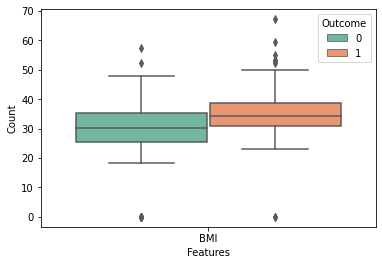

In [161]:
sns.boxplot(x="Features", y="Count", hue="Outcome", data=df_diabetes_BMI, palette="Set2")

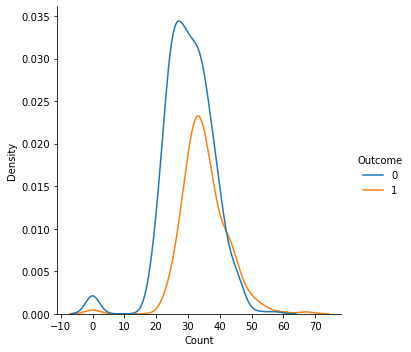

In [162]:
sns.displot(data=df_diabetes_BMI, x="Count", hue="Outcome", kind="kde")

In [163]:
df_diabetes_BMI.groupby('Outcome').describe()

Count                                                     
         count       mean       std  min   25%    50%     75%   max
Outcome                                                            
0        500.0  30.304200  7.689855  0.0  25.4  30.05  35.300  57.3
1        268.0  35.142537  7.262967  0.0  30.8  34.25  38.775  67.1

In [164]:
df_a_BMI = df_diabetes_BMI[df_diabetes_BMI.Outcome==1]
df_b_BMI = df_diabetes_BMI[df_diabetes_BMI.Outcome==0]

In [165]:
df_a_BMI 

Outcome Features  Count
3840        1      BMI   33.6
3842        1      BMI   23.3
3844        1      BMI   43.1
3846        1      BMI   31.0
3848        1      BMI   30.5
3849        1      BMI    0.0
3851        1      BMI   38.0
3853        1      BMI   30.1
3854        1      BMI   25.8
3855        1      BMI   30.0
3856        1      BMI   45.8
3857        1      BMI   29.6
3859        1      BMI   34.6
3862        1      BMI   39.8
3863        1      BMI   29.0
3864        1      BMI   36.6
3865        1      BMI   31.1
3866        1      BMI   39.4
3871        1      BMI   31.6
3877        1      BMI   32.9
3878        1      BMI   38.2
3879        1      BMI   37.1
3883        1      BMI   45.4
3885        1      BMI   42.0
3888        1      BMI   39.1
3893        1      BMI   33.7
3896        1      BMI   37.7
3901        1      BMI   32.9
3904        1      BMI   32.8
3906        1      BMI   32.5
3910        1      BMI   32.9
3912        1      BMI   43.4
3918        1      BMI   43.2
3924        1      BMI   48.8
3928        1      BMI   37.1
3933        1      BMI   23.8
3939        1      BMI   49.7
3940        1      BMI   39.0
3949        1      BMI   37.4
3950        1      BMI   33.3
3951        1      BMI   34.0
3954        1      BMI   30.5
3955        1      BMI   31.2
3956        1      BMI   34.0
3960        1      BMI   53.2
3964        1      BMI   33.3
3965        1      BMI   55.0
3968        1      BMI   34.5
3969        1      BMI   27.9
3970        1      BMI   29.7
3971        1      BMI   33.3
3972        1      BMI   34.5
3983        1      BMI   32.4
3992        1      BMI   34.3
3994        1      BMI   47.9
3995        1      BMI   50.0
3999        1      BMI   40.9
4004        1      BMI   31.6
4005        1      BMI   29.9
4010        1      BMI   30.8
4011        1      BMI   35.4
4015        1      BMI   32.7
4017        1      BMI   67.1
4019        1      BMI   39.1
4025        1      BMI   35.9
4026        1      BMI   30.1
4027        1      BMI   32.0
4028        1      BMI   27.9
4029        1      BMI   31.6
4032        1      BMI   30.4
4033        1      BMI   52.3
4035        1      BMI   39.4
4037        1      BMI   22.9
4038        1      BMI   34.8
4039        1      BMI   30.9
4046        1      BMI   37.5
4047        1      BMI   37.7
4049        1      BMI   35.5
4053        1      BMI   42.6
4054        1      BMI   34.2
4055        1      BMI   41.8
4056        1      BMI   35.8
4058        1      BMI   29.0
4059        1      BMI   37.8
4060        1      BMI   34.6
4061        1      BMI   31.6
4067        1      BMI   37.2
4070        1      BMI   44.0
4071        1      BMI   46.2
4075        1      BMI   43.6
4076        1      BMI   35.9
4077        1      BMI   44.1
4078        1      BMI   30.8
4082        1      BMI   25.6
4083        1      BMI   27.1
4085        1      BMI   30.0
4094        1      BMI   27.6
4095        1      BMI   33.6
4099        1      BMI   33.3
4101        1      BMI   30.0
4104        1      BMI   32.0
4106        1      BMI   36.3
4109        1      BMI   27.5
4110        1      BMI   45.6
4116        1      BMI   26.5
4120        1      BMI   37.9
4123        1      BMI   30.4
4124        1      BMI   27.0
4127        1      BMI   45.6
4131        1      BMI   36.6
4132        1      BMI   43.3
4133        1      BMI   40.5
4136        1      BMI   28.0
4138        1      BMI   36.6
4140        1      BMI   32.3
4141        1      BMI   31.6
4143        1      BMI   52.9
4146        1      BMI   25.5
4148        1      BMI   30.5
4149        1      BMI   32.9
4152        1      BMI   26.6
4154        1      BMI   35.9
4157        1      BMI   30.5
4159        1      BMI   23.5
4161        1      BMI   31.6
4162        1      BMI   27.4
4163        1      BMI   26.8
4166        1      BMI   35.1
4168        1      BMI   45.5
4172        1      BMI   43.3
4177        1      BMI   31.2
4178        1      BMI   34.2
4179        1   

In [166]:
a_BMI = df_a_BMI [['Count']]
a_BMI 

Count
3840   33.6
3842   23.3
3844   43.1
3846   31.0
3848   30.5
3849    0.0
3851   38.0
3853   30.1
3854   25.8
3855   30.0
3856   45.8
3857   29.6
3859   34.6
3862   39.8
3863   29.0
3864   36.6
3865   31.1
3866   39.4
3871   31.6
3877   32.9
3878   38.2
3879   37.1
3883   45.4
3885   42.0
3888   39.1
3893   33.7
3896   37.7
3901   32.9
3904   32.8
3906   32.5
3910   32.9
3912   43.4
3918   43.2
3924   48.8
3928   37.1
3933   23.8
3939   49.7
3940   39.0
3949   37.4
3950   33.3
3951   34.0
3954   30.5
3955   31.2
3956   34.0
3960   53.2
3964   33.3
3965   55.0
3968   34.5
3969   27.9
3970   29.7
3971   33.3
3972   34.5
3983   32.4
3992   34.3
3994   47.9
3995   50.0
3999   40.9
4004   31.6
4005   29.9
4010   30.8
4011   35.4
4015   32.7
4017   67.1
4019   39.1
4025   35.9
4026   30.1
4027   32.0
4028   27.9
4029   31.6
4032   30.4
4033   52.3
4035   39.4
4037   22.9
4038   34.8
4039   30.9
4046   37.5
4047   37.7
4049   35.5
4053   42.6
4054   34.2
4055   41.8
4056   35.8
4058   29.0
4059   37.8
4060   34.6
4061   31.6
4067   37.2
4070   44.0
4071   46.2
4075   43.6
4076   35.9
4077   44.1
4078   30.8
4082   25.6
4083   27.1
4085   30.0
4094   27.6
4095   33.6
4099   33.3
4101   30.0
4104   32.0
4106   36.3
4109   27.5
4110   45.6
4116   26.5
4120   37.9
4123   30.4
4124   27.0
4127   45.6
4131   36.6
4132   43.3
4133   40.5
4136   28.0
4138   36.6
4140   32.3
4141   31.6
4143   52.9
4146   25.5
4148   30.5
4149   32.9
4152   26.6
4154   35.9
4157   30.5
4159   23.5
4161   31.6
4162   27.4
4163   26.8
4166   35.1
4168   45.5
4172   43.3
4177   31.2
4178   34.2
4179   39.9
4189   41.0
4195   30.4
4196   33.3
4197   39.9
4199   36.5
4200   31.2
4203   38.5
4206   27.6
4209   32.8
4210   38.4
4215   39.2
4218   48.3
4226   32.3
4227   43.3
4228   32.0
4231   45.7
4234   32.9
4237   34.3
4239   34.9
4240   32.0
4242   35.0
4244   32.9
4246   28.9
4248   25.9
4249   42.4
4254   34.6
4255   35.7
4257   38.5
4259   26.4
4264   42.9
4265   37.0
4267   34.1
4269   35.0
4275   42.4
4280   34.3
4283   30.5
4284   29.7
4285   59.4
4288   33.6
4291   28.9
4295   33.6
4298   37.6
4308   30.0
4316   33.7
4320   35.5
4324   44.2
4325   42.3
4333   28.9
4338   25.1
4342   39.0
4346   36.5
4350   29.7
4355   31.6
4356   30.3
4363   34.2
4375   32.9
4379   36.4
4380   39.4
4381   32.4
4382   34.9
4385   34.5
4386   43.6
4400   33.8
4401   41.3
4409   34.3
4417   42.9
4419   34.7
4420   42.1
4424   28.7
4426   34.9
4428   33.3
4430   46.8
4432   34.4
4435   32.0
4438   36.8
4443   35.2
4444   28.4
4446   40.0
4451   32.9
4452   38.2
4454   36.1
4458   28.2
4459   32.4
4470   27.4
4475   31.2
4478   40.9
4482   29.5
4486   23.4
4487   37.8
4488   28.3
4495   38.7
4499   34.2
4501   42.9
4502   37.6
4503   37.9
4504   33.7
4506   32.5
4507   27.5
4515   30.9
4516   24.8
4518   36.0
4521   49.6
4523   32.3
4529   46.1
4531   42.3
4533   38.5
4535   30.4
4536   29.9
4541   27.6
4542   35.0
4546    0.0
4548   32.8
4549   38.0
4552   41.2
4555   33.9
4556   33.8
4559   35.6
4562   29.3
4570   28.4
4571   28.4
4572   44.5
4579   39.5
4580   42.3
4583   32.7
4586   49.3
4588   36.4
4589   24.3
4590   31.2
4593   43.3
4594   32.4
4595   36.5
4597   36.3
4599   35.5
4601   44.0
4606   30.1

In [167]:
df_b_BMI

Outcome Features  Count
3841        0      BMI   26.6
3843        0      BMI   28.1
3845        0      BMI   25.6
3847        0      BMI   35.3
3850        0      BMI   37.6
3852        0      BMI   27.1
3858        0      BMI   43.3
3860        0      BMI   39.3
3861        0      BMI   35.4
3867        0      BMI   23.2
3868        0      BMI   22.2
3869        0      BMI   34.1
3870        0      BMI   36.0
3872        0      BMI   24.8
3873        0      BMI   19.9
3874        0      BMI   27.6
3875        0      BMI   24.0
3876        0      BMI   33.2
3880        0      BMI   34.0
3881        0      BMI   40.2
3882        0      BMI   22.7
3884        0      BMI   27.4
3886        0      BMI   29.7
3887        0      BMI   28.0
3889        0      BMI    0.0
3890        0      BMI   19.4
3891        0      BMI   24.2
3892        0      BMI   24.4
3894        0      BMI   34.7
3895        0      BMI   23.0
3897        0      BMI   46.8
3898        0      BMI   40.5
3899        0      BMI   41.5
3900        0      BMI    0.0
3902        0      BMI   25.0
3903        0      BMI   25.4
3905        0      BMI   29.0
3907        0      BMI   42.7
3908        0      BMI   19.6
3909        0      BMI   28.9
3911        0      BMI   28.6
3913        0      BMI   35.1
3914        0      BMI   32.0
3915        0      BMI   24.7
3916        0      BMI   32.6
3917        0      BMI   37.7
3919        0      BMI   25.0
3920        0      BMI   22.4
3921        0      BMI    0.0
3922        0      BMI   29.3
3923        0      BMI   24.6
3925        0      BMI   32.4
3926        0      BMI   36.6
3927        0      BMI   38.5
3929        0      BMI   26.5
3930        0      BMI   19.1
3931        0      BMI   32.0
3932        0      BMI   46.7
3934        0      BMI   24.7
3935        0      BMI   33.9
3936        0      BMI   31.6
3937        0      BMI   20.4
3938        0      BMI   28.7
3941        0      BMI   26.1
3942        0      BMI   22.5
3943        0      BMI   26.6
3944        0      BMI   39.6
3945        0      BMI   28.7
3946        0      BMI   22.4
3947        0      BMI   29.5
3948        0      BMI   34.3
3952        0      BMI   31.2
3953        0      BMI   34.0
3957        0      BMI   33.7
3958        0      BMI   28.2
3959        0      BMI   23.2
3961        0      BMI   34.2
3962        0      BMI   33.6
3963        0      BMI   26.8
3966        0      BMI   42.9
3967        0      BMI   33.3
3973        0      BMI   38.3
3974        0      BMI   21.1
3975        0      BMI   33.8
3976        0      BMI   30.8
3977        0      BMI   28.7
3978        0      BMI   31.2
3979        0      BMI   36.9
3980        0      BMI   21.1
3981        0      BMI   39.5
3982        0      BMI   32.5
3984        0      BMI   32.8
3985        0      BMI    0.0
3986        0      BMI   32.8
3987        0      BMI   30.5
3988        0      BMI   33.7
3989        0      BMI   27.3
3990        0      BMI   37.4
3991        0      BMI   21.9
3993        0      BMI   40.6
3996        0      BMI   24.6
3997        0      BMI   25.2
3998        0      BMI   29.0
4000        0      BMI   29.7
4001        0      BMI   37.2
4002        0      BMI   44.2
4003        0      BMI   29.7
4006        0      BMI   32.5
4007        0      BMI   29.6
4008        0      BMI   31.9
4009        0      BMI   28.4
4012        0      BMI   28.9
4013        0      BMI   43.5
4014        0      BMI   29.7
4016        0      BMI   31.2
4018        0      BMI   45.0
4020        0      BMI   23.2
4021        0      BMI   34.9
4022        0      BMI   27.7
4023        0      BMI   26.8
4024        0      BMI   27.6
4030        0      BMI   22.6
4031        0      BMI   33.1
4034        0      BMI   24.4
4036        0      BMI   24.3
4040        0      BMI   31.0
4041        0      BMI   40.1
4042        0      BMI   27.3
4043        0      BMI   20.4
4044        0      BMI   37.7
4045        0      BMI   23.9
4048        0      BMI   33.2
4050        0   

In [168]:
b_BMI = df_b_BMI [['Count']]
b_BMI

Count
3841   26.6
3843   28.1
3845   25.6
3847   35.3
3850   37.6
3852   27.1
3858   43.3
3860   39.3
3861   35.4
3867   23.2
3868   22.2
3869   34.1
3870   36.0
3872   24.8
3873   19.9
3874   27.6
3875   24.0
3876   33.2
3880   34.0
3881   40.2
3882   22.7
3884   27.4
3886   29.7
3887   28.0
3889    0.0
3890   19.4
3891   24.2
3892   24.4
3894   34.7
3895   23.0
3897   46.8
3898   40.5
3899   41.5
3900    0.0
3902   25.0
3903   25.4
3905   29.0
3907   42.7
3908   19.6
3909   28.9
3911   28.6
3913   35.1
3914   32.0
3915   24.7
3916   32.6
3917   37.7
3919   25.0
3920   22.4
3921    0.0
3922   29.3
3923   24.6
3925   32.4
3926   36.6
3927   38.5
3929   26.5
3930   19.1
3931   32.0
3932   46.7
3934   24.7
3935   33.9
3936   31.6
3937   20.4
3938   28.7
3941   26.1
3942   22.5
3943   26.6
3944   39.6
3945   28.7
3946   22.4
3947   29.5
3948   34.3
3952   31.2
3953   34.0
3957   33.7
3958   28.2
3959   23.2
3961   34.2
3962   33.6
3963   26.8
3966   42.9
3967   33.3
3973   38.3
3974   21.1
3975   33.8
3976   30.8
3977   28.7
3978   31.2
3979   36.9
3980   21.1
3981   39.5
3982   32.5
3984   32.8
3985    0.0
3986   32.8
3987   30.5
3988   33.7
3989   27.3
3990   37.4
3991   21.9
3993   40.6
3996   24.6
3997   25.2
3998   29.0
4000   29.7
4001   37.2
4002   44.2
4003   29.7
4006   32.5
4007   29.6
4008   31.9
4009   28.4
4012   28.9
4013   43.5
4014   29.7
4016   31.2
4018   45.0
4020   23.2
4021   34.9
4022   27.7
4023   26.8
4024   27.6
4030   22.6
4031   33.1
4034   24.4
4036   24.3
4040   31.0
4041   40.1
4042   27.3
4043   20.4
4044   37.7
4045   23.9
4048   33.2
4050   27.7
4051   42.8
4052   34.2
4057   30.0
4062   25.2
4063   28.8
4064   23.6
4065   34.6
4066   35.7
4068   36.7
4069   45.2
4072   25.4
4073   35.0
4074   29.7
4079   18.4
4080   29.2
4081   33.1
4084   38.2
4086   31.2
4087   52.3
4088   35.4
4089   30.1
4090   31.2
4091   28.0
4092   24.4
4093   35.8
4096   30.1
4097   28.7
4098   25.9
4100   30.9
4102   32.1
4103   32.4
4105   33.6
4107   40.0
4108   25.1
4111   25.2
4112   23.0
4113   33.2
4114   34.2
4115   40.5
4117   27.8
4118   24.9
4119   25.3
4121   35.9
4122   32.4
4125   26.0
4126   38.7
4128   20.8
4129   36.1
4130   36.9
4134   21.9
4135   35.5
4137   30.7
4139   23.6
4142   35.8
4144   21.0
4145   39.7
4147   24.8
4150   26.2
4151   39.4
4153   29.5
4155   34.1
4156   19.3
4158   38.1
4160   27.5
4164   35.7
4165   25.6
4167   35.1
4169   30.8
4170   23.1
4171   32.7
4173   23.6
4174   23.9
4175   47.9
4176   33.8
4180   25.9
4181   25.9
4182   32.0
4183   34.7
4184   36.8
4185   38.5
4186   28.7
4187   23.5
4188   21.8
4190   42.2
4191   31.2
4192   34.4
4193   27.2
4194   42.7
4198   35.3
4201   29.8
4202   39.2
4204   34.9
4205   34.0
4207   21.0
4208   27.5
4211    0.0
4212   35.8
4213   34.9
4214   36.2
4216   25.2
4217   37.2
4219   43.4
4220   30.8
4221   20.0
4222   25.4
4223   25.1
4224   24.3
4225   22.3
4229   31.6
4230   32.0
4232   23.7
4233   22.1
4235   27.7
4236   24.7
4238   21.1
4241   24.2
4243   31.6
4245   42.1
4247   21.9
4250   35.7
4251   34.4
4252   42.4
4253   26.2
4256   27.2
4258   18.2
4260   45.3
4261   26.0
4262   40.6
4263   30.8
4266    0.0
4268   40.6
4270   22.2
4271   30.4
4272   30.0
4273   25.6
4274   24.5
4276   37.4
4277   29.9
4278   18.2
4279   36.8
4281   32.2
4282   33.2
4286   25.3
4287   36.5
4289   30.5
4290   21.2
4292   39.9
4293   19.6
4294   37.8
4296   26.7
4297   30.2
4299   25.9
4300   20.8
4301   21.8
4302   35.3
4303   27.6
4304   24.0
4305   21.8
4306   27.8
4307   36.8
4309   46.1
4310   41.3
4311   33.2
4312   38.8
4313   29.9
4314   28.9
4315   27.3
4317   23.8
4318   25.9
4319   28.0
4321   35.2
4322   27.8
4323   38.2
4326   40.7
4327   46.5
4328   25.6
4329   26.1
4330   36.8
4331   33.5
4332   32.8
4334    0.0
4335   26.6
4336   26.0
4337   30.1
4339   29.3
4340   25.2
4341   37.2
4343   33.3
4344   37.3
4345   33.3
4347   28.6
4348   30.4
4349   25.0
4351   22.1
4352   24.2
4353   27.3
4354   25.6
4357   37.6
4358   32.8
4359   19.

In [214]:
tStat, pValue = stats.ttest_ind(a_BMI, b_BMI, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[6.56623762e-17] T-Statistic:[8.61931688]


In [237]:
def Cohen_d(a_BMI, b_BMI):
    diff = a_BMI.mean() - b_BMI.mean()
    n1,n2 = len(a_BMI),len(b_BMI)
    var1 = a_BMI.var()
    var2 = b_BMI.var()
    pooled_var = (n1*var1+n2*var2) / (n1+n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [238]:
Cohen_d(a_BMI,b_BMI)

Count    0.64138
dtype: float64

In [395]:
mean_a_BMI = a_BMI.mean()
mean_b_BMI = b_BMI.mean()
diff_mean = mean_a_BMI - mean_b_BMI
diff_mean

Count    4.838337
dtype: float64

In [286]:
alpha = 0.05                                                 
n1, n2 = len(a_BMI), len(b_BMI)                                  
s1, s2 = np.var(a_BMI, ddof=1), np.var(b_BMI, ddof=1)             
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
df = n1 + n2 - 2                                            
t = stats.t.ppf(1 - alpha/2, df)                        

lower = (np.mean(a_BMI) - np.mean(b_BMI)) - t * np.sqrt(1 / len(a_BMI) + 1 / len(b_BMI)) * s
upper = (np.mean(a_BMI) - np.mean(b_BMI)) + t * np.sqrt(1 / len(a_BMI) + 1 / len(b_BMI)) * s
(lower, upper)

(Count    3.717214
 dtype: float64,
 Count    5.95946
 dtype: float64)

In [298]:
effect_size = 0.64138
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 39.14


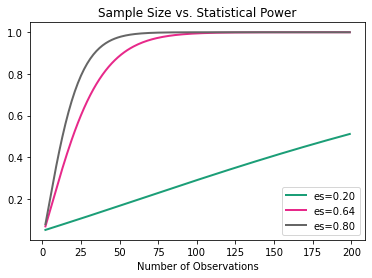

In [420]:
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(2, 200),
                          effect_size=np.array([0.2, 0.64, 0.8]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.show()

In [170]:
grouped = df_diabetes.groupby(df_diabetes.Features)
df_diabetes_DiabetesPedigreeFunction = grouped.get_group("DiabetesPedigreeFunction")
df_diabetes_DiabetesPedigreeFunction

Outcome                  Features  Count
4608        1  DiabetesPedigreeFunction  0.627
4609        0  DiabetesPedigreeFunction  0.351
4610        1  DiabetesPedigreeFunction  0.672
4611        0  DiabetesPedigreeFunction  0.167
4612        1  DiabetesPedigreeFunction  2.288
4613        0  DiabetesPedigreeFunction  0.201
4614        1  DiabetesPedigreeFunction  0.248
4615        0  DiabetesPedigreeFunction  0.134
4616        1  DiabetesPedigreeFunction  0.158
4617        1  DiabetesPedigreeFunction  0.232
4618        0  DiabetesPedigreeFunction  0.191
4619        1  DiabetesPedigreeFunction  0.537
4620        0  DiabetesPedigreeFunction  1.441
4621        1  DiabetesPedigreeFunction  0.398
4622        1  DiabetesPedigreeFunction  0.587
4623        1  DiabetesPedigreeFunction  0.484
4624        1  DiabetesPedigreeFunction  0.551
4625        1  DiabetesPedigreeFunction  0.254
4626        0  DiabetesPedigreeFunction  0.183
4627        1  DiabetesPedigreeFunction  0.529
4628        0  DiabetesPedigreeFunction  0.704
4629        0  DiabetesPedigreeFunction  0.388
4630        1  DiabetesPedigreeFunction  0.451
4631        1  DiabetesPedigreeFunction  0.263
4632        1  DiabetesPedigreeFunction  0.254
4633        1  DiabetesPedigreeFunction  0.205
4634        1  DiabetesPedigreeFunction  0.257
4635        0  DiabetesPedigreeFunction  0.487
4636        0  DiabetesPedigreeFunction  0.245
4637        0  DiabetesPedigreeFunction  0.337
4638        0  DiabetesPedigreeFunction  0.546
4639        1  DiabetesPedigreeFunction  0.851
4640        0  DiabetesPedigreeFunction  0.267
4641        0  DiabetesPedigreeFunction  0.188
4642        0  DiabetesPedigreeFunction  0.512
4643        0  DiabetesPedigreeFunction  0.966
4644        0  DiabetesPedigreeFunction  0.420
4645        1  DiabetesPedigreeFunction  0.665
4646        1  DiabetesPedigreeFunction  0.503
4647        1  DiabetesPedigreeFunction  1.390
4648        0  DiabetesPedigreeFunction  0.271
4649        0  DiabetesPedigreeFunction  0.696
4650        0  DiabetesPedigreeFunction  0.235
4651        1  DiabetesPedigreeFunction  0.721
4652        0  DiabetesPedigreeFunction  0.294
4653        1  DiabetesPedigreeFunction  1.893
4654        0  DiabetesPedigreeFunction  0.564
4655        0  DiabetesPedigreeFunction  0.586
4656        1  DiabetesPedigreeFunction  0.344
4657        0  DiabetesPedigreeFunction  0.305
4658        0  DiabetesPedigreeFunction  0.491
4659        0  DiabetesPedigreeFunction  0.526
4660        0  DiabetesPedigreeFunction  0.342
4661        1  DiabetesPedigreeFunction  0.467
4662        0  DiabetesPedigreeFunction  0.718
4663        0  DiabetesPedigreeFunction  0.248
4664        1  DiabetesPedigreeFunction  0.254
4665        0  DiabetesPedigreeFunction  0.962
4666        0  DiabetesPedigreeFunction  1.781
4667        0  DiabetesPedigreeFunction  0.173
4668        0  DiabetesPedigreeFunction  0.304
4669        1  DiabetesPedigreeFunction  0.270
4670        0  DiabetesPedigreeFunction  0.587
4671        0  DiabetesPedigreeFunction  0.699
4672        1  DiabetesPedigreeFunction  0.258
4673        0  DiabetesPedigreeFunction  0.203
4674        1  DiabetesPedigreeFunction  0.855
4675        0  DiabetesPedigreeFunction  0.845
4676        0  DiabetesPedigreeFunction  0.334
4677        0  DiabetesPedigreeFunction  0.189
4678        1  DiabetesPedigreeFunction  0.867
4679        0  DiabetesPedigreeFunction  0.411
4680        1  DiabetesPedigreeFunction  0.583
4681        0  DiabetesPedigreeFunction  0.231
4682        0  DiabetesPedigreeFunction  0.396
4683        0  DiabetesPedigreeFunction  0.140
4684        0  DiabetesPedigreeFunction  0.391
4685        0  DiabetesPedigreeFunction  0.370
4686        1  DiabetesPedigreeFunction  0.270
4687        0  DiabetesPedigreeFunction  0.307
4688        0  DiabetesPedigreeFunction  0.140
4689        0  DiabetesPedigreeFunction  0.102
4690        0  DiabetesPedigreeFunction  0.767
4691        0  DiabetesPedigreeFunction  0.237
4692       

<AxesSubplot:xlabel='Features', ylabel='Count'>

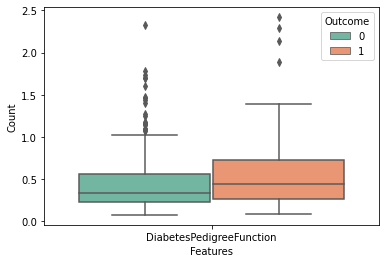

In [171]:
sns.boxplot(x="Features", y="Count", hue="Outcome", data=df_diabetes_DiabetesPedigreeFunction, palette="Set2")

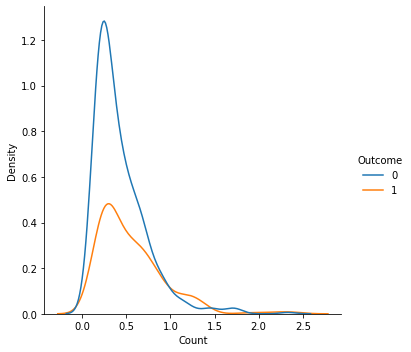

In [172]:
sns.displot(data=df_diabetes_DiabetesPedigreeFunction, x="Count", hue="Outcome", kind="kde")

In [173]:
df_diabetes_DiabetesPedigreeFunction.groupby('Outcome').describe()

Count                                                           
         count      mean       std    min      25%    50%      75%    max
Outcome                                                                  
0        500.0  0.429734  0.299085  0.078  0.22975  0.336  0.56175  2.329
1        268.0  0.550500  0.372354  0.088  0.26250  0.449  0.72800  2.420

In [174]:
df_a_DiabetesPedigreeFunction = df_diabetes_DiabetesPedigreeFunction[df_diabetes_DiabetesPedigreeFunction.Outcome==1]
df_b_DiabetesPedigreeFunction = df_diabetes_DiabetesPedigreeFunction[df_diabetes_DiabetesPedigreeFunction.Outcome==0]

In [175]:
df_a_DiabetesPedigreeFunction

Outcome                  Features  Count
4608        1  DiabetesPedigreeFunction  0.627
4610        1  DiabetesPedigreeFunction  0.672
4612        1  DiabetesPedigreeFunction  2.288
4614        1  DiabetesPedigreeFunction  0.248
4616        1  DiabetesPedigreeFunction  0.158
4617        1  DiabetesPedigreeFunction  0.232
4619        1  DiabetesPedigreeFunction  0.537
4621        1  DiabetesPedigreeFunction  0.398
4622        1  DiabetesPedigreeFunction  0.587
4623        1  DiabetesPedigreeFunction  0.484
4624        1  DiabetesPedigreeFunction  0.551
4625        1  DiabetesPedigreeFunction  0.254
4627        1  DiabetesPedigreeFunction  0.529
4630        1  DiabetesPedigreeFunction  0.451
4631        1  DiabetesPedigreeFunction  0.263
4632        1  DiabetesPedigreeFunction  0.254
4633        1  DiabetesPedigreeFunction  0.205
4634        1  DiabetesPedigreeFunction  0.257
4639        1  DiabetesPedigreeFunction  0.851
4645        1  DiabetesPedigreeFunction  0.665
4646        1  DiabetesPedigreeFunction  0.503
4647        1  DiabetesPedigreeFunction  1.390
4651        1  DiabetesPedigreeFunction  0.721
4653        1  DiabetesPedigreeFunction  1.893
4656        1  DiabetesPedigreeFunction  0.344
4661        1  DiabetesPedigreeFunction  0.467
4664        1  DiabetesPedigreeFunction  0.254
4669        1  DiabetesPedigreeFunction  0.270
4672        1  DiabetesPedigreeFunction  0.258
4674        1  DiabetesPedigreeFunction  0.855
4678        1  DiabetesPedigreeFunction  0.867
4680        1  DiabetesPedigreeFunction  0.583
4686        1  DiabetesPedigreeFunction  0.270
4692        1  DiabetesPedigreeFunction  0.227
4696        1  DiabetesPedigreeFunction  0.153
4701        1  DiabetesPedigreeFunction  0.277
4707        1  DiabetesPedigreeFunction  0.325
4708        1  DiabetesPedigreeFunction  1.222
4717        1  DiabetesPedigreeFunction  0.247
4718        1  DiabetesPedigreeFunction  0.199
4719        1  DiabetesPedigreeFunction  0.543
4722        1  DiabetesPedigreeFunction  0.588
4723        1  DiabetesPedigreeFunction  0.539
4724        1  DiabetesPedigreeFunction  0.220
4728        1  DiabetesPedigreeFunction  0.759
4732        1  DiabetesPedigreeFunction  0.278
4733        1  DiabetesPedigreeFunction  0.496
4736        1  DiabetesPedigreeFunction  0.403
4737        1  DiabetesPedigreeFunction  0.741
4738        1  DiabetesPedigreeFunction  0.361
4739        1  DiabetesPedigreeFunction  1.114
4740        1  DiabetesPedigreeFunction  0.356
4751        1  DiabetesPedigreeFunction  0.272
4760        1  DiabetesPedigreeFunction  1.189
4762        1  DiabetesPedigreeFunction  0.137
4763        1  DiabetesPedigreeFunction  0.337
4767        1  DiabetesPedigreeFunction  0.817
4772        1  DiabetesPedigreeFunction  0.743
4773        1  DiabetesPedigreeFunction  0.722
4778        1  DiabetesPedigreeFunction  0.180
4779        1  DiabetesPedigreeFunction  0.542
4783        1  DiabetesPedigreeFunction  0.719
4785        1  DiabetesPedigreeFunction  0.319
4787        1  DiabetesPedigreeFunction  0.956
4793        1  DiabetesPedigreeFunction  0.745
4794        1  DiabetesPedigreeFunction  0.615
4795        1  DiabetesPedigreeFunction  1.321
4796        1  DiabetesPedigreeFunction  0.640
4797        1  DiabetesPedigreeFunction  0.361
4800        1  DiabetesPedigreeFunction  0.383
4801        1  DiabetesPedigreeFunction  0.578
4803        1  DiabetesPedigreeFunction  0.395
4805        1  DiabetesPedigreeFunction  0.678
4806        1  DiabetesPedigreeFunction  0.905
4807        1  DiabetesPedigreeFunction  0.150
4814        1  DiabetesPedigreeFunction  0.605
4815        1  DiabetesPedigreeFunction  0.151
4817        1  DiabetesPedigreeFunction  0.355
4821        1  DiabetesPedigreeFunction  0.431
4822        1  DiabetesPedigreeFunction  0.260
4823        1  DiabetesPedigreeFunction  0.742
4824        1  DiabetesPedigreeFunction  0.514
4826        1  DiabetesPedigreeFunction  1.224
4827        1  DiabetesPedigreeFunction  0.261
4828       

In [176]:
a_DiabetesPedigreeFunction = df_a_DiabetesPedigreeFunction[['Count']]
a_DiabetesPedigreeFunction

Count
4608  0.627
4610  0.672
4612  2.288
4614  0.248
4616  0.158
4617  0.232
4619  0.537
4621  0.398
4622  0.587
4623  0.484
4624  0.551
4625  0.254
4627  0.529
4630  0.451
4631  0.263
4632  0.254
4633  0.205
4634  0.257
4639  0.851
4645  0.665
4646  0.503
4647  1.390
4651  0.721
4653  1.893
4656  0.344
4661  0.467
4664  0.254
4669  0.270
4672  0.258
4674  0.855
4678  0.867
4680  0.583
4686  0.270
4692  0.227
4696  0.153
4701  0.277
4707  0.325
4708  1.222
4717  0.247
4718  0.199
4719  0.543
4722  0.588
4723  0.539
4724  0.220
4728  0.759
4732  0.278
4733  0.496
4736  0.403
4737  0.741
4738  0.361
4739  1.114
4740  0.356
4751  0.272
4760  1.189
4762  0.137
4763  0.337
4767  0.817
4772  0.743
4773  0.722
4778  0.180
4779  0.542
4783  0.719
4785  0.319
4787  0.956
4793  0.745
4794  0.615
4795  1.321
4796  0.640
4797  0.361
4800  0.383
4801  0.578
4803  0.395
4805  0.678
4806  0.905
4807  0.150
4814  0.605
4815  0.151
4817  0.355
4821  0.431
4822  0.260
4823  0.742
4824  0.514
4826  1.224
4827  0.261
4828  1.072
4829  0.805
4835  0.652
4838  0.645
4839  0.238
4843  0.479
4844  0.586
4845  0.686
4846  0.831
4850  0.402
4851  1.318
4853  1.213
4862  0.926
4863  0.543
4867  1.353
4869  0.761
4872  0.226
4874  0.933
4877  0.240
4878  1.136
4884  0.296
4888  0.334
4891  0.165
4892  0.259
4895  0.808
4899  0.757
4900  1.224
4901  0.613
4904  0.337
4906  0.412
4908  0.839
4909  0.422
4911  0.209
4914  0.326
4916  1.391
4917  0.875
4920  0.433
4922  1.127
4925  0.345
4927  0.129
4929  0.197
4930  0.254
4931  0.731
4934  0.692
4936  0.127
4940  0.282
4945  0.343
4946  0.893
4947  0.331
4957  0.346
4963  0.302
4964  0.962
4965  0.569
4967  0.875
4968  0.583
4971  0.520
4974  0.368
4977  0.234
4978  2.137
4983  0.528
4986  0.238
4994  0.660
4995  0.239
4996  0.452
4999  0.340
5002  0.803
5005  0.196
5007  0.241
5008  0.161
5010  0.286
5012  0.135
5014  0.376
5016  1.191
5017  0.702
5022  0.534
5023  0.258
5025  0.554
5027  0.219
5032  0.516
5033  0.264
5035  0.328
5037  0.233
5043  0.205
5048  0.435
5051  0.955
5052  0.380
5053  2.420
5056  0.510
5059  0.542
5063  0.212
5066  1.001
5076  0.183
5084  0.711
5088  0.344
5092  0.630
5093  0.365
5101  1.144
5106  0.163
5110  0.727
5114  0.314
5118  0.297
5123  0.268
5124  0.771
5131  0.652
5143  0.302
5147  0.968
5148  0.661
5149  0.549
5150  0.825
5153  0.423
5154  1.034
5168  0.121
5169  0.502
5177  0.203
5185  0.693
5187  0.575
5188  0.371
5192  0.687
5194  0.129
5196  1.154
5198  0.925
5200  0.402
5203  0.682
5206  0.088
5211  0.692
5212  0.212
5214  1.258
5219  0.593
5220  0.787
5222  0.557
5226  1.282
5227  0.141
5238  0.732
5243  0.465
5246  0.871
5250  0.178
5254  0.447
5255  0.455
5256  0.260
5263  0.240
5267  1.292
5269  1.394
5270  0.165
5271  0.637
5272  0.245
5274  0.235
5275  0.141
5283  0.328
5284  0.230
5286  0.127
5289  0.364
5291  0.536
5297  0.335
5299  0.257
5301  0.439
5303  0.128
5304  0.268
5309  0.565
5310  0.905
5314  0.261
5316  0.148
5317  0.674
5320  0.441
5323  0.826
5324  0.970
5327  0.378
5330  0.349
5338  0.323
5339  0.259
5340  0.646
5347  0.293
5348  0.785
5351  0.734
5354  0.358
5356  0.408
5357  0.178
5358  1.182
5361  0.222
5362  0.443
5363  1.057
5365  0.258
5367  0.278
5369  0.403
5374  0.349

In [177]:
df_b_DiabetesPedigreeFunction

Outcome                  Features  Count
4609        0  DiabetesPedigreeFunction  0.351
4611        0  DiabetesPedigreeFunction  0.167
4613        0  DiabetesPedigreeFunction  0.201
4615        0  DiabetesPedigreeFunction  0.134
4618        0  DiabetesPedigreeFunction  0.191
4620        0  DiabetesPedigreeFunction  1.441
4626        0  DiabetesPedigreeFunction  0.183
4628        0  DiabetesPedigreeFunction  0.704
4629        0  DiabetesPedigreeFunction  0.388
4635        0  DiabetesPedigreeFunction  0.487
4636        0  DiabetesPedigreeFunction  0.245
4637        0  DiabetesPedigreeFunction  0.337
4638        0  DiabetesPedigreeFunction  0.546
4640        0  DiabetesPedigreeFunction  0.267
4641        0  DiabetesPedigreeFunction  0.188
4642        0  DiabetesPedigreeFunction  0.512
4643        0  DiabetesPedigreeFunction  0.966
4644        0  DiabetesPedigreeFunction  0.420
4648        0  DiabetesPedigreeFunction  0.271
4649        0  DiabetesPedigreeFunction  0.696
4650        0  DiabetesPedigreeFunction  0.235
4652        0  DiabetesPedigreeFunction  0.294
4654        0  DiabetesPedigreeFunction  0.564
4655        0  DiabetesPedigreeFunction  0.586
4657        0  DiabetesPedigreeFunction  0.305
4658        0  DiabetesPedigreeFunction  0.491
4659        0  DiabetesPedigreeFunction  0.526
4660        0  DiabetesPedigreeFunction  0.342
4662        0  DiabetesPedigreeFunction  0.718
4663        0  DiabetesPedigreeFunction  0.248
4665        0  DiabetesPedigreeFunction  0.962
4666        0  DiabetesPedigreeFunction  1.781
4667        0  DiabetesPedigreeFunction  0.173
4668        0  DiabetesPedigreeFunction  0.304
4670        0  DiabetesPedigreeFunction  0.587
4671        0  DiabetesPedigreeFunction  0.699
4673        0  DiabetesPedigreeFunction  0.203
4675        0  DiabetesPedigreeFunction  0.845
4676        0  DiabetesPedigreeFunction  0.334
4677        0  DiabetesPedigreeFunction  0.189
4679        0  DiabetesPedigreeFunction  0.411
4681        0  DiabetesPedigreeFunction  0.231
4682        0  DiabetesPedigreeFunction  0.396
4683        0  DiabetesPedigreeFunction  0.140
4684        0  DiabetesPedigreeFunction  0.391
4685        0  DiabetesPedigreeFunction  0.370
4687        0  DiabetesPedigreeFunction  0.307
4688        0  DiabetesPedigreeFunction  0.140
4689        0  DiabetesPedigreeFunction  0.102
4690        0  DiabetesPedigreeFunction  0.767
4691        0  DiabetesPedigreeFunction  0.237
4693        0  DiabetesPedigreeFunction  0.698
4694        0  DiabetesPedigreeFunction  0.178
4695        0  DiabetesPedigreeFunction  0.324
4697        0  DiabetesPedigreeFunction  0.165
4698        0  DiabetesPedigreeFunction  0.258
4699        0  DiabetesPedigreeFunction  0.443
4700        0  DiabetesPedigreeFunction  0.261
4702        0  DiabetesPedigreeFunction  0.761
4703        0  DiabetesPedigreeFunction  0.255
4704        0  DiabetesPedigreeFunction  0.130
4705        0  DiabetesPedigreeFunction  0.323
4706        0  DiabetesPedigreeFunction  0.356
4709        0  DiabetesPedigreeFunction  0.179
4710        0  DiabetesPedigreeFunction  0.262
4711        0  DiabetesPedigreeFunction  0.283
4712        0  DiabetesPedigreeFunction  0.930
4713        0  DiabetesPedigreeFunction  0.801
4714        0  DiabetesPedigreeFunction  0.207
4715        0  DiabetesPedigreeFunction  0.287
4716        0  DiabetesPedigreeFunction  0.336
4720        0  DiabetesPedigreeFunction  0.192
4721        0  DiabetesPedigreeFunction  0.391
4725        0  DiabetesPedigreeFunction  0.654
4726        0  DiabetesPedigreeFunction  0.443
4727        0  DiabetesPedigreeFunction  0.223
4729        0  DiabetesPedigreeFunction  0.260
4730        0  DiabetesPedigreeFunction  0.404
4731        0  DiabetesPedigreeFunction  0.186
4734        0  DiabetesPedigreeFunction  0.452
4735        0  DiabetesPedigreeFunction  0.261
4741        0  DiabetesPedigreeFunction  0.457
4742        0  DiabetesPedigreeFunction  0.647
4743        0  DiabetesPedigreeFunction  0.088
4744       

In [178]:
b_DiabetesPedigreeFunction = df_b_DiabetesPedigreeFunction[['Count']]
b_DiabetesPedigreeFunction

Count
4609  0.351
4611  0.167
4613  0.201
4615  0.134
4618  0.191
4620  1.441
4626  0.183
4628  0.704
4629  0.388
4635  0.487
4636  0.245
4637  0.337
4638  0.546
4640  0.267
4641  0.188
4642  0.512
4643  0.966
4644  0.420
4648  0.271
4649  0.696
4650  0.235
4652  0.294
4654  0.564
4655  0.586
4657  0.305
4658  0.491
4659  0.526
4660  0.342
4662  0.718
4663  0.248
4665  0.962
4666  1.781
4667  0.173
4668  0.304
4670  0.587
4671  0.699
4673  0.203
4675  0.845
4676  0.334
4677  0.189
4679  0.411
4681  0.231
4682  0.396
4683  0.140
4684  0.391
4685  0.370
4687  0.307
4688  0.140
4689  0.102
4690  0.767
4691  0.237
4693  0.698
4694  0.178
4695  0.324
4697  0.165
4698  0.258
4699  0.443
4700  0.261
4702  0.761
4703  0.255
4704  0.130
4705  0.323
4706  0.356
4709  0.179
4710  0.262
4711  0.283
4712  0.930
4713  0.801
4714  0.207
4715  0.287
4716  0.336
4720  0.192
4721  0.391
4725  0.654
4726  0.443
4727  0.223
4729  0.260
4730  0.404
4731  0.186
4734  0.452
4735  0.261
4741  0.457
4742  0.647
4743  0.088
4744  0.597
4745  0.532
4746  0.703
4747  0.159
4748  0.268
4749  0.286
4750  0.318
4752  0.237
4753  0.572
4754  0.096
4755  1.400
4756  0.218
4757  0.085
4758  0.399
4759  0.432
4761  0.687
4764  0.637
4765  0.833
4766  0.229
4768  0.294
4769  0.204
4770  0.167
4771  0.368
4774  0.256
4775  0.709
4776  0.471
4777  0.495
4780  0.773
4781  0.678
4782  0.370
4784  0.382
4786  0.190
4788  0.084
4789  0.725
4790  0.299
4791  0.268
4792  0.244
4798  0.142
4799  0.374
4802  0.136
4804  0.187
4808  0.874
4809  0.236
4810  0.787
4811  0.235
4812  0.324
4813  0.407
4816  0.289
4818  0.290
4819  0.375
4820  0.164
4825  0.464
4830  0.209
4831  0.687
4832  0.666
4833  0.101
4834  0.198
4836  2.329
4837  0.089
4840  0.583
4841  0.394
4842  0.293
4847  0.582
4848  0.192
4849  0.446
4852  0.329
4854  0.258
4855  0.427
4856  0.282
4857  0.143
4858  0.380
4859  0.284
4860  0.249
4861  0.238
4864  0.557
4865  0.092
4866  0.655
4868  0.299
4870  0.612
4871  0.200
4873  0.997
4875  1.101
4876  0.078
4879  0.128
4880  0.254
4881  0.422
4882  0.251
4883  0.677
4885  0.454
4886  0.744
4887  0.881
4889  0.280
4890  0.262
4893  0.647
4894  0.619
4896  0.340
4897  0.263
4898  0.434
4902  0.254
4903  0.692
4905  0.520
4907  0.840
4910  0.156
4912  0.207
4913  0.215
4915  0.143
4918  0.313
4919  0.605
4921  0.626
4923  0.315
4924  0.284
4926  0.150
4928  0.527
4932  0.148
4933  0.123
4935  0.200
4937  0.122
4938  1.476
4939  0.166
4941  0.137
4942  0.260
4943  0.259
4944  0.932
4948  0.472
4949  0.673
4950  0.389
4951  0.290
4952  0.485
4953  0.349
4954  0.654
4955  0.187
4956  0.279
4958  0.237
4959  0.252
4960  0.243
4961  0.580
4962  0.559
4966  0.378
4969  0.207
4970  0.305
4972  0.385
4973  0.499
4975  0.252
4976  0.306
4979  1.731
4980  0.545
4981  0.225
4982  0.816
4984  0.299
4985  0.509
4987  1.021
4988  0.821
4989  0.236
4990  0.947
4991  1.268
4992  0.221
4993  0.205
4997  0.949
4998  0.444
5000  0.389
5001  0.463
5003  1.600
5004  0.944
5006  0.389
5009  0.151
5011  0.280
5013  0.520
5015  0.336
5018  0.674
5019  0.528
5020  1.076
5021  0.256
5024  1.095
5026  0.624
5028  0.507
5029  0.561
5030  0.496
5031  0.421
5034  0.256
5036  0.284
5038  0.108
5039  0.551
5040  0.527
5041  0.167
5042  1.138
5044  0.244
5045  0.434
5046  0.147
5047  0.727
5049  0.497
5050  0.230
5054  0.658
5055  0.330
5057  0.285
5058  0.415
5060  0.381
5061  0.832
5062  0.498
5064  0.687
5065  0.364
5067  0.460
5068  0.733
5069  0.416
5070  0.705
5071  0.258
5072  1.022
5073  0.452
5074  0.269
5075  0.600
5077  0.571
5078  0.607
5079  0.170
5080  0.259
5081  0.210
5082  0.126
5083  0.231
5085  0.466
5086  0.162
5087  0.419
5089  0.197
5090  0.306
5091  0.233
5094  0.536
5095  1.159
5096  0.294
5097  0.551
5098  0.629
5099  0.292
5100  0.145
5102  0.174
5103  0.304
5104  0.292
5105  0.547
5107  0.839
5108  0.313
5109  0.267
5111  0.738
5112  0.238
5113  0.263
5115  0.692
5116  0.968
5117  0.409
5119  0.207
5120  0.200
5121  0.525
5122  0.154
5125  0.304
5126  0.180
5127  0.58

In [215]:
tStat, pValue = stats.ttest_ind(a_DiabetesPedigreeFunction, b_DiabetesPedigreeFunction, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[6.10048142e-06] T-Statistic:[4.57681201]


In [288]:
def Cohen_d(a_DiabetesPedigreeFunction, b_DiabetesPedigreeFunction):
    diff = a_DiabetesPedigreeFunction.mean() - b_DiabetesPedigreeFunction.mean()
    n1,n2 = len(a_DiabetesPedigreeFunction),len(b_DiabetesPedigreeFunction)
    var1 = a_DiabetesPedigreeFunction.var()
    var2 = b_DiabetesPedigreeFunction.var()
    pooled_var = (n1*var1+n2*var2) / (n1+n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [289]:
Cohen_d(a_DiabetesPedigreeFunction,b_DiabetesPedigreeFunction)

Count    0.369851
dtype: float64

In [396]:
mean_a_DiabetesPedigreeFunction = a_DiabetesPedigreeFunction.mean()
mean_b_DiabetesPedigreeFunction = b_DiabetesPedigreeFunction.mean()
diff_mean = mean_a_DiabetesPedigreeFunction - mean_b_DiabetesPedigreeFunction
diff_mean

Count    0.120766
dtype: float64

In [287]:
alpha = 0.05                                                 
n1, n2 = len(a_DiabetesPedigreeFunction), len(b_DiabetesPedigreeFunction)                                  
s1, s2 = np.var(a_DiabetesPedigreeFunction, ddof=1), np.var(b_DiabetesPedigreeFunction, ddof=1)             
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
df = n1 + n2 - 2                                            
t = stats.t.ppf(1 - alpha/2, df)                        

lower = (np.mean(a_DiabetesPedigreeFunction) - np.mean(b_DiabetesPedigreeFunction)) - t * np.sqrt(1 / len(a_DiabetesPedigreeFunction) + 1 / len(b_DiabetesPedigreeFunction)) * s
upper = (np.mean(a_DiabetesPedigreeFunction) - np.mean(b_DiabetesPedigreeFunction)) + t * np.sqrt(1 / len(a_DiabetesPedigreeFunction) + 1 / len(b_DiabetesPedigreeFunction)) * s
(lower, upper)

(Count    0.072244
 dtype: float64,
 Count    0.169288
 dtype: float64)

In [299]:
effect_size = 0.369851
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 115.73


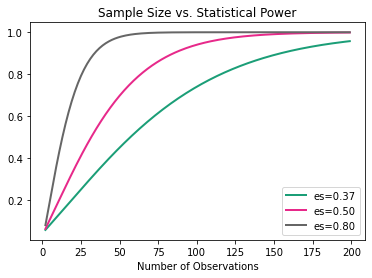

In [421]:
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(2, 200),
                          effect_size=np.array([0.37, 0.5, 0.8]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.show()

In [180]:
grouped = df_diabetes.groupby(df_diabetes.Features)
df_diabetes_Age = grouped.get_group("Age")
df_diabetes_Age

Outcome Features  Count
5376        1      Age   50.0
5377        0      Age   31.0
5378        1      Age   32.0
5379        0      Age   21.0
5380        1      Age   33.0
5381        0      Age   30.0
5382        1      Age   26.0
5383        0      Age   29.0
5384        1      Age   53.0
5385        1      Age   54.0
5386        0      Age   30.0
5387        1      Age   34.0
5388        0      Age   57.0
5389        1      Age   59.0
5390        1      Age   51.0
5391        1      Age   32.0
5392        1      Age   31.0
5393        1      Age   31.0
5394        0      Age   33.0
5395        1      Age   32.0
5396        0      Age   27.0
5397        0      Age   50.0
5398        1      Age   41.0
5399        1      Age   29.0
5400        1      Age   51.0
5401        1      Age   41.0
5402        1      Age   43.0
5403        0      Age   22.0
5404        0      Age   57.0
5405        0      Age   38.0
5406        0      Age   60.0
5407        1      Age   28.0
5408        0      Age   22.0
5409        0      Age   28.0
5410        0      Age   45.0
5411        0      Age   33.0
5412        0      Age   35.0
5413        1      Age   46.0
5414        1      Age   27.0
5415        1      Age   56.0
5416        0      Age   26.0
5417        0      Age   37.0
5418        0      Age   48.0
5419        1      Age   54.0
5420        0      Age   40.0
5421        1      Age   25.0
5422        0      Age   29.0
5423        0      Age   22.0
5424        1      Age   31.0
5425        0      Age   24.0
5426        0      Age   22.0
5427        0      Age   26.0
5428        0      Age   30.0
5429        1      Age   58.0
5430        0      Age   42.0
5431        0      Age   21.0
5432        1      Age   41.0
5433        0      Age   31.0
5434        0      Age   44.0
5435        0      Age   22.0
5436        0      Age   21.0
5437        1      Age   39.0
5438        0      Age   36.0
5439        0      Age   24.0
5440        1      Age   42.0
5441        0      Age   32.0
5442        1      Age   38.0
5443        0      Age   54.0
5444        0      Age   25.0
5445        0      Age   27.0
5446        1      Age   28.0
5447        0      Age   26.0
5448        1      Age   42.0
5449        0      Age   23.0
5450        0      Age   22.0
5451        0      Age   22.0
5452        0      Age   41.0
5453        0      Age   27.0
5454        1      Age   26.0
5455        0      Age   24.0
5456        0      Age   22.0
5457        0      Age   22.0
5458        0      Age   36.0
5459        0      Age   22.0
5460        1      Age   37.0
5461        0      Age   27.0
5462        0      Age   45.0
5463        0      Age   26.0
5464        1      Age   43.0
5465        0      Age   24.0
5466        0      Age   21.0
5467        0      Age   34.0
5468        0      Age   42.0
5469        1      Age   60.0
5470        0      Age   21.0
5471        0      Age   40.0
5472        0      Age   24.0
5473        0      Age   22.0
5474        0      Age   23.0
5475        1      Age   31.0
5476        1      Age   33.0
5477        0      Age   22.0
5478        0      Age   21.0
5479        0      Age   24.0
5480        0      Age   27.0
5481        0      Age   21.0
5482        0      Age   27.0
5483        0      Age   37.0
5484        0      Age   25.0
5485        1      Age   24.0
5486        1      Age   24.0
5487        1      Age   46.0
5488        0      Age   23.0
5489        0      Age   25.0
5490        1      Age   39.0
5491        1      Age   61.0
5492        1      Age   38.0
5493        0      Age   25.0
5494        0      Age   22.0
5495        0      Age   21.0
5496        1      Age   25.0
5497        0      Age   24.0
5498        0      Age   23.0
5499        0      Age   69.0
5500        1      Age   23.0
5501        1      Age   26.0
5502        0      Age   30.0
5503        0      Age   23.0
5504        1      Age   40.0
5505        1      Age   62.0
5506        1      Age   33.0
5507        1      Age   33.0
5508        1   

<AxesSubplot:xlabel='Features', ylabel='Count'>

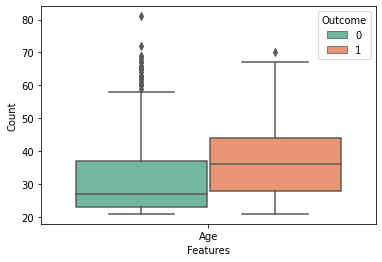

In [181]:
sns.boxplot(x="Features", y="Count", hue="Outcome", data=df_diabetes_Age, palette="Set2")

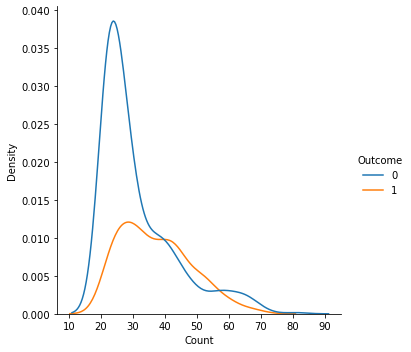

In [182]:
sns.displot(data=df_diabetes_Age, x="Count", hue="Outcome", kind="kde")

In [183]:
df_diabetes_Age.groupby('Outcome').describe()

Count                                                    
         count       mean        std   min   25%   50%   75%   max
Outcome                                                           
0        500.0  31.190000  11.667655  21.0  23.0  27.0  37.0  81.0
1        268.0  37.067164  10.968254  21.0  28.0  36.0  44.0  70.0

In [184]:
df_a_Age = df_diabetes_Age[df_diabetes_Age.Outcome==1]
df_b_Age = df_diabetes_Age[df_diabetes_Age.Outcome==0]

In [185]:
df_a_Age

Outcome Features  Count
5376        1      Age   50.0
5378        1      Age   32.0
5380        1      Age   33.0
5382        1      Age   26.0
5384        1      Age   53.0
5385        1      Age   54.0
5387        1      Age   34.0
5389        1      Age   59.0
5390        1      Age   51.0
5391        1      Age   32.0
5392        1      Age   31.0
5393        1      Age   31.0
5395        1      Age   32.0
5398        1      Age   41.0
5399        1      Age   29.0
5400        1      Age   51.0
5401        1      Age   41.0
5402        1      Age   43.0
5407        1      Age   28.0
5413        1      Age   46.0
5414        1      Age   27.0
5415        1      Age   56.0
5419        1      Age   54.0
5421        1      Age   25.0
5424        1      Age   31.0
5429        1      Age   58.0
5432        1      Age   41.0
5437        1      Age   39.0
5440        1      Age   42.0
5442        1      Age   38.0
5446        1      Age   28.0
5448        1      Age   42.0
5454        1      Age   26.0
5460        1      Age   37.0
5464        1      Age   43.0
5469        1      Age   60.0
5475        1      Age   31.0
5476        1      Age   33.0
5485        1      Age   24.0
5486        1      Age   24.0
5487        1      Age   46.0
5490        1      Age   39.0
5491        1      Age   61.0
5492        1      Age   38.0
5496        1      Age   25.0
5500        1      Age   23.0
5501        1      Age   26.0
5504        1      Age   40.0
5505        1      Age   62.0
5506        1      Age   33.0
5507        1      Age   33.0
5508        1      Age   30.0
5519        1      Age   42.0
5528        1      Age   42.0
5530        1      Age   43.0
5531        1      Age   36.0
5535        1      Age   47.0
5540        1      Age   32.0
5541        1      Age   41.0
5546        1      Age   36.0
5547        1      Age   29.0
5551        1      Age   36.0
5553        1      Age   26.0
5555        1      Age   37.0
5561        1      Age   41.0
5562        1      Age   60.0
5563        1      Age   33.0
5564        1      Age   31.0
5565        1      Age   25.0
5568        1      Age   36.0
5569        1      Age   40.0
5571        1      Age   29.0
5573        1      Age   23.0
5574        1      Age   26.0
5575        1      Age   29.0
5582        1      Age   57.0
5583        1      Age   52.0
5585        1      Age   41.0
5589        1      Age   24.0
5590        1      Age   36.0
5591        1      Age   38.0
5592        1      Age   25.0
5594        1      Age   32.0
5595        1      Age   41.0
5596        1      Age   21.0
5597        1      Age   66.0
5603        1      Age   24.0
5606        1      Age   22.0
5607        1      Age   46.0
5611        1      Age   26.0
5612        1      Age   51.0
5613        1      Age   23.0
5614        1      Age   32.0
5618        1      Age   22.0
5619        1      Age   33.0
5621        1      Age   49.0
5630        1      Age   44.0
5631        1      Age   21.0
5635        1      Age   51.0
5637        1      Age   27.0
5640        1      Age   35.0
5642        1      Age   25.0
5645        1      Age   28.0
5646        1      Age   38.0
5652        1      Age   29.0
5656        1      Age   28.0
5659        1      Age   47.0
5660        1      Age   52.0
5663        1      Age   29.0
5667        1      Age   25.0
5668        1      Age   31.0
5669        1      Age   24.0
5672        1      Age   29.0
5674        1      Age   46.0
5676        1      Age   30.0
5677        1      Age   25.0
5679        1      Age   28.0
5682        1      Age   47.0
5684        1      Age   25.0
5685        1      Age   30.0
5688        1      Age   27.0
5690        1      Age   43.0
5693        1      Age   29.0
5695        1      Age   59.0
5697        1      Age   25.0
5698        1      Age   36.0
5699        1      Age   43.0
5702        1      Age   30.0
5704        1      Age   23.0
5708        1      Age   41.0
5713        1      Age   44.0
5714        1      Age   33.0
5715        1   

In [186]:
a_Age = df_a_Age[['Count']]
a_Age

Count
5376   50.0
5378   32.0
5380   33.0
5382   26.0
5384   53.0
5385   54.0
5387   34.0
5389   59.0
5390   51.0
5391   32.0
5392   31.0
5393   31.0
5395   32.0
5398   41.0
5399   29.0
5400   51.0
5401   41.0
5402   43.0
5407   28.0
5413   46.0
5414   27.0
5415   56.0
5419   54.0
5421   25.0
5424   31.0
5429   58.0
5432   41.0
5437   39.0
5440   42.0
5442   38.0
5446   28.0
5448   42.0
5454   26.0
5460   37.0
5464   43.0
5469   60.0
5475   31.0
5476   33.0
5485   24.0
5486   24.0
5487   46.0
5490   39.0
5491   61.0
5492   38.0
5496   25.0
5500   23.0
5501   26.0
5504   40.0
5505   62.0
5506   33.0
5507   33.0
5508   30.0
5519   42.0
5528   42.0
5530   43.0
5531   36.0
5535   47.0
5540   32.0
5541   41.0
5546   36.0
5547   29.0
5551   36.0
5553   26.0
5555   37.0
5561   41.0
5562   60.0
5563   33.0
5564   31.0
5565   25.0
5568   36.0
5569   40.0
5571   29.0
5573   23.0
5574   26.0
5575   29.0
5582   57.0
5583   52.0
5585   41.0
5589   24.0
5590   36.0
5591   38.0
5592   25.0
5594   32.0
5595   41.0
5596   21.0
5597   66.0
5603   24.0
5606   22.0
5607   46.0
5611   26.0
5612   51.0
5613   23.0
5614   32.0
5618   22.0
5619   33.0
5621   49.0
5630   44.0
5631   21.0
5635   51.0
5637   27.0
5640   35.0
5642   25.0
5645   28.0
5646   38.0
5652   29.0
5656   28.0
5659   47.0
5660   52.0
5663   29.0
5667   25.0
5668   31.0
5669   24.0
5672   29.0
5674   46.0
5676   30.0
5677   25.0
5679   28.0
5682   47.0
5684   25.0
5685   30.0
5688   27.0
5690   43.0
5693   29.0
5695   59.0
5697   25.0
5698   36.0
5699   43.0
5702   30.0
5704   23.0
5708   41.0
5713   44.0
5714   33.0
5715   41.0
5725   37.0
5731   49.0
5732   28.0
5733   44.0
5735   29.0
5736   29.0
5739   67.0
5742   29.0
5745   45.0
5746   25.0
5751   58.0
5754   32.0
5762   35.0
5763   45.0
5764   58.0
5767   27.0
5770   31.0
5773   22.0
5775   25.0
5776   31.0
5778   35.0
5780   41.0
5782   46.0
5784   39.0
5785   28.0
5790   21.0
5791   22.0
5793   37.0
5795   28.0
5800   36.0
5801   31.0
5803   38.0
5805   43.0
5811   29.0
5816   41.0
5819   33.0
5820   30.0
5821   25.0
5824   22.0
5827   23.0
5831   38.0
5834   51.0
5844   38.0
5852   29.0
5856   35.0
5860   31.0
5861   24.0
5869   45.0
5874   55.0
5878   41.0
5882   35.0
5886   46.0
5891   28.0
5892   53.0
5899   45.0
5911   23.0
5915   32.0
5916   43.0
5917   27.0
5918   56.0
5921   37.0
5922   53.0
5936   54.0
5937   28.0
5945   33.0
5953   21.0
5955   62.0
5956   21.0
5960   52.0
5962   41.0
5964   52.0
5966   45.0
5968   44.0
5971   22.0
5974   38.0
5979   54.0
5980   36.0
5982   22.0
5987   36.0
5988   40.0
5990   50.0
5994   50.0
5995   24.0
6006   34.0
6011   38.0
6014   32.0
6018   50.0
6022   33.0
6023   22.0
6024   42.0
6031   25.0
6035   27.0
6037   22.0
6038   43.0
6039   40.0
6040   40.0
6042   70.0
6043   40.0
6051   31.0
6052   53.0
6054   25.0
6057   26.0
6059   27.0
6065   46.0
6067   44.0
6069   43.0
6071   43.0
6072   31.0
6077   49.0
6078   52.0
6082   30.0
6084   45.0
6085   23.0
6088   38.0
6091   34.0
6092   31.0
6095   52.0
6098   42.0
6106   34.0
6107   22.0
6108   24.0
6115   42.0
6116   48.0
6119   45.0
6122   27.0
6124   36.0
6125   50.0
6126   22.0
6129   26.0
6130   45.0
6131   37.0
6133   52.0
6135   66.0
6137   43.0
6142   47.0

In [187]:
df_b_Age

Outcome Features  Count
5377        0      Age   31.0
5379        0      Age   21.0
5381        0      Age   30.0
5383        0      Age   29.0
5386        0      Age   30.0
5388        0      Age   57.0
5394        0      Age   33.0
5396        0      Age   27.0
5397        0      Age   50.0
5403        0      Age   22.0
5404        0      Age   57.0
5405        0      Age   38.0
5406        0      Age   60.0
5408        0      Age   22.0
5409        0      Age   28.0
5410        0      Age   45.0
5411        0      Age   33.0
5412        0      Age   35.0
5416        0      Age   26.0
5417        0      Age   37.0
5418        0      Age   48.0
5420        0      Age   40.0
5422        0      Age   29.0
5423        0      Age   22.0
5425        0      Age   24.0
5426        0      Age   22.0
5427        0      Age   26.0
5428        0      Age   30.0
5430        0      Age   42.0
5431        0      Age   21.0
5433        0      Age   31.0
5434        0      Age   44.0
5435        0      Age   22.0
5436        0      Age   21.0
5438        0      Age   36.0
5439        0      Age   24.0
5441        0      Age   32.0
5443        0      Age   54.0
5444        0      Age   25.0
5445        0      Age   27.0
5447        0      Age   26.0
5449        0      Age   23.0
5450        0      Age   22.0
5451        0      Age   22.0
5452        0      Age   41.0
5453        0      Age   27.0
5455        0      Age   24.0
5456        0      Age   22.0
5457        0      Age   22.0
5458        0      Age   36.0
5459        0      Age   22.0
5461        0      Age   27.0
5462        0      Age   45.0
5463        0      Age   26.0
5465        0      Age   24.0
5466        0      Age   21.0
5467        0      Age   34.0
5468        0      Age   42.0
5470        0      Age   21.0
5471        0      Age   40.0
5472        0      Age   24.0
5473        0      Age   22.0
5474        0      Age   23.0
5477        0      Age   22.0
5478        0      Age   21.0
5479        0      Age   24.0
5480        0      Age   27.0
5481        0      Age   21.0
5482        0      Age   27.0
5483        0      Age   37.0
5484        0      Age   25.0
5488        0      Age   23.0
5489        0      Age   25.0
5493        0      Age   25.0
5494        0      Age   22.0
5495        0      Age   21.0
5497        0      Age   24.0
5498        0      Age   23.0
5499        0      Age   69.0
5502        0      Age   30.0
5503        0      Age   23.0
5509        0      Age   39.0
5510        0      Age   26.0
5511        0      Age   31.0
5512        0      Age   21.0
5513        0      Age   22.0
5514        0      Age   29.0
5515        0      Age   28.0
5516        0      Age   55.0
5517        0      Age   38.0
5518        0      Age   22.0
5520        0      Age   23.0
5521        0      Age   21.0
5522        0      Age   41.0
5523        0      Age   34.0
5524        0      Age   65.0
5525        0      Age   22.0
5526        0      Age   24.0
5527        0      Age   37.0
5529        0      Age   23.0
5532        0      Age   21.0
5533        0      Age   23.0
5534        0      Age   22.0
5536        0      Age   36.0
5537        0      Age   45.0
5538        0      Age   27.0
5539        0      Age   21.0
5542        0      Age   22.0
5543        0      Age   34.0
5544        0      Age   29.0
5545        0      Age   29.0
5548        0      Age   25.0
5549        0      Age   23.0
5550        0      Age   33.0
5552        0      Age   42.0
5554        0      Age   47.0
5556        0      Age   32.0
5557        0      Age   23.0
5558        0      Age   21.0
5559        0      Age   27.0
5560        0      Age   40.0
5566        0      Age   21.0
5567        0      Age   40.0
5570        0      Age   42.0
5572        0      Age   21.0
5576        0      Age   21.0
5577        0      Age   28.0
5578        0      Age   32.0
5579        0      Age   27.0
5580        0      Age   55.0
5581        0      Age   27.0
5584        0      Age   21.0
5586        0   

In [188]:
b_Age = df_b_Age[['Count']]
b_Age

Count
5377   31.0
5379   21.0
5381   30.0
5383   29.0
5386   30.0
5388   57.0
5394   33.0
5396   27.0
5397   50.0
5403   22.0
5404   57.0
5405   38.0
5406   60.0
5408   22.0
5409   28.0
5410   45.0
5411   33.0
5412   35.0
5416   26.0
5417   37.0
5418   48.0
5420   40.0
5422   29.0
5423   22.0
5425   24.0
5426   22.0
5427   26.0
5428   30.0
5430   42.0
5431   21.0
5433   31.0
5434   44.0
5435   22.0
5436   21.0
5438   36.0
5439   24.0
5441   32.0
5443   54.0
5444   25.0
5445   27.0
5447   26.0
5449   23.0
5450   22.0
5451   22.0
5452   41.0
5453   27.0
5455   24.0
5456   22.0
5457   22.0
5458   36.0
5459   22.0
5461   27.0
5462   45.0
5463   26.0
5465   24.0
5466   21.0
5467   34.0
5468   42.0
5470   21.0
5471   40.0
5472   24.0
5473   22.0
5474   23.0
5477   22.0
5478   21.0
5479   24.0
5480   27.0
5481   21.0
5482   27.0
5483   37.0
5484   25.0
5488   23.0
5489   25.0
5493   25.0
5494   22.0
5495   21.0
5497   24.0
5498   23.0
5499   69.0
5502   30.0
5503   23.0
5509   39.0
5510   26.0
5511   31.0
5512   21.0
5513   22.0
5514   29.0
5515   28.0
5516   55.0
5517   38.0
5518   22.0
5520   23.0
5521   21.0
5522   41.0
5523   34.0
5524   65.0
5525   22.0
5526   24.0
5527   37.0
5529   23.0
5532   21.0
5533   23.0
5534   22.0
5536   36.0
5537   45.0
5538   27.0
5539   21.0
5542   22.0
5543   34.0
5544   29.0
5545   29.0
5548   25.0
5549   23.0
5550   33.0
5552   42.0
5554   47.0
5556   32.0
5557   23.0
5558   21.0
5559   27.0
5560   40.0
5566   21.0
5567   40.0
5570   42.0
5572   21.0
5576   21.0
5577   28.0
5578   32.0
5579   27.0
5580   55.0
5581   27.0
5584   21.0
5586   25.0
5587   24.0
5588   60.0
5593   32.0
5598   37.0
5599   61.0
5600   26.0
5601   22.0
5602   26.0
5604   31.0
5605   24.0
5608   22.0
5609   29.0
5610   23.0
5615   27.0
5616   21.0
5617   22.0
5620   29.0
5622   41.0
5623   23.0
5624   34.0
5625   23.0
5626   42.0
5627   27.0
5628   24.0
5629   25.0
5632   30.0
5633   25.0
5634   24.0
5636   34.0
5638   24.0
5639   63.0
5641   43.0
5643   24.0
5644   21.0
5647   21.0
5648   40.0
5649   21.0
5650   52.0
5651   25.0
5653   23.0
5654   57.0
5655   22.0
5657   39.0
5658   37.0
5661   51.0
5662   34.0
5664   26.0
5665   33.0
5666   21.0
5670   65.0
5671   28.0
5673   24.0
5675   58.0
5678   35.0
5680   37.0
5681   29.0
5683   21.0
5686   41.0
5687   22.0
5689   25.0
5691   26.0
5692   30.0
5694   28.0
5696   31.0
5700   21.0
5701   24.0
5703   37.0
5705   37.0
5706   46.0
5707   25.0
5709   44.0
5710   22.0
5711   26.0
5712   44.0
5716   22.0
5717   36.0
5718   22.0
5719   33.0
5720   57.0
5721   49.0
5722   22.0
5723   23.0
5724   26.0
5726   29.0
5727   30.0
5728   46.0
5729   24.0
5730   21.0
5734   48.0
5737   63.0
5738   65.0
5740   30.0
5741   30.0
5743   21.0
5744   22.0
5747   21.0
5748   21.0
5749   25.0
5750   28.0
5752   22.0
5753   22.0
5755   35.0
5756   24.0
5757   22.0
5758   21.0
5759   25.0
5760   25.0
5761   24.0
5765   28.0
5766   42.0
5768   21.0
5769   37.0
5771   25.0
5772   39.0
5774   25.0
5777   55.0
5779   38.0
5781   26.0
5783   25.0
5786   28.0
5787   25.0
5788   22.0
5789   21.0
5792   22.0
5794   27.0
5796   26.0
5797   21.0
5798   21.0
5799   21.0
5802   25.0
5804   26.0
5806   23.0
5807   38.0
5808   22.0
5809   29.0
5810   36.0
5812   41.0
5813   28.0
5814   21.0
5815   31.0
5817   22.0
5818   24.0
5822   28.0
5823   26.0
5825   26.0
5826   23.0
5828   25.0
5829   72.0
5830   24.0
5832   62.0
5833   24.0
5835   81.0
5836   48.0
5837   26.0
5838   39.0
5839   37.0
5840   34.0
5841   21.0
5842   22.0
5843   25.0
5845   27.0
5846   28.0
5847   22.0
5848   22.0
5849   50.0
5850   24.0
5851   59.0
5853   31.0
5854   39.0
5855   63.0
5857   29.0
5858   28.0
5859   23.0
5862   21.0
5863   58.0
5864   28.0
5865   67.0
5866   24.0
5867   42.0
5868   33.0
5870   22.0
5871   66.0
5872   30.0
5873   25.0
5875   39.0
5876   21.0
5877   28.0
5879   41.0
5880   40.0
5881   38.0
5883   21.0
5884   21.0
5885   64.0
5887   21.0
5888   58.0
5889   22.0
5890   24.0
5893   51.0
5894   41.0
5895   60.

In [216]:
tStat, pValue = stats.ttest_ind(a_Age, b_Age, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[1.20151253e-11] T-Statistic:[6.92073838]


In [239]:
def Cohen_d(a_Age, b_Age):
    diff = a_Age.mean() - b_Age.mean()
    n1,n2 = len(a_Age),len(b_Age)
    var1 = a_Age.var()
    var2 = b_Age.var()
    pooled_var = (n1*var1+n2*var2) / (n1+n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [240]:
Cohen_d(a_Age,b_Age)

Count    0.514257
dtype: float64

In [397]:
mean_a_Age = a_Age.mean()
mean_b_Age = b_Age.mean()
diff_mean = mean_a_Age - mean_b_Age
diff_mean

Count    5.877164
dtype: float64

In [292]:
alpha = 0.05                                                 
n1, n2 = len(a_Age), len(b_Age)                                  
s1, s2 = np.var(a_Age, ddof=1), np.var(b_Age, ddof=1)             
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
df = n1 + n2 - 2                                            
t = stats.t.ppf(1 - alpha/2, df)                        

lower = (np.mean(a_Age) - np.mean(b_Age)) - t * np.sqrt(1 / len(a_Age) + 1 / len(b_Age)) * s
upper = (np.mean(a_Age) - np.mean(b_Age)) + t * np.sqrt(1 / len(a_Age) + 1 / len(b_Age)) * s(lower, upper)

(Count    4.178682
 dtype: float64,
 Count    7.575646
 dtype: float64)

In [300]:
effect_size = 0.514257
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 60.33


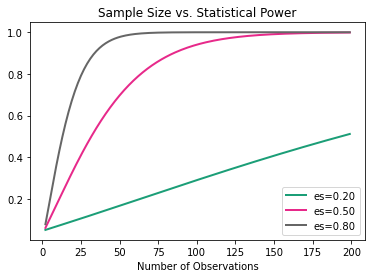

In [326]:
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(2, 200),
                          effect_size=np.array([0.2, 0.5, 0.8]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.show()

In [424]:
#Multiple Linear Regression
x= diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes['Outcome']

In [425]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [426]:
x_test.shape

(154, 8)

In [427]:
x_train.shape

(614, 8)

In [428]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [429]:
print(regressor.intercept_)

-0.8582420095420096


In [430]:
print(regressor.coef_)

[ 0.01565323  0.00585266 -0.00248661  0.00073844 -0.00022976  0.01364543
  0.14239101  0.0035676 ]


In [431]:
coeff_df = pd.DataFrame(regressor.coef_,x.columns, columns=['Coefficient'])
coeff_df

Coefficient
Pregnancies                  0.015653
Glucose                      0.005853
BloodPressure               -0.002487
SkinThickness                0.000738
Insulin                     -0.000230
BMI                          0.013645
DiabetesPedigreeFunction     0.142391
Age                          0.003568

In [432]:
y_pred = regressor.predict(x_test)

In [433]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

Actual  Predicted
661       1   1.027230
122       0   0.212534
113       0   0.103813
14        1   0.603935
529       0   0.170025
103       0  -0.054570
338       1   0.675663
588       1   0.793259
395       0   0.421661
204       0   0.396226
31        1   0.547011
546       1   1.029122
278       0   0.352281
593       0   0.233509
737       0   0.157282
202       0   0.218270
175       1   0.813737
55        0  -0.108213
479       0   0.452458
365       0   0.308792
417       1   0.603117
577       1   0.423735
172       0   0.292841
352       0   0.030618
27        0   0.004319
605       0   0.394189
239       0  -0.008275
744       0   0.877349
79        0   0.151164
496       0   0.198115
285       0   0.480320
422       0   0.295183
640       0   0.108407
374       0   0.463284
385       0   0.136818
404       1   0.658557
648       1   0.470033
500       0   0.095101
575       0   0.378171
40        0   0.680721
181       0   0.332749
354       0   0.258678
563       0   0.219511
399       1   0.766841
8         1   0.688211
145       0  -0.274415
271       0   0.098756
419       1   0.270876
198       1   0.389395
683       1   0.350419
578       0   0.439350
142       0   0.247816
215       1   0.818160
756       0   0.491091
452       0   0.168534
75        0  -0.511713
1         0   0.035729
303       1   0.500888
451       1   0.336842
706       1   0.115538
662       1   0.651660
364       0   0.469918
626       0   0.145545
266       1   0.666794
317       1   0.638663
408       1   0.898089
355       1   0.662140
272       0   0.201503
250       0   0.403400
403       0   0.135168
624       0   0.163705
222       0   0.453422
253       0   0.111213
622       0   0.998281
235       1   0.782043
351       0   0.365958
672       0   0.131088
499       0   0.590677
720       0   0.056571
556       0   0.238554
583       0   0.368239
150       0   0.412190
85        0   0.263368
526       0  -0.072993
735       0   0.258187
350       0   0.256931
242       1   0.353012
18        0   0.429263
236       1   0.828439
623       0   0.229266
602       0   0.226326
251       0   0.238019
313       0   0.294459
50        0  -0.036289
548       0   0.604209
572       0   0.249177
638       1   0.429062
608       0   0.494820
39        1   0.566081
406       1   0.310392
162       0   0.292890
156       0   0.113953
10        0   0.266688
68        0  -0.045635
267       0   0.582288
443       1   0.394908
736       0   0.179847
471       0   0.353292
316       0  -0.026556
2         1   0.706666
760       0   0.134487
214       1   0.349784
586       1   0.580663
187       1   0.422297
415       1   0.510180
283       1   0.585753
279       0   0.143656
258       0   0.620603
249       0   0.120383
740       1   0.670415
725       0   0.402254
362       0   0.391841
318       0   0.335432
582       0   0.476041
413       0   0.281444
694       0  -0.012339
698       0   0.357157
386       1   0.395930
456       0   0.496590
728       0   0.415845
71        0   0.409619
49        0  -0.005089
210       0   0.022641
409       1   0.676548
503       0   0.348396
37        1   0.425682
687       0   0.188744
48        1   0.406783
261       1   0.627990
653       0   0.267917
331       0   0.096922
568       0   0.526340
196       0   0.060848
76        0   0.067028
64        1   0.388564
671       0   0.099956
52        0   0.069839
310       0   0.110277
416       0   0.177098
476       1   0.242562
482       0   0.085418
230       1   0.592328
527       0   0.130302
380       0   0.230727

In [199]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.31997344037467745
MSE: 0.14425468210191067
RMSE: 0.37980874410933546


In [423]:
@np.vectorize
def power_grid(x,y):
    power = TTestIndPower().solve_power(effect_size = x, 
                                        nobs1 = y, 
                                        alpha = 0.05)
    return power

X,Y = np.meshgrid(np.linspace(0.01, 1, 51), 
                  np.linspace(10, 1000, 100))
X = X.T
Y = Y.T

Z = power_grid(X, Y) # power

data = [Surface(x = X, y= Y, z = Z)]

layout = Layout(
    title='Power Analysis',
    scene = dict(xaxis = dict(title='effect size'),
                 yaxis = dict(title='number of observations'),
                 zaxis = dict(title='power'),)
)

fig = Figure(data=data, layout=layout)
iplot(fig)
